<img src='images/logo-CESI.png' width="400" height="400">

# <font color='#8B0000'> ADEME PROJECT </font> 

### Group 3 :
Ray-Hann Massoudi ; Dylan Tain ; Charlie Do ; Valentin Malhas

# Choosing our modeling

Our group decided to choose an adjacency matrix over adjacency list. In our situation, we thought that using an adjacency list would be causing more issues than adjacency matrix because it won't be able to handle dense graph and weight on each vertex.
Furthermore, adjacency matrix are easier and faster to build even if the computation of the powers of the adjacency matrix has a non negligible memory cost.

# Generating an adjacency matrix

The adjacency matrix will correspond to our starting situation (the number of cities, the different roads and their travel time).

Our matrix must respect several rules so that our situation is the closest to reality:

1) The generation of our matrix must be random because we must be able to face all the kind of situations that we can meet.

2) We consider that our graph can be undirected for this our matrix must be symmetrical.

3) The diagonal of our matrix must be null because we cannot make a path on the same vertex.

# Choosing our meta-heuristic

### Genetic algorithm

Genetic algorithms belong to the family of evolutionary algorithms.

The existence of an exact deterministic algorithm with polynomial complexity remains unknown. In a TSP problem the complexity shows that it is O(V!) with V the number of cities. If we suppose that V is 1 microsecond
 
<img src='images/gen1.png'>

To solve the TSP we find deterministic and approximation algorithms. 
Deterministic algorithms allow to find the optimal solution, but their complexity is exponential. These algorithms require a lot of memory space and are very time consuming. If the problem becomes large, these algorithms become unusable.
Therefore, approximation algorithms allow to find in a reasonable time an approximate solution of the optimal solution. They are generally used to solve concrete problems of large size.
As an approximation algorithm we have chosen the ant algorithm.


### Ant colony algorithm

The problem of the travelling salesman is to find the shortest route connecting n given cities, each city to be visited only once. The problem is more generally defined as a fully connected graph (N, A), where the cities are the nodes N and the paths between these cities, the edges A.
In the AS algorithm, at each iteration t (1 ≤ t ≤ tmax), each ant k (k = 1, . . . , m) visit the graph and builds a complete path of n = |N| 'steps.

Biologists found that ants were able to find the shortest path between the food source and their nest without using sight by exploiting pheromone information.

They gathered the following information:

-	Ants initially randomly search for food
-	Ants deposit pheromones on their path
-	They follow the path marked by this substance
-	The most marked path is preferred
-	Pheromones evaporate with time
-	If an obstacle is placed on the path of pheromones, the ants go around it by a random side

As soon as an ant finds the shortest path, more pheromones will be deposited on the shortest path. This is because the ants having chosen this path will have deposited their pheromone first.
For each ant, the path between a city i and a city j depends on:

1)	 The list of cities already visited, which defines the possible movements at each step, when the ant k is on the city <img src='images/ant1.png'>

2)	The inverse of the distance between cities: <img src='images/ant2.png'> called visibility. This "static" information is used to direct the choice of the ants towards nearby cities, and to avoid cities that are too far away.

3)	The amount of pheromone deposited on the edge connecting the two cities, called the intensity of the trail. This parameter defines the attractiveness of a part of the global path and changes with each passage of an ant. It is, in a way, a global memory of the system, which evolves by learning.

The moving rule is as follows:

<img src='images/ant3.png'>

Where α and β are two parameters controlling the relative importance of track intensity, τij (t), and visibility, ηij. With α = 0 , only the visibility of the city is considered thus, the nearest city is chosen at each step. To avoid selecting a route too quickly, a compromise between these two parameters, playing on diversification and intensification behaviour, is necessary. After a complete turn, each ant leaves a certain amount of pheromone on the whole <img src='images/ant4.png'> course, a quantity that depends on the quality of the solution found:

<img src='images/ant5.png'>
 
Where <img src='images/ant6.png'> is the path taken by ant k at iteration t, <img src='images/ant7.png'> the length of the tour and Q a fixed parameter. The algorithm would not be complete without the process of evaporating pheromone trails. Indeed, to avoid being trapped in sub-optimal solutions, it is necessary to allow the system to "forget" the bad solutions. We therefore counterbalance the additivity of the tracks by a constant decrease of the edge values at each iteration. The rule for updating the tracks is therefore:

<img src='images/ant8.png'>

Where m is the number of ants and ρ is the evaporation rate. The initial amount of pheromone on the edges is a uniform distribution of a small amount τ0 ≥ 

<img src='images/ant9.png'>

Ant algorithm to solve the TSP problem


# Implementation of memozation

When a function is called several times with the same input parameter values, there is no need to execute it several times, once is enough. You just have to put the result in a cache memory, and return it each time you call it again with the same values. In case these calls are frequent, you save a lot of time, especially if the cache access is fast.

# Implementation of our code

###  <font color='#8B0000'> DisplayGraph.ipnb </font> 

Create an incomplete graph and a complete graph from our new adjacency matrix. There are also the name of each vertex and a weight of each edges

((0, 0.0, 59.50262203141824, 3.7200583797243882), (0.0, 0, 61.66871595863322, 0.0), (59.50262203141824, 61.66871595863322, 0, 0.0), (3.7200583797243882, 0.0, 0.0, 0))


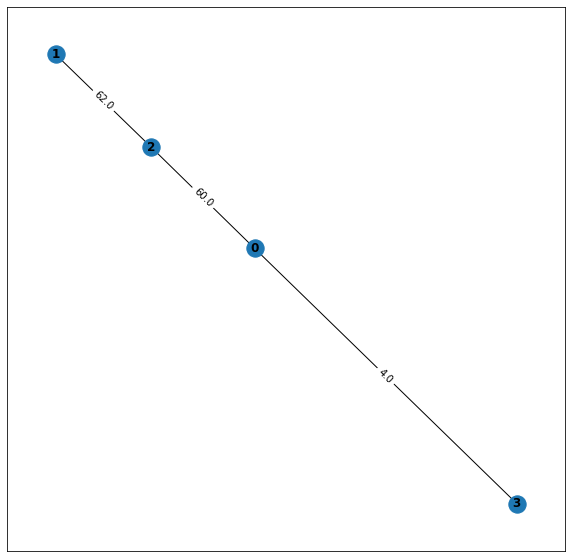

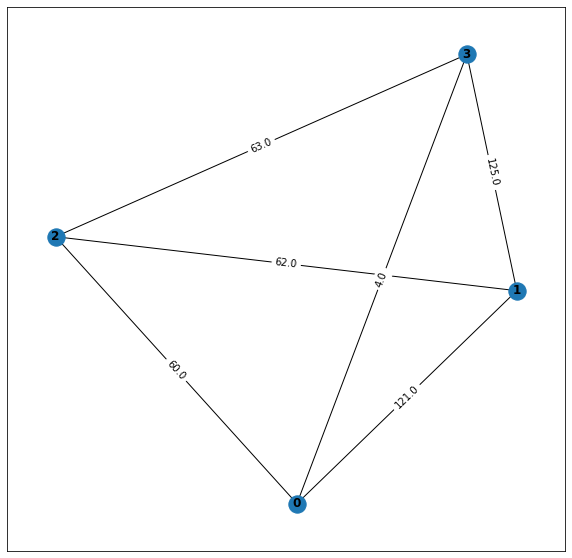

In [9]:
import numpy as np
import numpy.linalg as alg
import networkx as nx
import matplotlib.pyplot as plt
from AlgoAV.Generation.GraphGen import GraphGen, WeigthSet
from AlgoAV.Modelisation.FullGraph import SetFullGraph

# Graphe incomplet 

def ImcompletGraph(graph):
    
    fix, ax = plt.subplots(1, 1,figsize=(10,10))
    G = nx.from_numpy_matrix(npGraph)

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Graphe complet 

def CompletGraph(graph):
    
    fix, ax = plt.subplots(1, 1,figsize=(10,10))
    _,FullGraph = SetFullGraph(tuple(range(nVille)),nVille,WGraph)

    npGraph=np.asarray(FullGraph)
    npGraph=np.round(npGraph)
    G = nx.from_numpy_matrix(npGraph)

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    

nVille = 4
MaxWeigth = 100
Graph = GraphGen(nVille)
WGraph = WeigthSet(Graph,nVille,None,MaxWeigth)
npGraph=np.asarray(WGraph)
npGraph=np.round(npGraph)


print(WGraph)

ImcompletGraph(npGraph)
CompletGraph(npGraph)

###  <font color='#8B0000'> GraphGen.py </font> 



In [10]:
import numpy as np
import copy
import random
from typing import List,Tuple
from collections import deque
from functools import lru_cache

def ExistChemin(matriceAdj: List[List[bool]], u: int, v: int) -> bool :
    """
    
    Parameters
    ----------
    matriceAdj : List[List[int]]
        DESCRIPTION.
    u : int
        DESCRIPTION.
    v : int
        DESCRIPTION.
    Returns
    -------
    bool 
        DESCRIPTION.
    
    @authors : Charlie, Valentin, Dylan
    """
    n = len(matriceAdj)  # nombre de sommets dans le graphe
    file = deque()
    visites = [False] * n
    # ajouter le premier sommet à la file d'attente
    file.append(u)
    while file:
        # supprimer le sommet supérieur de la pile et marqué comme visité
        courant = file.pop()
        visites[courant] = True
 
        # visiter les sommets adjacents
        for i in range(n):
            # Il existe un chemin de u à i(v)
            if matriceAdj[courant,i] > 0:
            # Si le sommet i est le sommet voulu (i = v)
                if i == v:
                    return True
                # le sommet i n'est pas encore visité
                elif not(visites[i]):
                    file.append(i)
                    # ajouter i à la file marqué comme visité
                    visites[i] = True
    return False
 
    
def connecte(matriceAdj: List[List[bool]]) -> bool:
    """
    
    Parameters
    ----------
    matriceAdj : List[List[bool]]
        DESCRIPTION.
    Returns
    -------
    bool
        DESCRIPTION.
    @authors : Charlie, Valentin, Dylan
    """
    n = len(matriceAdj)  # nombre de sommets
    for i in range(1,n):
        if not(ExistChemin(matriceAdj, 0, i)):
                return False    
    return True

def GraphGen(nVille: int) -> Tuple[List[int]]:
    """
    Function used to generate the adjacence array from a connected non oriented graph of nVille cities
    Parameters
    ----------
    nVille : int
        Number of cities wanted for our graph.
    Returns
    -------
    List[List[int]]
        Adjacence array of said graph.
    """
    MatriceValid = False # Initialised the fact that the Array is yet to generate
    b_symm = [[False]*nVille for _ in range(nVille)] #Initialised sure to be invalid array
    while(not(MatriceValid)):
        Mat = np.random.choice((True, False), size=(nVille,nVille), p=[0.1, 0.9]) #Creation of a random array
        
        # we do the or operation with the trasposition to create symmetry
        b_symm = np.logical_or(Mat, Mat.T)
        
        for i in range(nVille):#We set the diagnonal to false to prohib loop back to itself
            b_symm[i,i] = False
        
        MatriceValid = connecte(b_symm) #We check if the graph is connected
    FinalArray = b_symm.astype(int).tolist()
    for i in range(nVille):
        FinalArray[i] = tuple(FinalArray[i])
    # We return the array in array of integers
    return tuple(FinalArray)

def WeigthSet(MatAdj:Tuple[Tuple[int]],nVille:int,seed:int,maxWeigth:float) -> Tuple[Tuple[float]]:
    """
    
    Set a given adjacence array as Weigthed
    Parameters
    ----------
    MatAdj : List[List[int]]
        Corresponding adjacence array
    nVille : int
        Number of cities of the array
    seed : int
        Seed use to generate array
    maxWeigth : float
        MaxWeigth for graph
    Returns
    -------
    List[List[float]]
        Weigth Array.
    @ray-h
    """

    Matrice_Final = list(MatAdj)
    for i in range(nVille):
        Matrice_Final[i] = list(MatAdj[i])
    if seed is not None:
        random.seed(a=seed)
    else:
        random.seed()
    for i in range(nVille):
        for j in range(i):
            Matrice_Final[j][i] *= 1 + (random.random() * maxWeigth)
            Matrice_Final[i][j] = Matrice_Final[j][i]
    for i in range(nVille):
        Matrice_Final[i] = tuple(Matrice_Final[i])
    Matrice_Final = tuple(Matrice_Final)
    return Matrice_Final

###  <font color='#8B0000'> ColonyList.py </font> 

In [11]:
from typing import List,Tuple,Deque,Union,Annotated
from AlgoAV.Modelisation.FourmiList import CreateFourmi,UpdatePheromon,FourmiType,ChoosePath
import copy

ColonyType = List[Union[int,List[List[float]],List[FourmiType],int,int,int,float,Deque[int]]]
"""
List Representing the colony having for value :
0 : The size of the graph : Integer ;
1 : Array reprensenting the pheromonMap : List of List of float ;
2 : the list of ant : List of FourmiType ;
3 : The starting vertex of every ants : Integer ;
4 : The size of the colony : Integer ;
5 : The time to live of every ants : Integer
6 : Best Path Length
7 : Best Path
"""

def CreationColony(Mat: Tuple[Tuple[float]],CitySize:int,StartingVertice:int,ColonySize:int,StartValue:float) -> ColonyType:
    """
    Create a colny element represented as a ColonyType
    Parameters
    ----------
    Mat : Tuple[Tuple[float]]
        Array representing the travel time between two vertice.
    CitySize : int
        The number of vertice to visit.
    StartingVertice : int
        The vertice from which every ant start.
    ColonySize : int
        The number of ant in the colony.
    StartValue : float
        The starting pheromon value.
    Returns
    -------
    ColonyType
        The colony with the given parameters.
    """
    PheromonMap = [[StartValue if (Mat[i][j] > 0) else 0 for i in range(CitySize)] for j in range(CitySize)] # Creating the pheromon Map
    ListAnt = [CreateFourmi(StartingVertice) for _ in range(ColonySize)] # Generating every ant of the first iteration
    return [CitySize,PheromonMap,ListAnt,StartingVertice,ColonySize,CitySize-1,float('inf'),None]

def SetNextStep(Colony: ColonyType,Evap: float,Depo: float):
    """
    
    Prepare the colony to start the next iteration
    
    Parameters
    ----------
    Colony : ColonyType
        DESCRIPTION.
    Evap : float
        DESCRIPTION.
    Depo : float
        DESCRIPTION.
    Returns
    -------
    None.
    """
    for i in range(Colony[0]): #Evaporate the aleready existing pheromon
        for j in range(i):
            Colony[1][i][j] *= (1-Evap)
            Colony[1][j][i] *= (1-Evap)
    for ant in Colony[2]:# Update pheromon repartion following
            UpdatePheromon(ant,Colony[1],Depo)
    Colony[2] = [CreateFourmi(Colony[3]) for _ in range(Colony[4])] # Create the next iteration of ants

def MoveAnts(Colony: ColonyType,WMapRef:Tuple[Tuple[float]],Alpha:float,Beta:float):
    """
    
    Parameters
    ----------
    Colony : ColonyType
        DESCRIPTION.
    WMap : Tuple[Tuple[float]]
        DESCRIPTION.
    Alpha : float
        DESCRIPTION.
    Beta : float
        DESCRIPTION.
    Returns
    -------
    None.
    """

    for antIndex in range(Colony[4]-1,-1,-1):# We iterate through every ants
        ant: FourmiType = Colony[2][antIndex]
        WMapCopy = [[ WMapRef[i][j] if j != Colony[3] else 0 for j in range(Colony[0])] for i in range(Colony[0])]
        for i in range(Colony[5]): # We iterate until the arrive to their iteration limit (TTL)
            NewVertice = ChoosePath(tuple(Colony[1][ant[0]]),Colony[0],tuple(WMapCopy[ant[0]]),Alpha,Beta)

            ant[2] += WMapRef[ant[0]][NewVertice] # We add the path weigth to the total path length
            ant[1].append(NewVertice) # We add the Vertice to the path
            ant[0] = NewVertice

            for y in range(Colony[0]):
                WMapCopy[y][NewVertice] = 0
                
        ant[2] += WMapRef[ant[0]][Colony[3]] # We add the path weigth to the total path length
        ant[1].append(Colony[3]) # We add the Vertice to the path
        ant[0] = Colony[3]

        if(ant[2] < Colony[6]): #We check if we got a better path
            Colony[6] = ant[2]
            Colony[7] = copy.deepcopy(ant[1])

###  <font color='#8B0000'> FourmiList.py </font> 

In [12]:

from typing import List,Tuple,Deque,Union
from collections import deque
import random
from functools import lru_cache

FourmiType = List[Union[int,Deque[int],float]]
"""
List representing an ant made of the following values:
0 : CurrentPosition of the ant in the graph : integer,
1 : PathTaken By the ant : FILO of integer,
2 : TotalLength of the chosen path
"""

def CreateFourmi(StartVertice:int) -> FourmiType:
    """
    
    Create a ant object with the given parameter 
    Parameters
    ----------
    StartVertice : int
        The vertice from which the ant must start.
    Returns
    -------
    FourmiType
        The ant with the given parameters.
    """
    return [StartVertice,deque((StartVertice,)),0]
    


def ChoosePath(PheromonMapRow:Tuple[float],CitySize:int,WMapRow:Tuple[float],Alpha:float,Beta:float) -> int:
    """
    
    Choose the next vertice to go folling the given context parameters
    Parameters
    ----------
    PheromonMapRow : Tuple[float]
        The row of the current position in the pheromonMap array.
    CitySize : int
        Number of city involved.
    WMapRow : Tuple[float]
        The row of the current position in the Weigthed array.
    Alpha : float
        The paramater alpha used by the ants.
    Beta : float
        The parameter beta used by the ants.
    Returns
    -------
    int
        The chosen next vertice.
    """

    Choices = PathChoiceCached(WMapRow,CitySize,PheromonMapRow,Alpha,Beta)
    
    Choice = random.choices(range(CitySize),weights=Choices,k=1)[0]

    return Choice

def UpdatePheromon(Fourmi: FourmiType,PheromonMap: List[List[float]],Depo: float):
    """
    Update the pheromon map depending of the given ant    
    Parameters
    ----------
    Fourmi : FourmiType
        Ant that update the map.
    PheromonMap : List[List[float]]
        The pheromon map.
    Depo : float
        The number of pheromon deposit by the ant.
    Returns
    -------
    None.
    """
    Start = Fourmi[1].popleft()
    Next = Fourmi[1].popleft()
    while(len(Fourmi[1])>0):
        PheromonMap[Start][Next] += Depo/Fourmi[2]
        Start = Next
        Next = Fourmi[1].popleft()
    PheromonMap[Start][Next] += Depo/Fourmi[2]
    
@lru_cache(maxsize=256)
def PathChoiceCached(WMapRow: Tuple[float],MapSize: int,PheromonMapRow: Tuple[float],Alpha: float,Beta: float) -> List[float]:
    """
    
    Give the probability to choose a Vertice over another
    Parameters
    ----------
    WMapRow : Tuple[float]
        The Weigth List of the graph starting from the current position.
    MapSize : int
        The number of concerned vertice.
    PheromonMapRow : Tuple[float]
        The Pheromon List of the graph starting from the current position.
    Alpha : float
        The paramater alpha used by the ants.
    Beta : float
        The parameter beta used by the ants.
    Returns
    -------
    List[float]
        The probability for to choose next vertice.
    """
    Choices = [0]*MapSize
    for i in range(MapSize):
        if WMapRow[i] > 0:
            Choices[i] = ((1/WMapRow[i])**Alpha)*(PheromonMapRow[i]**Beta)
        else:
            Choices[i] = 0 
    
    SumChoices = sum(Choices)
    for i in range(MapSize):
        Choices[i] /= SumChoices
    return Choices

###  <font color='#8B0000'> FullGraph.py </font> 

In [13]:

from typing import List,Tuple,Deque
from collections import deque
import random
import copy
from functools import lru_cache
import numpy as np
from AlgoAV.Generation.GraphGen import WeigthSet, GraphGen

def Djiska(WGraph:Tuple[Tuple[float]],nVille:int, u:int , v:int) -> Tuple[float,Deque[int]]:
    """
    Do the Dijkstra's algorithm to find the shortest route between from the vertice u to v    
    Parameters
    ----------
    WGraph : List[List[float]]
        The weigth array use to determine the best path
    nVille : int
        The number of cities for our graph
    u : int
        The start vertice for the path
    v : int
        The end vertice for the path
    Returns
    -------
    Tuple[float,Deque[int]]
        A tuple containing the total size of the shortest path at index 0 and A queu representing the corresponding path (including the start and end vertice)
    """
    Visited = deque() #Priority queu of the already visited vertice
    DistStart = [float('inf')]*(u) + [0.0] + [float('inf')]*(nVille-(u+1))#Array representing each vertice distance with the vertice u
    copyWGraph = list(copy.deepcopy(WGraph)) #A copy of the weigthed array to process the algoritm
    for i in range(nVille):
        copyWGraph[i] = list(copyWGraph[i])


    for i in range(len(copyWGraph)):#initialise every non-existing edge has infinite 
        for j in range(i+1):
            if(copyWGraph[i][j] == 0):
                copyWGraph[i][j] = float('inf')
                copyWGraph[j][i] = float('inf')
    
    while(v not in Visited):#Cycle through the shortest path from u and the already visited vertice until we visit the vertice v
        MinWeigth = float('inf')
        CurVertice = 0
        for i,value in enumerate(DistStart): #We search the accessible vertice for the closer one
            if(value < MinWeigth) and (i not in Visited):
                MinWeigth = value
                CurVertice = i
        
        Visited.append(CurVertice) # The vertice is then  considered visited
 
        for i in range(nVille):# We update every neighbour edge and vertice from visited vertice
            if i not in Visited:
                curValue = DistStart[CurVertice] + copyWGraph[CurVertice][i]
                if(curValue < DistStart[i]):
                    DistStart[i] = curValue
                copyWGraph[CurVertice][i] = curValue
                copyWGraph[i][CurVertice]
        
    Path = deque((v,))
    cur = v
    while(u not in Path):# We cycle through the shortest edge from ou vertice v to backtrack to our vertice u
        MinWeigth = float('inf')
        CurVertice = 0
        for i,value in enumerate(copyWGraph[cur]):
            if(value < MinWeigth) and (i not in Path):
                MinWeigth = value
                CurVertice = i
        cur = CurVertice
        Path.appendleft(cur)
    return (DistStart[v],Path)

def DjiskaSSSP(WGraph:Tuple[Tuple[float]],nVille:int, u:int,ListDeli:List[int]) -> Tuple[float,List[Deque[int]]]:
    """
    Do the Dijkstra's algorithm to find the shortest route between from the vertice u to all other vertices  
    Parameters
    ----------
    WGraph : List[List[float]]
        The weigth array use to determine the best path
    nVille : int
        The number of cities for our graph
    u : int
        The start vertice for the path
    Returns
    -------
    Tuple[float,Deque[int]]
        A tuple containing the total size of the shortest path at index 0 and A queu representing the corresponding path (including the start and end vertice)
    """
    Visited = deque() #Priority queu of the already visited vertice
    DistStart = [float('inf')]*(u) + [0.0] + [float('inf')]*(nVille-(u+1))#Array representing each vertice distance with the vertice u
    copyWGraph = list(copy.deepcopy(WGraph)) #A copy of the weigthed array to process the algoritm

    for i in range(nVille):
        copyWGraph[i] = list(copyWGraph[i])


    for i in range(len(copyWGraph)):#initialise every non-existing edge has infinite 
        for j in range(i+1):
            if(copyWGraph[i][j] == 0):
                copyWGraph[i][j] = float('inf')
                copyWGraph[j][i] = float('inf')
    
    while(any([ (i not in Visited) for i in ListDeli]) ):#Cycle through the shortest path from u and the already visited vertice until we visit the vertice v
        MinWeigth = float('inf')
        CurVertice = 0
        for i,value in enumerate(DistStart): #We search the accessible vertice for the closer one
            if(value < MinWeigth) and (i not in Visited):
                MinWeigth = value
                CurVertice = i
        
        Visited.append(CurVertice) # The vertice is then  considered visited
 
        for i in range(nVille):# We update every neighbour edge and vertice from visited vertice
            if i not in Visited:
                curValue = DistStart[CurVertice] + copyWGraph[CurVertice][i]
                if(curValue < DistStart[i]):
                    DistStart[i] = curValue
                copyWGraph[CurVertice][i] = curValue
                copyWGraph[i][CurVertice]

    AllPath = []
    for i in ListDeli:
        Path = deque((i,))
        cur = i
        if(i == u):
            Path.append(i)
        while(u not in Path):# We cycle through the shortest edge from ou vertice v to backtrack to our vertice u
            MinWeigth = float('inf')
            CurVertice = 0
            for i,value in enumerate(copyWGraph[cur]):
                if(value < MinWeigth) and (i not in Path):
                    MinWeigth = value
                    CurVertice = i
            cur = CurVertice
            Path.appendleft(cur)
        AllPath.append(Path)
    return (DistStart,AllPath)

def SetFullGraph(ListDeli:Tuple[int],nVille:int,WGraph : Tuple[Tuple[float]]) -> Tuple[List[List[Deque[int]]],Tuple[Tuple[float]]] : 
    """
    Create a complete Graph corresponding to the given incomplete graph 
    Parameters
    ----------
    ListDeli : [int]
        List of the city to delivers need to be made unique indexes to be able to do the inverse translation
    nVille : int
        Number of cities to process.
    WGraph : List[List[float]]
        Weigthed array of the situation.
    Returns
    -------
    EquivArray : List[List[Deque[int]]]
        The transformation array from the direct path from the full graph to the true path for the ADEME probleme.
    WIntGraph : List[List[float]]
        Weigthed graph of the full graph.
    """
    EquivArray = [[deque() for _ in range(nVille)] for _ in range(nVille)]
    WIntGraph =  [[0 for _ in range(nVille)] for _ in range(nVille)]
    NewCityLength = len(ListDeli)

    for i in ListDeli:
        Size, Equiv= DjiskaSSSP(WGraph, nVille, i,ListDeli)
        WIntGraph[i] = Size
        EquivArray[i] = Equiv
    for i in  range(nVille-1,-1,-1):
        if i not in ListDeli:
            WIntGraph.pop(i)
            
    for i in range(NewCityLength):
        for j in range(nVille-1,-1,-1):
            if j not in ListDeli:
                WIntGraph[i].pop(j)
        WIntGraph[i] = tuple(WIntGraph[i])

    return  EquivArray , 

###  <font color='#8B0000'> ExperiencePlan.py </font> 

In [14]:
from pulp import *
import numpy as np
import math

def Borne(CitySize,WMat):
    StateMat = {}
    OrderList = {}
    for i in range(CitySize):
        for j in range(CitySize): # create a binary variable
            StateMat[i, j] = LpVariable('x{},{}'.format(i, j),lowBound=0,upBound=1, cat=const.LpBinary)

    for i in range(CitySize): # create a binary variable
        OrderList[i] = LpVariable('u{}'.format(i),lowBound=1,upBound=CitySize, cat=const.LpInteger)

    
    # probleme
    prob = LpProblem("Shortest_Delivery", LpMinimize)

    # fonction objective
    cost = lpSum([[ WMat[n][m]*StateMat[n, m] for m in range(CitySize)] for n in range(CitySize)])
    prob += cost

    # contrainte
    for n in range(CitySize) :
        prob += lpSum([ StateMat[n,m] for m in range(CitySize)]) == 1,"All entered constraint "+str(n)
        prob += lpSum([ StateMat[m,n] for m in range(CitySize)]) == 1,"All exited constraint "+str(n)

    for i in range(CitySize) :
        for j in range(CitySize):
            if i != j and (i != 0 and j != 0):
                prob += OrderList[i] - OrderList[j] <= CitySize * (1 - StateMat[i, j]) - 1

    

    cont2 = lpSum([ StateMat[m,m] for m in range(CitySize)]) == 0,"No loop constraint"
    prob += cont2

    prob.solve(PULP_CBC_CMD(msg=0,timeLimit=math.ceil(CitySize*60*1/4)))
    return prob.objective.value() if (LpStatus[prob.status] == "Optimal") else None

ModuleNotFoundError: No module named 'pulp'

###  <font color='#8B0000'> FourmiOpti.py </font> 

In [ ]:
from AlgoAV.Modelisation.ColonyList import CreationColony,ColonyType,MoveAnts,SetNextStep
from typing import Tuple,Deque
import random



def FourmiOpti(WMap:Tuple[Tuple[float]],CitySize:int,Evap:float,Alpha:float,Beta:float,IterationCount:int,Deposit:float,StartingVertice:int,ColonySize:int,StartValue:float) -> Tuple[float,Deque[int]] :
    """
    
    Parameters
    ----------
    WMap : Tuple[Tuple[float]]
        The weigth array of to process.
    CitySize : int
        The number of vertice to process
    Evap : float
        The pheromone evaporation
    Alpha : float
        Alpha parameter for the process 
    Beta : float
        Beta parameter for the the process
    IterationCount : int
        Iteration Number for the process
    Deposit : float
        The quantity of pheromone spread 
    StartingVertice : int
        The starting Vertice to solve our problem
    ColonySize : int
        The Number of ant to process
    StartValue : float
        The starting value for the pheromone quantity
    Returns
    -------
    Tuple[float,Deque[int]] 
        The best path found and its length
    """
    random.seed()
    ColonyO: ColonyType = CreationColony(WMap, CitySize, StartingVertice, ColonySize, StartValue)
    for i in range(IterationCount):
        MoveAnts(ColonyO,WMap,Alpha,Beta)
        if(i < IterationCount-1):
            SetNextStep(ColonyO,Evap,Deposit)
    return  ColonyO[6],ColonyO[7]

###  <font color='#8B0000'> AcceptanceCalculationOpti.py </font> 

In [ ]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSet
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Processing.ExperiencePlan import Borne
from AlgoAV.Processing.FourmiOpti import FourmiOpti
import mysql.connector
import progressbar
import numpy as np
import random
import math

if __name__ == "__main__":
    

    widgets = ['\n['
               , progressbar.Timer(),
            '] ',
            progressbar.Bar('*'),' ',
            progressbar.Percentage(),' | (',
            progressbar.ETA(), ')\n',
            ]
    NbTest = 30
    seed = None
    if seed is not None:
        random.seed(seed)
    else:
        random.seed()

    nb_steps_bar = NbTest
    SizeEnumerate = [10]
    nb_steps_bar *= len(SizeEnumerate)
    
    IterationRange = range(math.floor(SizeEnumerate[0]/4),(SizeEnumerate[0]*2),math.floor(SizeEnumerate[0]/4))
    nb_steps_bar *= len(IterationRange)


    ProportionRange = range(10,100,50)
    nb_steps_bar *= len(ProportionRange)
    # AlphaRange = range(30,40,5)
    # nb_steps_bar *= len(AlphaRange)
    
    # BetaRange = range(30,40,5)
    # nb_steps_bar *= len(BetaRange)
    
    EvapRange = range(40,65,5)
    nb_steps_bar *= len(EvapRange)
    
    DepRange = range(100,110,10)
    nb_steps_bar *= len(DepRange)

    StartRange = range(100,110,10)
    nb_steps_bar *= len(StartRange)

    ColonySIzeRange = range(math.floor(SizeEnumerate[0]/4),(SizeEnumerate[0]*2),math.floor(SizeEnumerate[0]/4))
    nb_steps_bar *= len(ColonySIzeRange)

    print(nb_steps_bar)
    
    Textbar = progressbar.ProgressBar(maxval=nb_steps_bar, 
                              widgets=widgets)
    Textbar.start()
    value = 0

    #Nombre Ville
    CorrespondingSize = []
    BestCompositionsList = []
    BestMeanValuesList = []
    BestMeanDerivativeValuesList = []
    for SizeTest in SizeEnumerate:
        
        Compositions = []
        MeanValues = []
        DerivativeValues = []
        maxWeigth = 1000
        
        ListTest = []
        ListBorne = []
        for _ in range(NbTest):

            startingVertice = random.choice(range(SizeTest))
            ListDeliveries = list(range(SizeTest))

            ListDeliverieTreated = tuple(np.unique(ListDeliveries).tolist())
            CityTotreat = len(ListDeliverieTreated)
            Graph = GraphGen(SizeTest)
            WGraph = WeigthSet(Graph,SizeTest,seed,maxWeigth)
            
            
            EquivArray, WFullGraph = SetFullGraph(ListDeliverieTreated,SizeTest,WGraph)
            
            ListTest.append((WFullGraph,startingVertice,CityTotreat))
            borne = Borne(CityTotreat,WFullGraph)
            ListBorne.append(borne)
        ListTest = tuple(ListTest)
        ListBorne = tuple(ListBorne)
        Sufficient = False

        for ItterationUsed in IterationRange:
        #NIteration

            for Prop in ProportionRange:
            #Alpha
                Beta = 5

                Alpha: float = Beta*(Prop/100)

                for Evap in EvapRange:
                #Evap
                    Evap /= 100

                    for Deposit in DepRange:    
                    #Deposit


                        for StartValue in StartRange:


                            for ColonySize in ColonySIzeRange :
                            #ColonySize

                                random.seed()
                                CurValues = []
                                Compo = (ItterationUsed,Alpha,Beta,Evap,Deposit,StartValue,ColonySize)
                                Textbar.update(value)
                                print(str(SizeTest)+" : "+str(Compo))
                                for test in range(NbTest):
                                        value += 1
                                        MinWeigth, BestPath = \
                                        FourmiOpti(ListTest[test][0],
                                                   ListTest[test][2],
                                                   Evap,
                                                   Alpha,
                                                   Beta,
                                                   ItterationUsed,
                                                   Deposit,
                                                   ListTest[test][1],
                                                   ColonySize,
                                                   StartValue
                                                   )
                                        if(BestPath is not None) :
                                            CurValues.append((MinWeigth/ListBorne[test])*100)
                                if len(CurValues) > 0:
                                    meanValue = np.mean(CurValues)
                                    print(meanValue)
                                    Compositions.append(Compo)
                                    MeanValues.append(np.mean(CurValues))
                                    DerivativeValues.append(np.nanstd(CurValues))
        if len(MeanValues) > 0:
            indexBest = MeanValues.index(min(MeanValues))
            CorrespondingSize.append(SizeTest)
            # BestCompositionsList.append(Compositions[indexBest])
            BestMeanValuesList.append(np.mean(MeanValues))
            BestMeanDerivativeValuesList.append(np.nanstd(MeanValues))
    Textbar.finish()
    # affichage de la courbe de moyenne
    print("Beginning Display")
    print(str(CorrespondingSize[0]))
    print("Borne Sup = " +str(BestMeanValuesList[0] + 1.96 * (BestMeanDerivativeValuesList[0]/math.sqrt(nb_steps_bar/NbTest))))
    print("Moyenne = " +str(BestMeanValuesList[0]))
    print("Borne Inf = " +str(BestMeanValuesList[0] - 1.96 * (BestMeanDerivativeValuesList[0]/math.sqrt(nb_steps_bar/NbTest))))

###  <font color='#8B0000'> PlanDexperience.py </font> 

In [ ]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSet
from AlgoAV.Processing.FourmiOpti import FourmiOpti
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Processing.ExperiencePlan import Borne
from ipywidgets import IntProgress
from IPython.display import display
import mysql.connector
import progressbar
import matplotlib.pyplot as plt
import numpy as np
import random
import math

if __name__ == "__main__":
    

    widgets = ['\n['
               , progressbar.Timer(),
            '] ',
            progressbar.Bar('*'),' ',
            progressbar.Percentage(),' | (',
            progressbar.ETA(), ')\n',
            ]
    NbTest = 1
    PourcentageCible = 104.9879230895329
    seed = 20
    minSize = 5
    maxSize = 30
    stepSize = 1
    if seed is not None:
        random.seed(seed)
    else:
        random.seed()

    nb_steps_bar = NbTest
    SizeEnumerate = range(minSize,maxSize,stepSize)
    nb_steps_bar *= len(SizeEnumerate)

    # Iteration range(Ceil(Size/2),Size*3,Ceil(Size/10))
    MaxCeiled = maxSize - ((maxSize-minSize)%stepSize)
    nb_steps_bar *= (35/2)*(MaxCeiled-minSize)/stepSize

    # ColonySize range(Ceil(Size/2),Size*3,Ceil(Size/10))
    nb_steps_bar *= (35/2)*(MaxCeiled-minSize)/stepSize

    
    ProportionRange = range(10,170,50)
    nb_steps_bar *= len(ProportionRange)
    
    EvapRange = range(25,55,5)
    nb_steps_bar *= len(EvapRange)
    
    DepRange = range(90,106,3)
    nb_steps_bar *= len(DepRange)

    StartRange = range(90,120,10)
    nb_steps_bar *= len(StartRange)
    
    Textbar = progressbar.ProgressBar(maxval=nb_steps_bar, 
                              widgets=widgets)
    Textbar.start()
    value = 0

    #Nombre Ville
    CorrespondingSize = []
    BestCompositionsList = []
    BestMeanValuesList = []
    BestMeanDerivativeValuesList = []
    for SizeTest in SizeEnumerate:
        IteRange = range(math.ceil(SizeTest/4),2*SizeTest,math.ceil(SizeTest/10))
        ColonySIzeRange = range(math.ceil(SizeTest/4),2*SizeTest,math.ceil(SizeTest/10))
        
        
        Compositions = []
        MeanValues = []
        DerivativeValues = []
        maxWeigth = 1000
        
        ListTest = []
        print("Generating graph of size : " + str(SizeTest))
        for _ in range(NbTest):
            borne = None
            while borne is None:
                print("New Generation test")
                startingVertice = random.choice(range(SizeTest))

                ListDeliverieTreated = tuple(range(SizeTest))

                CityTotreat = len(ListDeliverieTreated)
                Graph = GraphGen(SizeTest)
                WGraph = WeigthSet(Graph,SizeTest,seed,maxWeigth)
                
                
                EquivArray, WFullGraph = SetFullGraph(ListDeliverieTreated,SizeTest,WGraph)

                borne = Borne(len(ListDeliverieTreated),WFullGraph)
            
            ListTest.append((WFullGraph,startingVertice,CityTotreat,borne))


        print("Starting Calculation for size of : "+str(SizeTest))
        Sufficient = False

        for Prop in ProportionRange :
            Alpha = 5
            Beta = Alpha*(Prop/100)

            for Evap in EvapRange:
            #Evap
                Evap /= 100

                for Deposit in DepRange:    
                #Deposit

                    for StartValue in StartRange:
                    #StartValue
                        for ItterationUsed in IteRange:
                        #NIteration
                        
                            for ColonySize in ColonySIzeRange :
                            #ColonySize

                                random.seed()
                                CurValues = []
                                if not(Sufficient):
                                    Compo = (ItterationUsed,Alpha,Beta,Evap,Deposit,StartValue,ColonySize)
                                    Textbar.update(value)
                                    print(str(SizeTest)+": "+str(Compo))
                                for test in range(NbTest):
                                    if not(Sufficient):
                                        MinWeigth, BestPath = \
                                        FourmiOpti(ListTest[test][0],
                                                ListTest[test][2],
                                                Evap,
                                                Alpha,
                                                Beta,
                                                ItterationUsed,
                                                Deposit,
                                                ListTest[test][1],
                                                ColonySize,
                                                StartValue
                                                )
                                        value += 1
                                        if(BestPath is not None) :
                                            CurValues.append((MinWeigth/ListTest[test][3])*100)
                                    else:
                                        value += 1
                                if len(CurValues) > 0:
                                    meanValue = np.mean(CurValues)
                                    print(meanValue)
                                    Compositions.append(Compo)
                                    MeanValues.append(np.mean(CurValues))
                                    DerivativeValues.append(1.96 * (np.nanstd(CurValues)/math.sqrt(NbTest)))
                                    if meanValue < PourcentageCible:
                                        Sufficient = True
        if len(MeanValues) > 0:
            indexBest = MeanValues.index(min(MeanValues))
            CorrespondingSize.append(SizeTest)
            BestCompositionsList.append(Compositions[indexBest])
            BestMeanValuesList.append(MeanValues[indexBest])
            BestMeanDerivativeValuesList.append(DerivativeValues[indexBest])
    Textbar.finish()
    # affichage de la courbe de moyenne
    print("Beginning Display")
    plt.plot(CorrespondingSize, BestMeanValuesList)
    
    
    # affichage de la bande d'écart-type
    plt.fill_between(CorrespondingSize,
                    np.subtract(BestMeanValuesList, BestMeanDerivativeValuesList), # borne haute
                    np.add(BestMeanValuesList, BestMeanDerivativeValuesList),      # borne basse
                    alpha=.5)                          # transparence
    plt.xlabel("Taille test")
    plt.ylabel("Distance de la borne en %")
    plt.title("Meilleurs qualité de solutions trouvé par taille de liste")
    
    print("Beginning to send to DB")
    RowList = []
    for i in range(len(CorrespondingSize)):
        RowList.append((CorrespondingSize[i],BestCompositionsList[i][0],BestCompositionsList[i][1],BestCompositionsList[i][2],BestCompositionsList[i][3],BestCompositionsList[i][4],BestCompositionsList[i][5],BestCompositionsList[i][6]))
    connection = mysql.connector.connect(host='testrialpayapi.cokj0wfmdhfw.eu-west-3.rds.amazonaws.com',
                                         port=3315,
                                         database='AlgoAV',
                                         user='PortfolioUser')
    connection.start_transaction()
    c = connection.cursor()
    for i in RowList:
       c.execute("REPLACE INTO Param VALUES (%s,%s,%s,%s,%s,%s,%s,%s)",i)
    connection.commit()
    c.close()
    connection.close()
    plt.show()

###  <font color='#8B0000'> ResolutionCalculationHighNumber.py </font> 

In [ ]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSet
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Processing.ExperiencePlan import Borne
from AlgoAV.Processing.FourmiOpti import FourmiOpti
import matplotlib.pyplot as plt
from collections import deque
import mysql.connector
import progressbar
import numpy as np
import random
import math
import copy
from time import process_time
if __name__ == "__main__":
    
    Nb_Test = 5

    List_MeanResult = []
    List_DerivationResult = []

    widgets = ['\n['
            , progressbar.Timer(),
        '] ',
        progressbar.Bar('*'),' ',
        progressbar.Percentage(),' | (',
        progressbar.ETA(), ')\n',
        ]

    nb_steps_bar = Nb_Test
    value = 0

    Textbar = progressbar.ProgressBar(maxval=nb_steps_bar, 
                    widgets=widgets)
    Textbar.start()
    nb_Cities = 131
    OptimalValue = 564

    List_CurResult = []
    Evap = 0.25
    Alpha = 5
    Beta = 0.5
    Deposit = 90
    StartValueDeposit = 90

    seed = None
    if seed is not None:
        random.seed(seed)
    else:
        random.seed()

    for test in range(Nb_Test):
        start = process_time()
        print("=================================\nGeneration Full Graph ("+str(test)+","+str(nb_Cities)+")")
        startingVertice = random.choice(range(nb_Cities))
        ListDeliveries = list(range(nb_Cities))

        ListDeliverieTreated = tuple(np.unique(ListDeliveries).tolist())
        CityTotreat = len(ListDeliverieTreated)

        WFullGraph = [[0.0, 13.0, 14.0, 26.0, 13.152946437965905, 5.0, 7.810249675906654, 13.0, 18.681541692269406, 24.515301344262525, 30.4138126514911, 7.0710678118654755, 15.264337522473747, 9.486832980505138, 10.44030650891055, 11.40175425099138, 12.36931687685298, 14.422205101855956, 15.0, 16.15549442140351, 19.209372712298546, 23.430749027719962, 28.30194339616981, 33.54101966249684, 15.811388300841896, 18.110770276274835, 18.0, 18.110770276274835, 18.439088914585774, 18.973665961010276, 19.697715603592208, 20.591260281974, 21.633307652783937, 22.80350850198276, 24.08318915758459, 25.45584412271571, 26.90724809414742, 28.42534080710379, 30.0, 31.622776601683793, 33.28663395418648, 34.132096331752024, 35.84689665786984, 36.71511950137164, 25.079872407968907, 25.079872407968907, 26.570660511172846, 26.92582403567252, 27.313000567495326, 28.178005607210743, 29.154759474226502, 29.68164415931166, 25.317977802344327, 28.160255680657446, 28.861739379323623, 31.76476034853718, 32.7566787083184, 35.0, 38.897300677553446, 41.036569057366385, 44.04543109109048, 34.539832078341085, 36.71511950137164, 33.06055050963308, 35.4682957019364, 36.6742416417845, 37.589892258425, 34.058772731852805, 36.40054944640259, 37.57658845611187, 38.47076812334269, 42.20189569201838, 44.04543109109048, 34.92849839314596, 35.22782990761707, 39.35733730830886, 38.118237105091836, 38.63935817272331, 41.6293165929973, 43.41658669218482, 41.0, 42.20189569201838, 45.18849411078001, 46.06517122512408, 46.52956049652737, 47.01063709417264, 48.83646178829912, 50.0, 48.507731342539614, 60.207972893961475, 61.29437168288782, 57.271284253105414, 57.0087712549569, 58.249463516842795, 64.88451279003334, 68.8839603971781, 69.83552104767315, 63.387695966961914, 64.6297145282261, 71.02816342831905, 71.0, 71.06335201775947, 77.87810988975015, 78.7210264160726, 74.00675644831355, 74.06078584514209, 74.33034373659252, 74.81310045707235, 75.7099729229908, 77.20103626247513, 78.43468620451031, 74.33034373659252, 77.41446893184762, 78.05767098754612, 80.2807573457052, 81.04319835741924, 82.21921916437786, 79.05694150420949, 81.49233092751734, 82.56512580987206, 80.05623023850174, 84.75848040166836, 80.39900496896712, 81.09870529176159, 84.29116205154607, 84.71717653463199, 85.5102333057278, 86.58521813797087, 87.64131445842195, 84.29116205154607, 107.91200118615167], [13.0, 0.0, 1.0, 13.0, 26.076809620810597, 13.92838827718412, 8.602325267042627, 5.0990195135927845, 7.0710678118654755, 12.083045973594572, 17.72004514666935, 18.681541692269406, 27.202941017470888, 18.35755975068582, 18.867962264113206, 19.4164878389476, 20.0, 24.186773244895647, 19.849433241279208, 16.55294535724685, 15.033296378372908, 15.811388300841896, 18.601075237738275, 22.67156809750927, 23.430749027719962, 23.430749027719962, 22.20360331117452, 21.095023109728988, 20.12461179749811, 19.313207915827967, 18.681541692269406, 18.24828759089466, 18.027756377319946, 18.027756377319946, 18.24828759089466, 18.681541692269406, 19.313207915827967, 20.12461179749811, 21.095023109728988, 22.20360331117452, 23.430749027719962, 24.08318915758459, 25.45584412271571, 26.1725046566048, 29.154759474226502, 27.313000567495326, 25.317977802344327, 25.179356624028344, 25.079872407968907, 25.0, 25.079872407968907, 25.179356624028344, 30.23243291566195, 29.732137494637012, 28.635642126552707, 28.071337695236398, 28.284271247461902, 29.120439557122072, 31.304951684997057, 32.7566787083184, 35.0, 32.0, 32.38826948140329, 34.785054261852174, 33.0, 33.13608305156178, 33.37663853655727, 35.73513677041127, 34.0, 34.132096331752024, 34.36568055487916, 36.05551275463989, 37.16180835212409, 39.96248240537617, 36.138621999185304, 35.35533905932738, 39.293765408777, 38.47076812334269, 38.2099463490856, 38.8329756778952, 40.19950248448356, 41.10960958218893, 41.43669871020132, 41.773197148410844, 41.97618372363071, 42.20189569201838, 48.16637831516918, 48.010415536631214, 52.0, 54.42425929675111, 55.154328932550705, 56.00892785976178, 58.69412236331676, 57.0087712549569, 59.77457653551382, 63.89053137985315, 64.51356446515724, 66.09841147864296, 64.1248781675256, 72.56721022610694, 72.18032973047436, 71.7007670809734, 73.49829930005184, 74.04052944165107, 75.31268153505093, 74.67261881037788, 74.24284477308234, 74.02702209328699, 74.06078584514209, 74.54528824815154, 75.13321502504735, 76.6550715869472, 77.1621668954417, 79.62411694957753, 78.23042886243178, 78.5175139698144, 79.07591289387686, 80.60397012554654, 79.30952023559341, 79.76214641043707, 81.58431221748455, 81.39410298049853, 82.71033792700887, 81.49846624323675, 84.2140130857092, 84.02380615040002, 84.0535543567314, 84.38009243891595, 84.8528137423857, 86.34813257969161, 107.00467279516349], [14.0, 1.0, 0.0, 12.0, 27.073972741361768, 14.866068747318506, 9.433981132056603, 5.385164807134504, 6.4031242374328485, 11.180339887498949, 16.76305461424021, 19.6468827043885, 28.160255680657446, 19.235384061671343, 19.72308292331602, 20.248456731316587, 20.808652046684813, 25.059928172283335, 20.518284528683193, 17.0, 15.132745950421556, 15.524174696260024, 18.027756377319946, 21.93171219946131, 24.20743687382041, 24.08318915758459, 22.80350850198276, 21.633307652783937, 20.591260281974, 19.697715603592208, 18.973665961010276, 18.439088914585774, 18.110770276274835, 18.0, 18.110770276274835, 18.439088914585774, 18.973665961010276, 19.697715603592208, 20.591260281974, 21.633307652783937, 22.80350850198276, 23.430749027719962, 24.758836806279895, 25.45584412271571, 29.68164415931166, 27.730849247724095, 25.495097567963924, 25.317977802344327, 25.179356624028344, 25.019992006393608, 25.019992006393608, 25.079872407968907, 30.805843601498726, 30.083217912982647, 28.861739379323623, 28.0178514522438, 28.160255680657446, 28.861739379323623, 30.870698080866262, 32.2490309931942, 34.40930106817051, 32.01562118716424, 32.2490309931942, 35.11409973215888, 33.015148038438355, 33.06055050963308, 33.24154027718932, 36.05551275463989, 34.0147027033899, 34.058772731852805, 34.23448553724738, 35.73513677041127, 36.76955262170047, 40.496913462633174, 36.40054944640259, 35.22782990761707, 39.56008088970496, 38.63935817272331, 38.118237105091836, 38.63935817272331, 40.311288741492746, 41.19465984809196, 41.30375285612676, 41.593268686170845, 41.773197148410844, 41.97618372363071, 48.25971404805462, 48.0, 52.392747589718944, 54.08326913195984, 54.78138369920935, 56.0357029044876, 58.9406481131655, 57.0350769263968, 59.481089431852205, 63.60031446463138, 64.19501538281614, 66.40783086353596, 64.19501538281614, 72.78049189171504, 72.3671196055225, 71.84705978674423, 73.24616030891995, 73.76313442364011, 75.50496672405067, 74.81310045707235, 74.33034373659252, 74.06078584514209, 74.02702209328699, 74.43117626371358, 74.96665925596525, 76.92203845452875, 77.23341245859851, 79.83107164506812, 78.16009211867653, 78.40918313565064, 78.91767862779544, 80.8084154033477, 79.22752047110903, 79.63039620647382, 81.78630692236935, 81.21576201698781, 82.96987405076617, 81.61494961096282, 84.29116205154607, 84.0535543567314, 84.02380615040002, 84.29116205154607, 84.71717653463199, 86.58521813797087, 107.0], [26.0, 13.0, 12.0, 0.0, 39.05124837953327, 26.476404589747453, 20.615528128088304, 14.866068747318506, 9.433981132056603, 5.385164807134504, 6.4031242374328485, 31.400636936215164, 39.81205847478876, 30.364452901377952, 30.675723300355934, 31.016124838541646, 31.38470965295043, 36.05551275463989, 30.01666203960727, 25.0, 20.518284528683193, 17.0, 15.132745950421556, 15.524174696260024, 34.438350715445125, 33.28663395418648, 31.622776601683793, 30.0, 28.42534080710379, 26.90724809414742, 25.45584412271571, 24.08318915758459, 22.80350850198276, 21.633307652783937, 20.591260281974, 19.697715603592208, 18.973665961010276, 18.439088914585774, 18.110770276274835, 18.0, 18.110770276274835, 18.24828759089466, 18.681541692269406, 18.973665961010276, 37.53664875824692, 34.655446902326915, 30.23243291566195, 29.68164415931166, 29.154759474226502, 28.178005607210743, 27.313000567495326, 26.92582403567252, 39.05124837953327, 36.235341863986875, 33.83784863137726, 30.083217912982647, 29.410882339705484, 28.442925306655784, 28.0178514522438, 28.284271247461902, 29.120439557122072, 34.539832078341085, 32.984845004941285, 40.80441152620633, 35.4682957019364, 34.48187929913333, 33.95585369269929, 41.617304093369626, 36.40054944640259, 35.4400902933387, 34.92849839314596, 34.0147027033899, 34.058772731852805, 48.08326112068523, 41.340053217188775, 35.90264614203248, 44.41846462902562, 42.485291572496, 39.05124837953327, 38.3275357934736, 43.46262762420146, 44.01136216933077, 41.593268686170845, 41.30375285612676, 41.19465984809196, 41.10960958218893, 50.92150822589606, 49.47726750741192, 58.249463516842795, 51.35172830587107, 51.62363799656123, 57.723478758647246, 63.071388124885914, 58.69412236331676, 57.21887800367987, 61.29437168288782, 61.5223536610881, 71.11961754677819, 66.21933252457322, 76.32168761236873, 75.61084578286372, 74.63243262818116, 71.25307010929424, 71.449282711585, 78.77182237323191, 77.4919350642375, 76.40026177965623, 75.50496672405067, 74.67261881037788, 74.10802925459562, 74.0, 81.02468759581859, 79.07591289387686, 83.21658488546619, 78.31347265956222, 78.10249675906654, 78.0, 84.15461959987698, 79.22752047110903, 79.02531240052139, 85.09406559801923, 80.02499609497022, 86.92525524840292, 83.93449827097318, 86.12200647918046, 85.32877591996736, 84.5931439302264, 84.1486779456457, 84.00595217006948, 90.24965373894794, 107.67079455451233], [13.152946437965905, 26.076809620810597, 27.073972741361768, 39.05124837953327, 0.0, 13.341664064126334, 19.235384061671343, 25.179356624028344, 31.144823004794873, 37.12142238654117, 43.104524124504614, 8.54400374531753, 6.0, 12.206555615733702, 12.806248474865697, 13.45362404707371, 14.142135623730951, 11.180339887498949, 18.384776310850235, 23.021728866442675, 28.178005607210743, 33.61547262794322, 39.21734310225516, 44.9221548904324, 15.264337522473747, 19.4164878389476, 20.615528128088304, 21.93171219946131, 23.345235059857504, 24.839484696748443, 26.40075756488817, 28.0178514522438, 29.68164415931166, 31.38470965295043, 33.12099032335839, 34.88552708502482, 36.6742416417845, 38.48376280978771, 40.311288741492746, 42.15447781671598, 44.01136216933077, 44.94441010848846, 46.8187996428785, 47.75981574503821, 25.495097567963924, 27.459060435491963, 31.827660925679098, 32.526911934581186, 33.24154027718932, 34.713109915419565, 36.235341863986875, 37.013511046643494, 24.698178070456937, 30.528675044947494, 32.802438933713454, 38.2099463490856, 39.698866482558415, 42.80186911806539, 47.70744176750625, 50.24937810560445, 53.71219600798314, 39.698866482558415, 43.139309220245984, 34.438350715445125, 40.45985664828782, 42.44997055358225, 43.840620433565945, 35.34119409414458, 41.23105625617661, 43.18564576337837, 44.553338819890925, 49.678969393496885, 52.009614495783374, 32.38826948140329, 37.12142238654117, 45.27692569068709, 39.395431207184416, 41.182520563948, 46.861498055439924, 49.51767361255979, 43.9089968002003, 45.27692569068709, 50.44799302251776, 51.73973328110612, 52.40229002629561, 53.075418038862395, 50.99019513592785, 53.33854141237835, 46.389654018972806, 66.52818951391959, 67.89698078707183, 59.50630218724736, 56.293871780150276, 60.41522986797286, 70.43436661176133, 74.2024258363566, 75.43208866258443, 61.29437168288782, 65.7875368135941, 69.87131027825369, 70.21395872616783, 70.83078426785913, 82.37718130647589, 83.48652585896721, 72.99315036357864, 73.7563556583431, 74.72616676907762, 75.8946638440411, 77.62087348130012, 80.05623023850174, 81.88406438373708, 72.24956747275377, 77.88452991448301, 76.6550715869472, 82.46211251235322, 83.6719785830358, 85.42247947700886, 77.64663547121665, 83.773504164503, 85.42833253669417, 78.63841300535, 88.11923740024082, 78.16009211867653, 80.8084154033477, 84.40379138403677, 85.44003745317531, 86.97700845625813, 88.76936408468859, 90.37698822156003, 82.21921916437786, 108.41586599755591], [5.0, 13.92838827718412, 14.866068747318506, 26.476404589747453, 13.341664064126334, 0.0, 6.0, 12.0, 18.0, 24.0, 30.0, 5.0, 13.341664064126334, 5.0, 5.830951894845301, 6.708203932499369, 7.615773105863909, 10.63014581273465, 10.0, 11.661903789690601, 15.620499351813308, 20.591260281974, 26.0, 31.622776601683793, 11.180339887498949, 13.152946437965905, 13.0, 13.152946437965905, 13.601470508735444, 14.317821063276353, 15.264337522473747, 16.401219466856727, 17.69180601295413, 19.1049731745428, 20.615528128088304, 22.20360331117452, 23.853720883753127, 25.553864678361276, 27.294688127912362, 29.068883707497267, 30.870698080866262, 31.78049716414141, 33.61547262794322, 34.539832078341085, 20.09975124224178, 20.09975124224178, 21.93171219946131, 22.360679774997898, 22.825424421026653, 23.853720883753127, 25.0, 25.612496949731394, 20.396078054371138, 23.194827009486403, 24.041630560342615, 27.459060435491963, 28.600699292150182, 31.144823004794873, 35.4682957019364, 37.8021163428716, 41.048751503547585, 29.966648127543394, 32.449961479175904, 28.071337695236398, 30.870698080866262, 32.2490309931942, 33.28663395418648, 29.068883707497267, 31.78049716414141, 33.12099032335839, 34.132096331752024, 38.28837943815329, 40.311288741492746, 30.083217912982647, 30.265491900843113, 34.9857113690718, 33.13608305156178, 33.734255586866, 37.12142238654117, 39.11521443121589, 36.138621999185304, 37.36308338453881, 40.70626487409524, 41.677331968349414, 42.190046219457976, 42.720018726587654, 43.93176527297759, 45.221676218380054, 43.56604182158393, 56.0357029044876, 57.201398584300364, 52.392747589718944, 52.009614495783374, 53.36665625650534, 60.53924347066124, 64.4980619863884, 65.5133574166368, 58.42088667591412, 59.682493245507096, 66.03029607687671, 66.0, 66.06814663663572, 73.348483283569, 74.24284477308234, 69.00724599634447, 69.06518659932803, 69.35416353759881, 69.87131027825369, 70.83078426785913, 72.42237223399962, 73.7360156233031, 69.35416353759881, 72.44308110509934, 73.06161783043132, 75.43208866258443, 76.24303246854758, 77.4919350642375, 74.06078584514209, 76.6550715869472, 77.79460135510689, 75.05997601918082, 80.05623023850174, 75.4254598925323, 76.10519036176179, 79.30952023559341, 79.76214641043707, 80.60397012554654, 81.74350127074322, 82.86132994346639, 79.30952023559341, 102.95630140987001], [7.810249675906654, 8.602325267042627, 9.433981132056603, 20.615528128088304, 19.235384061671343, 6.0, 0.0, 6.0, 12.0, 18.0, 24.0, 11.0, 19.235384061671343, 9.848857801796104, 10.295630140987, 10.816653826391969, 11.40175425099138, 15.652475842498529, 11.661903789690601, 10.0, 11.661903789690601, 15.620499351813308, 20.591260281974, 26.0, 14.866068747318506, 15.264337522473747, 14.317821063276353, 13.601470508735444, 13.152946437965905, 13.0, 13.152946437965905, 13.601470508735444, 14.317821063276353, 15.264337522473747, 16.401219466856727, 17.69180601295413, 19.1049731745428, 20.615528128088304, 22.20360331117452, 23.853720883753127, 25.553864678361276, 26.419689627245813, 28.178005607210743, 29.068883707497267, 21.540659228538015, 20.396078054371138, 20.223748416156685, 20.396078054371138, 20.615528128088304, 21.18962010041709, 21.93171219946131, 22.360679774997898, 22.360679774997898, 23.194827009486403, 23.021728866442675, 24.698178070456937, 25.495097567963924, 27.459060435491963, 31.144823004794873, 33.24154027718932, 36.235341863986875, 27.892651361962706, 29.546573405388315, 28.284271247461902, 28.861739379323623, 29.732137494637012, 30.463092423455635, 29.274562336608895, 29.832867780352597, 30.675723300355934, 31.38470965295043, 34.66987164671943, 36.40054944640259, 32.202484376209235, 30.066592756745816, 32.31098884280702, 33.13608305156178, 33.015148038438355, 34.785054261852174, 36.24913792078372, 35.12833614050059, 36.22154055254967, 38.27531841800928, 39.0, 39.395431207184416, 39.81205847478876, 43.104524124504614, 43.73785545725808, 44.9221548904324, 52.839379254491625, 53.85164807134504, 51.35172830587107, 52.46903848937962, 52.3450093132096, 57.697486947006624, 61.741396161732524, 62.609903369994115, 59.43904440685432, 59.07622195096772, 66.48308055437865, 66.27216610312357, 66.06814663663572, 70.9365914038728, 71.69379331573968, 69.35416353759881, 69.06518659932803, 69.00724599634447, 69.18092222571191, 69.72087205421343, 70.83078426785913, 71.84010022264724, 70.21395872616783, 72.02777242147643, 73.55270219373317, 74.14849964766651, 74.73285756613352, 75.69015788066504, 74.54528824815154, 75.31268153505093, 76.15773105863909, 75.53806987208503, 78.16009211867653, 76.2954782408499, 76.02631123499285, 79.00632886041473, 79.1580697086532, 79.63039620647382, 80.4114419718985, 81.25269226308751, 80.06247560499239, 102.3132444994293], [13.0, 5.0990195135927845, 5.385164807134504, 14.866068747318506, 25.179356624028344, 12.0, 6.0, 0.0, 6.0, 12.0, 18.0, 17.0, 25.179356624028344, 15.524174696260024, 15.811388300841896, 16.15549442140351, 16.55294535724685, 21.18962010041709, 15.620499351813308, 11.661903789690601, 10.0, 11.661903789690601, 15.620499351813308, 20.591260281974, 19.72308292331602, 19.1049731745428, 17.69180601295413, 16.401219466856727, 15.264337522473747, 14.317821063276353, 13.601470508735444, 13.152946437965905, 13.0, 13.152946437965905, 13.601470508735444, 14.317821063276353, 15.264337522473747, 16.401219466856727, 17.69180601295413, 19.1049731745428, 20.615528128088304, 21.400934559032695, 23.021728866442675, 23.853720883753127, 24.413111231467404, 22.360679774997898, 20.223748416156685, 20.09975124224178, 20.024984394500787, 20.024984394500787, 20.223748416156685, 20.396078054371138, 25.612496949731394, 24.698178070456937, 23.53720459187964, 23.194827009486403, 23.53720459187964, 24.698178070456937, 27.459060435491963, 29.206163733020468, 31.827660925679098, 27.018512172212592, 27.65863337187866, 29.732137494637012, 28.0178514522438, 28.284271247461902, 28.635642126552707, 30.675723300355934, 29.017236257093817, 29.274562336608895, 29.614185789921695, 31.78049716414141, 33.12099032335839, 35.22782990761707, 31.04834939252005, 30.59411708155671, 34.20526275297414, 33.37663853655727, 33.37663853655727, 34.20526275297414, 35.12833614050059, 36.05551275463989, 36.6742416417845, 37.107950630558946, 37.36308338453881, 37.64306044943742, 43.104524124504614, 43.04648650006177, 47.01063709417264, 50.15974481593781, 50.99019513592785, 51.0, 53.600373133029585, 52.0, 55.362442142665635, 59.464274989274024, 60.166435825965294, 61.032778078668514, 59.07622195096772, 67.468511173732, 67.08203932499369, 66.61080993352356, 68.96375859826666, 69.57010852370435, 70.21395872616783, 69.58448102845921, 69.18092222571191, 69.00724599634447, 69.1158447825099, 69.72087205421343, 70.40596565632774, 71.56814934033156, 72.11102550927978, 74.52516353554684, 73.33484846919642, 73.68174807915459, 74.33034373659252, 75.50496672405067, 74.43117626371358, 74.96665925596525, 76.48529270389177, 76.68767828015137, 77.62087348130012, 76.4198926981712, 79.1580697086532, 79.00632886041473, 79.1012010022604, 79.51100552753688, 80.06247560499239, 81.25269226308751, 102.0196059588548], [18.681541692269406, 7.0710678118654755, 6.4031242374328485, 9.433981132056603, 31.144823004794873, 18.0, 12.0, 6.0, 0.0, 6.0, 12.0, 23.0, 31.144823004794873, 21.37755832643195, 21.587033144922902, 21.840329667841555, 22.135943621178654, 26.92582403567252, 20.591260281974, 15.620499351813308, 11.661903789690601, 10.0, 11.661903789690601, 15.620499351813308, 25.079872407968907, 23.853720883753127, 22.20360331117452, 20.615528128088304, 19.1049731745428, 17.69180601295413, 16.401219466856727, 15.264337522473747, 14.317821063276353, 13.601470508735444, 13.152946437965905, 13.0, 13.152946437965905, 13.601470508735444, 14.317821063276353, 15.264337522473747, 16.401219466856727, 17.029386365926403, 18.384776310850235, 19.1049731745428, 28.284271247461902, 25.612496949731394, 21.93171219946131, 21.540659228538015, 21.18962010041709, 20.615528128088304, 20.223748416156685, 20.09975124224178, 29.732137494637012, 27.459060435491963, 25.495097567963924, 23.194827009486403, 23.021728866442675, 23.194827009486403, 24.698178070456937, 25.942243542145693, 28.0178514522438, 27.459060435491963, 27.0, 32.2490309931942, 28.442925306655784, 28.071337695236398, 28.0, 33.12099032335839, 29.427877939124322, 29.068883707497267, 29.0, 29.832867780352597, 30.675723300355934, 38.948684188300895, 33.1058907144937, 30.0, 36.24913792078372, 34.785054261852174, 33.015148038438355, 33.13608305156178, 36.138621999185304, 36.87817782917155, 36.013886210738214, 36.124783736376884, 36.22154055254967, 36.345563690772494, 43.93176527297759, 43.18564576337837, 49.73932046178355, 48.08326112068523, 48.703182647543684, 51.35172830587107, 55.362442142665635, 52.3450093132096, 53.600373133029585, 57.723478758647246, 58.240879114244144, 63.15853069855251, 59.682493245507096, 68.96375859826666, 68.41052550594829, 67.68308503607086, 67.468511173732, 67.91170738539859, 71.56814934033156, 70.61161377563892, 69.87131027825369, 69.35416353759881, 69.02897942168927, 69.1158447825099, 69.46221994724903, 73.38937252763509, 72.69112738154499, 75.96051605933177, 73.00684899377592, 73.10950690573696, 73.43704787094863, 76.92203845452875, 74.02702209328699, 74.24284477308234, 77.88452991448301, 75.66372975210778, 79.37883848986453, 77.27871634544663, 79.76214641043707, 79.30952023559341, 79.02531240052139, 79.05694150420949, 79.30952023559341, 82.86132994346639, 102.07840124139877], [24.515301344262525, 12.083045973594572, 11.180339887498949, 5.385164807134504, 37.12142238654117, 24.0, 18.0, 12.0, 6.0, 0.0, 6.0, 29.0, 37.12142238654117, 27.294688127912362, 27.459060435491963, 27.65863337187866, 27.892651361962706, 32.7566787083184, 26.0, 20.591260281974, 15.620499351813308, 11.661903789690601, 10.0, 11.661903789690601, 30.675723300355934, 29.068883707497267, 27.294688127912362, 25.553864678361276, 23.853720883753127, 22.20360331117452, 20.615528128088304, 19.1049731745428, 17.69180601295413, 16.401219466856727, 15.264337522473747, 14.317821063276353, 13.601470508735444, 13.152946437965905, 13.0, 13.152946437965905, 13.601470508735444, 13.92838827718412, 14.7648230602334, 15.264337522473747, 32.802438933713454, 29.732137494637012, 25.0, 24.413111231467404, 23.853720883753127, 22.825424421026653, 21.93171219946131, 21.540659228538015, 34.40930106817051, 31.144823004794873, 28.600699292150182, 24.698178070456937, 24.041630560342615, 23.194827009486403, 23.194827009486403, 23.769728648009426, 25.079872407968907, 29.154759474226502, 27.65863337187866, 35.608987629529715, 30.083217912982647, 29.120439557122072, 28.635642126552707, 36.40054944640259, 31.016124838541646, 30.083217912982647, 29.614185789921695, 29.017236257093817, 29.274562336608895, 43.18564576337837, 36.05551275463989, 30.59411708155671, 39.11521443121589, 37.12142238654117, 33.734255586866, 33.13608305156178, 38.07886552931954, 38.62641583165593, 36.345563690772494, 36.124783736376884, 36.05551275463989, 36.013886210738214, 45.5411901469428, 44.14748010928823, 53.009433122794285, 46.69047011971501, 47.07440918375928, 52.392747589718944, 57.697486947006624, 53.36665625650534, 52.46903848937962, 56.568542494923804, 56.88585061331157, 65.76473218982953, 60.876925020897694, 70.9365914038728, 70.22819946431775, 69.26037828369117, 66.48308055437865, 66.75327707311455, 73.38937252763509, 72.12489168102785, 71.06335201775947, 70.21395872616783, 69.46221994724903, 69.02897942168927, 69.02897942168927, 75.64390259630977, 73.7563556583431, 77.83315488916018, 73.17103251970687, 73.02739212103907, 73.02739212103907, 78.77182237323191, 74.10802925459562, 74.0, 79.71198153351854, 75.1065909225016, 81.54140052758476, 78.587530817554, 80.8084154033477, 80.06247560499239, 79.40403012442127, 79.05694150420949, 79.00632886041473, 84.86459803710851, 102.48902380255166], [30.4138126514911, 17.72004514666935, 16.76305461424021, 6.4031242374328485, 43.104524124504614, 30.0, 24.0, 18.0, 12.0, 6.0, 0.0, 35.0, 43.104524124504614, 33.24154027718932, 33.37663853655727, 33.54101966249684, 33.734255586866, 38.63935817272331, 31.622776601683793, 26.0, 20.591260281974, 15.620499351813308, 11.661903789690601, 10.0, 36.40054944640259, 34.539832078341085, 32.69556544854363, 30.870698080866262, 29.068883707497267, 27.294688127912362, 25.553864678361276, 23.853720883753127, 22.20360331117452, 20.615528128088304, 19.1049731745428, 17.69180601295413, 16.401219466856727, 15.264337522473747, 14.317821063276353, 13.601470508735444, 13.152946437965905, 13.038404810405298, 13.038404810405298, 13.152946437965905, 37.73592452822641, 34.40930106817051, 29.0, 28.284271247461902, 27.586228448267445, 26.248809496813376, 25.0, 24.413111231467404, 39.44616584663204, 35.4682957019364, 32.526911934581186, 27.459060435491963, 26.419689627245813, 24.698178070456937, 23.194827009486403, 23.0, 23.345235059857504, 31.906112267087632, 29.546573405388315, 39.59797974644666, 32.7566787083184, 31.304951684997057, 30.463092423455635, 40.311288741492746, 33.61547262794322, 32.202484376209235, 31.38470965295043, 29.427877939124322, 29.068883707497267, 47.80167361086848, 39.698866482558415, 32.31098884280702, 42.638011210655684, 40.22437072223753, 35.4682957019364, 34.20526275297414, 40.8166632639171, 41.182520563948, 37.64306044943742, 37.107950630558946, 36.87817782917155, 36.6742416417845, 47.853944456021594, 45.880278987817846, 56.72741841473134, 46.04345773288535, 46.17358552246078, 54.08326913195984, 60.53924347066124, 55.02726596879042, 52.009614495783374, 56.0357029044876, 56.142675390472796, 68.79680225126747, 62.625873247404705, 73.348483283569, 72.49827584156743, 71.30918594402827, 66.03029607687671, 66.12110101926616, 75.64390259630977, 74.09453421137081, 72.73238618387272, 71.56814934033156, 70.40596565632774, 69.46221994724903, 69.1158447825099, 78.29431652425353, 75.28612089887484, 80.11242100947892, 73.824115301167, 73.43704787094863, 73.10950690573696, 81.02468759581859, 74.67261881037788, 74.24284477308234, 81.93900170248598, 75.02666192761077, 84.07734534343957, 80.32434251209281, 82.28000972289685, 81.25269226308751, 80.23091673413684, 79.51100552753688, 79.1580697086532, 87.23531395025755, 103.24727599312246], [7.0710678118654755, 18.681541692269406, 19.6468827043885, 31.400636936215164, 8.54400374531753, 5.0, 11.0, 17.0, 23.0, 29.0, 35.0, 0.0, 8.54400374531753, 4.47213595499958, 5.385164807134504, 6.324555320336759, 7.280109889280518, 7.615773105863909, 11.180339887498949, 14.866068747318506, 19.72308292331602, 25.079872407968907, 30.675723300355934, 36.40054944640259, 10.0, 13.341664064126334, 13.92838827718412, 14.7648230602334, 15.811388300841896, 17.029386365926403, 18.384776310850235, 19.849433241279208, 21.400934559032695, 23.021728866442675, 24.698178070456937, 26.419689627245813, 28.178005607210743, 29.966648127543394, 31.78049716414141, 33.61547262794322, 35.4682957019364, 36.40054944640259, 38.27531841800928, 39.21734310225516, 20.223748416156685, 21.18962010041709, 24.413111231467404, 25.0, 25.612496949731394, 26.90724809414742, 28.284271247461902, 29.0, 20.024984394500787, 24.351591323771842, 25.942243542145693, 30.479501308256342, 31.827660925679098, 34.713109915419565, 39.408120990476064, 41.88078318274385, 45.27692569068709, 32.449961479175904, 35.4682957019364, 28.861739379323623, 33.28663395418648, 35.0, 36.235341863986875, 29.832867780352597, 34.132096331752024, 35.805027579936315, 37.013511046643494, 41.72529209005013, 43.93176527297759, 29.154759474226502, 31.32091952673165, 37.8021163428716, 33.95585369269929, 35.11409973215888, 39.66106403010388, 42.01190307520001, 37.69615364994153, 39.0, 43.266615305567875, 44.40720662234904, 45.0, 45.60701700396552, 45.221676218380054, 47.01063709417264, 43.04648650006177, 59.033888572581766, 60.30754513325841, 53.75872022286245, 52.15361924162119, 54.70831746635972, 63.245553203367585, 67.11929677819934, 68.24221567329127, 58.034472514187634, 60.63827174318213, 66.06814663663572, 66.18912297349165, 66.48308055437865, 75.66372975210778, 76.66159403508382, 69.1158447825099, 69.46221994724903, 70.03570517957252, 70.83078426785913, 72.12489168102785, 74.09453421137081, 75.64390259630977, 69.02897942168927, 73.16419889536138, 73.02739212103907, 76.84399781375251, 77.83315488916018, 79.30952023559341, 74.02702209328699, 78.10889834071403, 79.47955712005447, 75.02666192761077, 81.93900170248598, 75.05997601918082, 76.53103945458993, 79.90619500389191, 80.60397012554654, 81.74350127074322, 83.16850365372699, 84.50443775329198, 79.02531240052139, 103.75451797391764], [15.264337522473747, 27.202941017470888, 28.160255680657446, 39.81205847478876, 6.0, 13.341664064126334, 19.235384061671343, 25.179356624028344, 31.144823004794873, 37.12142238654117, 43.104524124504614, 8.54400374531753, 0.0, 10.04987562112089, 10.198039027185569, 10.44030650891055, 10.770329614269007, 6.4031242374328485, 14.7648230602334, 20.248456731316587, 25.96150997149434, 31.78049716414141, 37.656340767525464, 43.56604182158393, 10.63014581273465, 14.866068747318506, 16.401219466856727, 18.027756377319946, 19.72308292331602, 21.470910553583888, 23.259406699226016, 25.079872407968907, 26.92582403567252, 28.792360097775937, 30.675723300355934, 32.57299494980466, 34.48187929913333, 36.40054944640259, 38.3275357934736, 40.26164427839479, 42.20189569201838, 43.174066289845804, 45.12205669071391, 46.09772228646444, 20.248456731316587, 22.67156809750927, 27.80287754891569, 28.600699292150182, 29.410882339705484, 31.064449134018133, 32.7566787083184, 33.61547262794322, 19.235384061671343, 25.612496949731394, 28.284271247461902, 34.40930106817051, 36.05551275463989, 39.44616584663204, 44.721359549995796, 47.4236228055175, 51.07837115648854, 35.38361202590826, 39.20459156782532, 29.154759474226502, 36.069377593742864, 38.28837943815329, 39.824615503479755, 30.01666203960727, 36.76955262170047, 38.948684188300895, 40.45985664828782, 46.04345773288535, 48.54894437575342, 26.476404589747453, 31.906112267087632, 41.10960958218893, 34.0, 36.05551275463989, 42.42640687119285, 45.34313619501854, 38.8329756778952, 40.22437072223753, 45.967379738244816, 47.38143096192854, 48.104053883222775, 48.83646178829912, 45.65084884205331, 48.25971404805462, 40.44749683231337, 62.24146527838174, 63.702433234531945, 54.120236510939236, 50.44799302251776, 55.00909015790027, 65.85590330410783, 69.52697318307479, 70.83784299369935, 55.326304774492215, 60.166435825965294, 63.953107821277925, 64.32728814430156, 65.0, 77.42092740338364, 78.60025445251433, 67.08203932499369, 67.91170738539859, 68.96375859826666, 70.22819946431775, 72.09022125087424, 74.70609078247904, 76.66159403508382, 66.27216610312357, 72.12489168102785, 70.71067811865476, 76.96752561957543, 78.26237921249263, 80.1311425102625, 71.7007670809734, 78.29431652425353, 80.06247560499239, 72.69112738154499, 82.85529554590944, 72.17340230306452, 74.95331880577403, 78.587530817554, 79.6994353806851, 81.34494452638098, 83.2586331859946, 84.970583144992, 76.23647421018367, 102.61578825892242], [9.486832980505138, 18.35755975068582, 19.235384061671343, 30.364452901377952, 12.206555615733702, 5.0, 9.848857801796104, 15.524174696260024, 21.37755832643195, 27.294688127912362, 33.24154027718932, 4.47213595499958, 10.04987562112089, 0.0, 1.0, 2.0, 3.0, 5.830951894845301, 6.708203932499369, 10.816653826391969, 16.15549442140351, 21.840329667841555, 27.65863337187866, 33.54101966249684, 6.324555320336759, 9.055385138137417, 9.486832980505138, 10.295630140987, 11.40175425099138, 12.727922061357855, 14.212670403551895, 15.811388300841896, 17.4928556845359, 19.235384061671343, 21.02379604162864, 22.847319317591726, 24.698178070456937, 26.570660511172846, 28.460498941515414, 30.364452901377952, 32.28002478313795, 33.24154027718932, 35.17101079013795, 36.138621999185304, 16.0312195418814, 16.76305461424021, 20.0, 20.615528128088304, 21.2602916254693, 22.627416997969522, 24.08318915758459, 24.839484696748443, 16.0312195418814, 19.924858845171276, 21.470910553583888, 26.1725046566048, 27.586228448267445, 30.610455730027933, 35.510561809129406, 38.07886552931954, 41.593268686170845, 28.0178514522438, 31.144823004794873, 24.515301344262525, 28.844410203711913, 30.610455730027933, 31.89043743820395, 25.495097567963924, 29.68164415931166, 31.400636936215164, 32.64965543462902, 37.53664875824692, 39.824615503479755, 25.495097567963924, 26.92582403567252, 33.421549934136806, 29.614185789921695, 30.675723300355934, 35.22782990761707, 37.64306044943742, 33.24154027718932, 34.539832078341085, 38.8329756778952, 40.0, 40.607881008493905, 41.23105625617661, 40.80441152620633, 42.5440947723653, 39.20459156782532, 54.67174773134658, 55.97320787662612, 49.33558553417604, 48.041648597857254, 50.28916384272063, 58.82176467941097, 62.68173577685928, 63.8200595424354, 54.147945482723536, 56.293871780150276, 62.00806399170998, 62.07253821135398, 62.289646009589745, 71.19691004531025, 72.20110802473879, 65.03076195155643, 65.27633568147036, 65.76473218982953, 66.49060083951716, 67.72001181334805, 69.6419413859206, 71.17583859709698, 65.12296062065974, 68.8839603971781, 69.0, 72.42237223399962, 73.38937252763509, 74.84650960465692, 70.0, 73.68174807915459, 75.02666192761077, 71.0, 77.47257579298626, 71.17583859709698, 72.3394774656273, 75.66372975210778, 76.2954782408499, 77.3692445355388, 78.74642849044012, 80.05623023850174, 75.1065909225016, 99.46356116689167], [10.44030650891055, 18.867962264113206, 19.72308292331602, 30.675723300355934, 12.806248474865697, 5.830951894845301, 10.295630140987, 15.811388300841896, 21.587033144922902, 27.459060435491963, 33.37663853655727, 5.385164807134504, 10.198039027185569, 1.0, 0.0, 1.0, 2.0, 5.385164807134504, 5.830951894845301, 10.295630140987, 15.811388300841896, 21.587033144922902, 27.459060435491963, 33.37663853655727, 5.385164807134504, 8.06225774829855, 8.54400374531753, 9.433981132056603, 10.63014581273465, 12.041594578792296, 13.601470508735444, 15.264337522473747, 17.0, 18.788294228055936, 20.615528128088304, 22.47220505424423, 24.351591323771842, 26.248809496813376, 28.160255680657446, 30.083217912982647, 32.01562118716424, 32.984845004941285, 34.92849839314596, 35.90264614203248, 15.033296378372908, 15.811388300841896, 19.209372712298546, 19.849433241279208, 20.518284528683193, 21.93171219946131, 23.430749027719962, 24.20743687382041, 15.033296378372908, 18.973665961010276, 20.591260281974, 25.45584412271571, 26.90724809414742, 30.0, 34.9857113690718, 37.589892258425, 41.14608122288197, 27.202941017470888, 30.4138126514911, 23.53720459187964, 28.0178514522438, 29.832867780352597, 31.144823004794873, 24.515301344262525, 28.844410203711913, 30.610455730027933, 31.89043743820395, 36.87817782917155, 39.20459156782532, 24.515301344262525, 25.96150997149434, 32.64965543462902, 28.635642126552707, 29.732137494637012, 34.40930106817051, 36.87817782917155, 32.31098884280702, 33.61547262794322, 38.01315561749642, 39.20459156782532, 39.824615503479755, 40.45985664828782, 39.84971769034255, 41.6293165929973, 38.2099463490856, 53.907327887774215, 55.226805085936306, 48.38388161361178, 47.042533945356304, 49.33558553417604, 58.008620049092706, 61.85466837676846, 63.00793600809346, 53.150729063673246, 55.31726674375732, 61.00819617067857, 61.07372593840988, 61.29437168288782, 70.32780389006896, 71.34423592694787, 64.03124237432849, 64.28063471995279, 64.77653896280658, 65.5133574166368, 66.76076692189807, 68.70953354520753, 70.26378868236469, 64.1248781675256, 67.89698078707183, 68.0, 71.47027354082255, 72.44998274671983, 73.92563831310488, 69.0, 72.73238618387272, 74.09453421137081, 70.0, 76.55716818169282, 70.178344238091, 71.34423592694787, 74.67261881037788, 75.31268153505093, 76.40026177965623, 77.79460135510689, 79.12016177940993, 74.10802925459562, 98.47842403288143], [11.40175425099138, 19.4164878389476, 20.248456731316587, 31.016124838541646, 13.45362404707371, 6.708203932499369, 10.816653826391969, 16.15549442140351, 21.840329667841555, 27.65863337187866, 33.54101966249684, 6.324555320336759, 10.44030650891055, 2.0, 1.0, 0.0, 1.0, 5.0990195135927845, 5.0, 9.848857801796104, 15.524174696260024, 21.37755832643195, 27.294688127912362, 33.24154027718932, 4.47213595499958, 7.0710678118654755, 7.615773105863909, 8.602325267042627, 9.899494936611665, 11.40175425099138, 13.038404810405298, 14.7648230602334, 16.55294535724685, 18.384776310850235, 20.248456731316587, 22.135943621178654, 24.041630560342615, 25.96150997149434, 27.892651361962706, 29.832867780352597, 31.78049716414141, 32.7566787083184, 34.713109915419565, 35.6931365951495, 14.035668847618199, 14.866068747318506, 18.439088914585774, 19.1049731745428, 19.79898987322333, 21.2602916254693, 22.80350850198276, 23.600847442411894, 14.035668847618199, 18.027756377319946, 19.72308292331602, 24.758836806279895, 26.248809496813376, 29.410882339705484, 34.48187929913333, 37.12142238654117, 40.718546143004666, 26.40075756488817, 29.698484809834994, 22.561028345356956, 27.202941017470888, 29.068883707497267, 30.4138126514911, 23.53720459187964, 28.0178514522438, 29.832867780352597, 31.144823004794873, 36.235341863986875, 38.600518131237564, 23.53720459187964, 25.0, 31.89043743820395, 27.65863337187866, 28.792360097775937, 33.60059523282288, 36.124783736376884, 31.38470965295043, 32.69556544854363, 37.20215047547655, 38.41874542459709, 39.05124837953327, 39.698866482558415, 38.897300677553446, 40.718546143004666, 37.21558813185679, 53.150729063673246, 54.48853090330111, 47.43416490252569, 46.04345773288535, 48.38388161361178, 57.201398584300364, 61.032778078668514, 62.20128616033595, 52.15361924162119, 54.3415126767741, 60.00833275470999, 60.07495318350236, 60.29925372672534, 69.46221994724903, 70.49113419430843, 63.0317380372777, 63.28506932918696, 63.788713735268246, 64.53681120105021, 65.80273550544841, 67.77905281132217, 69.35416353759881, 63.12685640834652, 66.91038783328041, 67.0, 70.51950084905593, 71.5122367151245, 73.00684899377592, 68.0, 71.78439941937245, 73.16419889536138, 69.0, 75.64390259630977, 69.18092222571191, 70.34912934784623, 73.68174807915459, 74.33034373659252, 75.43208866258443, 76.84399781375251, 78.18567643756751, 73.10950690573696, 97.49358953285082], [12.36931687685298, 20.0, 20.808652046684813, 31.38470965295043, 14.142135623730951, 7.615773105863909, 11.40175425099138, 16.55294535724685, 22.135943621178654, 27.892651361962706, 33.734255586866, 7.280109889280518, 10.770329614269007, 3.0, 2.0, 1.0, 0.0, 5.0, 4.242640687119285, 9.486832980505138, 15.297058540778355, 21.213203435596427, 27.16615541441225, 33.13608305156178, 3.605551275463989, 6.082762530298219, 6.708203932499369, 7.810249675906654, 9.219544457292887, 10.816653826391969, 12.529964086141668, 14.317821063276353, 16.15549442140351, 18.027756377319946, 19.924858845171276, 21.840329667841555, 23.769728648009426, 25.709920264364882, 27.65863337187866, 29.614185789921695, 31.575306807693888, 32.55764119219941, 34.52535300326414, 35.510561809129406, 13.038404810405298, 13.92838827718412, 17.69180601295413, 18.384776310850235, 19.1049731745428, 20.615528128088304, 22.20360331117452, 23.021728866442675, 13.038404810405298, 17.08800749063506, 18.867962264113206, 24.08318915758459, 25.612496949731394, 28.844410203711913, 34.0, 36.6742416417845, 40.311288741492746, 25.612496949731394, 29.0, 21.587033144922902, 26.40075756488817, 28.319604517012593, 29.698484809834994, 22.561028345356956, 27.202941017470888, 29.068883707497267, 30.4138126514911, 35.608987629529715, 38.01315561749642, 22.561028345356956, 24.041630560342615, 31.144823004794873, 26.68332812825267, 27.85677655436824, 32.802438933713454, 35.38361202590826, 30.463092423455635, 31.78049716414141, 36.40054944640259, 37.64306044943742, 38.28837943815329, 38.948684188300895, 37.94733192202055, 39.81205847478876, 36.22154055254967, 52.40229002629561, 53.75872022286245, 46.486557196677836, 45.044422518220834, 47.43416490252569, 56.4003546088143, 60.21627686929839, 61.40032573203501, 51.15662224971465, 53.36665625650534, 59.00847396772772, 59.07622195096772, 59.30430001273095, 68.60029154456998, 69.6419413859206, 62.03224967708329, 62.289646009589745, 62.80127387243033, 63.56099432828282, 64.8459713474939, 66.85057965343307, 68.4470598345904, 62.12889826803627, 65.92419889539804, 66.0, 69.57010852370435, 70.57619995437555, 72.09022125087424, 67.0, 70.83784299369935, 72.2357252334328, 68.0, 74.73285756613352, 68.18357573492314, 69.35416353759881, 72.69112738154499, 73.348483283569, 74.46475676452586, 75.8946638440411, 77.25283166331187, 72.11102550927978, 96.5090669315583], [14.422205101855956, 24.186773244895647, 25.059928172283335, 36.05551275463989, 11.180339887498949, 10.63014581273465, 15.652475842498529, 21.18962010041709, 26.92582403567252, 32.7566787083184, 38.63935817272331, 7.615773105863909, 6.4031242374328485, 5.830951894845301, 5.385164807134504, 5.0990195135927845, 5.0, 0.0, 8.54400374531753, 14.317821063276353, 20.223748416156685, 26.1725046566048, 32.14031735997639, 38.118237105091836, 4.242640687119285, 8.48528137423857, 10.0, 11.661903789690601, 13.416407864998739, 15.231546211727817, 17.08800749063506, 18.973665961010276, 20.8806130178211, 22.80350850198276, 24.73863375370596, 26.68332812825267, 28.635642126552707, 30.59411708155671, 32.55764119219941, 34.52535300326414, 36.49657518178932, 37.48332962798263, 39.45883931389772, 40.44749683231337, 14.317821063276353, 16.401219466856727, 21.400934559032695, 22.20360331117452, 23.021728866442675, 24.698178070456937, 26.419689627245813, 27.294688127912362, 13.601470508735444, 19.4164878389476, 21.93171219946131, 28.0178514522438, 29.68164415931166, 33.12099032335839, 38.48376280978771, 41.23105625617661, 44.94441010848846, 29.0, 32.802438933713454, 23.259406699226016, 29.698484809834994, 31.89043743820395, 33.421549934136806, 24.166091947189145, 30.4138126514911, 32.55764119219941, 34.058772731852805, 39.66106403010388, 42.190046219457976, 22.0, 25.942243542145693, 34.713109915419565, 28.231188426986208, 30.01666203960727, 36.069377593742864, 38.948684188300895, 32.7566787083184, 34.132096331752024, 39.6232255123179, 41.012193308819754, 41.72529209005013, 42.44997055358225, 39.81205847478876, 42.190046219457976, 36.013886210738214, 55.86591089385369, 57.3149195236284, 48.33218389437829, 45.5411901469428, 49.24428900898052, 59.54829972383762, 63.25345840347388, 64.53681120105021, 51.0098029794274, 54.70831746635972, 59.30430001273095, 59.53990258641679, 60.01666435249463, 71.28113354878694, 72.42237223399962, 62.39390995922599, 62.96824596572466, 63.788713735268246, 64.8459713474939, 66.48308055437865, 68.87670143089025, 70.71067811865476, 62.00806399170998, 66.94027188471824, 66.18912297349165, 71.30918594402827, 72.49827584156743, 74.24284477308234, 67.1863081289633, 72.61542535852834, 74.24957912338628, 68.18357573492314, 76.94153624668537, 68.0, 70.03570517957252, 73.54590403278758, 74.46475676452586, 75.8946638440411, 77.62087348130012, 79.20227269466452, 72.00694410957877, 97.51410154434076], [15.0, 19.849433241279208, 20.518284528683193, 30.01666203960727, 18.384776310850235, 10.0, 11.661903789690601, 15.620499351813308, 20.591260281974, 26.0, 31.622776601683793, 11.180339887498949, 14.7648230602334, 6.708203932499369, 5.830951894845301, 5.0, 4.242640687119285, 8.54400374531753, 0.0, 6.0, 12.0, 18.0, 24.0, 30.0, 5.0, 3.605551275463989, 3.0, 3.605551275463989, 5.0, 6.708203932499369, 8.54400374531753, 10.44030650891055, 12.36931687685298, 14.317821063276353, 16.278820596099706, 18.24828759089466, 20.223748416156685, 22.20360331117452, 24.186773244895647, 26.1725046566048, 28.160255680657446, 29.154759474226502, 31.144823004794873, 32.14031735997639, 10.198039027185569, 10.198039027185569, 13.45362404707371, 14.142135623730951, 14.866068747318506, 16.401219466856727, 18.027756377319946, 18.867962264113206, 10.770329614269007, 13.341664064126334, 14.7648230602334, 19.849433241279208, 21.400934559032695, 24.698178070456937, 29.966648127543394, 32.69556544854363, 36.40054944640259, 21.400934559032695, 24.758836806279895, 18.110770276274835, 22.20360331117452, 24.08318915758459, 25.45584412271571, 19.1049731745428, 23.021728866442675, 24.839484696748443, 26.1725046566048, 31.400636936215164, 33.83784863137726, 20.615528128088304, 20.396078054371138, 26.90724809414742, 23.194827009486403, 24.041630560342615, 28.600699292150182, 31.144823004794873, 26.570660511172846, 27.85677655436824, 32.202484376209235, 33.421549934136806, 34.058772731852805, 34.713109915419565, 34.20526275297414, 35.84689665786984, 33.734255586866, 48.16637831516918, 49.51767361255979, 42.720018726587654, 42.01190307520001, 43.68065933568311, 52.20153254455275, 56.0357029044876, 57.201398584300364, 48.507731342539614, 49.8196748283246, 56.0357029044876, 56.0, 56.08029957123981, 64.4980619863884, 65.5133574166368, 59.00847396772772, 59.07622195096772, 59.413803110051795, 60.01666435249463, 61.1310068623117, 62.96824596572466, 64.47480127925948, 59.413803110051795, 62.51399843235114, 63.071388124885914, 65.80273550544841, 66.73080248281148, 68.15423684555495, 64.07027391856539, 67.05221845696084, 68.35202996254024, 65.06919393998976, 70.77428911688199, 65.49045732013177, 66.12110101926616, 69.35416353759881, 69.87131027825369, 70.83078426785913, 72.12489168102785, 73.38937252763509, 69.35416353759881, 93.05912099305473], [16.15549442140351, 16.55294535724685, 17.0, 25.0, 23.021728866442675, 11.661903789690601, 10.0, 11.661903789690601, 15.620499351813308, 20.591260281974, 26.0, 14.866068747318506, 20.248456731316587, 10.816653826391969, 10.295630140987, 9.848857801796104, 9.486832980505138, 14.317821063276353, 6.0, 0.0, 6.0, 12.0, 18.0, 24.0, 11.0, 8.54400374531753, 6.708203932499369, 5.0, 3.605551275463989, 3.0, 3.605551275463989, 5.0, 6.708203932499369, 8.54400374531753, 10.44030650891055, 12.36931687685298, 14.317821063276353, 16.278820596099706, 18.24828759089466, 20.223748416156685, 22.20360331117452, 23.194827009486403, 25.179356624028344, 26.1725046566048, 12.806248474865697, 10.770329614269007, 10.44030650891055, 10.770329614269007, 11.180339887498949, 12.206555615733702, 13.45362404707371, 14.142135623730951, 14.142135623730951, 13.341664064126334, 13.038404810405298, 15.811388300841896, 17.029386365926403, 19.849433241279208, 24.698178070456937, 27.294688127912362, 30.870698080866262, 18.384776310850235, 20.808652046684813, 18.439088914585774, 19.313207915827967, 20.591260281974, 21.633307652783937, 19.4164878389476, 20.248456731316587, 21.470910553583888, 22.47220505424423, 26.870057685088806, 29.068883707497267, 23.600847442411894, 20.09975124224178, 23.323807579381203, 23.194827009486403, 23.021728866442675, 25.495097567963924, 27.459060435491963, 25.179356624028344, 26.30589287593181, 29.068883707497267, 30.01666203960727, 30.528675044947494, 31.064449134018133, 33.13608305156178, 33.95585369269929, 35.4682957019364, 44.40720662234904, 45.60701700396552, 41.43669871020132, 42.579337712087536, 42.42640687119285, 48.877397639399746, 52.839379254491625, 53.85164807134504, 49.72926703662542, 49.09175083453431, 56.568542494923804, 56.32051136131489, 56.08029957123981, 61.741396161732524, 62.609903369994115, 59.413803110051795, 59.07622195096772, 59.00847396772772, 59.21148537234985, 59.841457201508724, 61.1310068623117, 62.297672508690084, 60.41522986797286, 62.03224967708329, 63.63961030678928, 64.32728814430156, 65.0, 66.09841147864296, 64.6297145282261, 65.5133574166368, 66.48308055437865, 65.62011886609167, 68.62215385719105, 66.49060083951716, 66.03029607687671, 69.00724599634447, 69.18092222571191, 69.72087205421343, 70.61161377563892, 71.56814934033156, 70.21395872616783, 92.34717104492157], [19.209372712298546, 15.033296378372908, 15.132745950421556, 20.518284528683193, 28.178005607210743, 15.620499351813308, 11.661903789690601, 10.0, 11.661903789690601, 15.620499351813308, 20.591260281974, 19.72308292331602, 25.96150997149434, 16.15549442140351, 15.811388300841896, 15.524174696260024, 15.297058540778355, 20.223748416156685, 12.0, 6.0, 0.0, 6.0, 12.0, 18.0, 17.0, 14.317821063276353, 12.36931687685298, 10.44030650891055, 8.54400374531753, 6.708203932499369, 5.0, 3.605551275463989, 3.0, 3.605551275463989, 5.0, 6.708203932499369, 8.54400374531753, 10.44030650891055, 12.36931687685298, 14.317821063276353, 16.278820596099706, 17.26267650163207, 19.235384061671343, 20.223748416156685, 17.204650534085253, 14.142135623730951, 10.44030650891055, 10.198039027185569, 10.04987562112089, 10.04987562112089, 10.44030650891055, 10.770329614269007, 18.867962264113206, 15.811388300841896, 13.92838827718412, 13.341664064126334, 13.92838827718412, 15.811388300841896, 19.849433241279208, 22.20360331117452, 25.553864678361276, 17.029386365926403, 18.027756377319946, 20.591260281974, 18.027756377319946, 18.439088914585774, 18.973665961010276, 21.470910553583888, 19.026297590440446, 19.4164878389476, 19.924858845171276, 23.021728866442675, 24.839484696748443, 27.586228448267445, 21.540659228538015, 20.8806130178211, 24.698178070456937, 23.53720459187964, 23.53720459187964, 24.698178070456937, 25.179356624028344, 26.076809620810597, 26.92582403567252, 27.51363298439521, 27.85677655436824, 28.231188426986208, 33.13608305156178, 33.06055050963308, 38.07886552931954, 41.182520563948, 42.190046219457976, 41.0, 43.965895873961216, 42.0, 46.09772228646444, 50.15974481593781, 50.99019513592785, 51.62363799656123, 49.09175083453431, 57.723478758647246, 57.271284253105414, 56.71860364994893, 59.464274989274024, 60.166435825965294, 60.41522986797286, 59.682493245507096, 59.21148537234985, 59.00847396772772, 59.135437767890075, 59.841457201508724, 60.63827174318213, 61.98386886924694, 62.12889826803627, 64.76109943476871, 63.387695966961914, 63.788713735268246, 64.53681120105021, 65.73431371817918, 64.4980619863884, 65.11528238439882, 66.70832032063167, 66.94027188471824, 68.00735254367721, 66.48308055437865, 69.18092222571191, 69.00724599634447, 69.1158447825099, 69.58448102845921, 70.21395872616783, 71.56814934033156, 92.02173656261873], [23.430749027719962, 15.811388300841896, 15.524174696260024, 17.0, 33.61547262794322, 20.591260281974, 15.620499351813308, 11.661903789690601, 10.0, 11.661903789690601, 15.620499351813308, 25.079872407968907, 31.78049716414141, 21.840329667841555, 21.587033144922902, 21.37755832643195, 21.213203435596427, 26.1725046566048, 18.0, 12.0, 6.0, 0.0, 6.0, 12.0, 23.0, 20.223748416156685, 18.24828759089466, 16.278820596099706, 14.317821063276353, 12.36931687685298, 10.44030650891055, 8.54400374531753, 6.708203932499369, 5.0, 3.605551275463989, 3.0, 3.605551275463989, 5.0, 6.708203932499369, 8.54400374531753, 10.44030650891055, 11.40175425099138, 13.341664064126334, 14.317821063276353, 22.360679774997898, 18.867962264113206, 13.45362404707371, 12.806248474865697, 12.206555615733702, 11.180339887498949, 10.44030650891055, 10.198039027185569, 24.166091947189145, 19.849433241279208, 17.029386365926403, 13.341664064126334, 13.038404810405298, 13.341664064126334, 15.811388300841896, 17.69180601295413, 20.615528128088304, 17.72004514666935, 17.0, 24.08318915758459, 18.681541692269406, 18.110770276274835, 18.0, 24.839484696748443, 19.6468827043885, 19.1049731745428, 19.0, 20.248456731316587, 21.470910553583888, 32.202484376209235, 24.413111231467404, 20.0, 27.459060435491963, 25.495097567963924, 23.021728866442675, 23.194827009486403, 26.570660511172846, 27.202941017470888, 26.019223662515376, 26.1725046566048, 26.30589287593181, 26.476404589747453, 34.20526275297414, 33.24154027718932, 41.400483088968905, 38.62641583165593, 39.395431207184416, 41.43669871020132, 46.09772228646444, 42.42640687119285, 43.965895873961216, 48.08326112068523, 48.703182647543684, 54.120236510939236, 49.8196748283246, 59.464274989274024, 58.82176467941097, 57.97413216254298, 57.723478758647246, 58.240879114244144, 61.98386886924694, 60.876925020897694, 60.01666435249463, 59.413803110051795, 59.033888572581766, 59.135437767890075, 59.53990258641679, 64.07807737440318, 62.80127387243033, 66.40783086353596, 63.00793600809346, 63.12685640834652, 63.50590523722971, 67.35725647619564, 64.03124237432849, 64.28063471995279, 68.30812543175226, 65.76473218982953, 70.00714249274856, 67.468511173732, 69.87131027825369, 69.35416353759881, 69.02897942168927, 69.06518659932803, 69.35416353759881, 73.38937252763509, 92.0869154657707], [28.30194339616981, 18.601075237738275, 18.027756377319946, 15.132745950421556, 39.21734310225516, 26.0, 20.591260281974, 15.620499351813308, 11.661903789690601, 10.0, 11.661903789690601, 30.675723300355934, 37.656340767525464, 27.65863337187866, 27.459060435491963, 27.294688127912362, 27.16615541441225, 32.14031735997639, 24.0, 18.0, 12.0, 6.0, 0.0, 6.0, 29.0, 26.1725046566048, 24.186773244895647, 22.20360331117452, 20.223748416156685, 18.24828759089466, 16.278820596099706, 14.317821063276353, 12.36931687685298, 10.44030650891055, 8.54400374531753, 6.708203932499369, 5.0, 3.605551275463989, 3.0, 3.605551275463989, 5.0, 5.830951894845301, 7.615773105863909, 8.54400374531753, 27.85677655436824, 24.166091947189145, 18.027756377319946, 17.204650534085253, 16.401219466856727, 14.866068747318506, 13.45362404707371, 12.806248474865697, 29.732137494637012, 24.698178070456937, 21.400934559032695, 15.811388300841896, 14.7648230602334, 13.341664064126334, 13.341664064126334, 14.317821063276353, 16.401219466856727, 20.248456731316587, 18.027756377319946, 28.42534080710379, 21.095023109728988, 19.697715603592208, 18.973665961010276, 29.068883707497267, 21.95449840010015, 20.615528128088304, 19.924858845171276, 19.026297590440446, 19.4164878389476, 37.21558813185679, 28.284271247461902, 20.8806130178211, 31.144823004794873, 28.600699292150182, 24.041630560342615, 23.194827009486403, 29.154759474226502, 29.5296461204668, 26.476404589747453, 26.1725046566048, 26.076809620810597, 26.019223662515376, 36.24913792078372, 34.48187929913333, 45.27692569068709, 36.87817782917155, 37.36308338453881, 42.720018726587654, 48.877397639399746, 43.68065933568311, 42.579337712087536, 46.69047011971501, 47.07440918375928, 57.14017850864661, 51.24451190127583, 61.741396161732524, 60.92618484691127, 59.80802621722272, 56.568542494923804, 56.88585061331157, 64.07807737440318, 62.625873247404705, 61.40032573203501, 60.41522986797286, 59.53990258641679, 59.033888572581766, 59.033888572581766, 66.64833081180653, 64.03124237432849, 68.54195795277518, 63.198101237299845, 63.0317380372777, 63.0317380372777, 69.46221994724903, 64.1248781675256, 64.0, 70.3846574190711, 65.12296062065974, 72.44998274671983, 68.96375859826666, 71.06335201775947, 70.21395872616783, 69.46221994724903, 69.06518659932803, 69.00724599634447, 75.64390259630977, 92.5418824100742], [33.54101966249684, 22.67156809750927, 21.93171219946131, 15.524174696260024, 44.9221548904324, 31.622776601683793, 26.0, 20.591260281974, 15.620499351813308, 11.661903789690601, 10.0, 36.40054944640259, 43.56604182158393, 33.54101966249684, 33.37663853655727, 33.24154027718932, 33.13608305156178, 38.118237105091836, 30.0, 24.0, 18.0, 12.0, 6.0, 0.0, 35.0, 32.14031735997639, 30.14962686336267, 28.160255680657446, 26.1725046566048, 24.186773244895647, 22.20360331117452, 20.223748416156685, 18.24828759089466, 16.278820596099706, 14.317821063276353, 12.36931687685298, 10.44030650891055, 8.54400374531753, 6.708203932499369, 5.0, 3.605551275463989, 3.1622776601683795, 3.1622776601683795, 3.605551275463989, 33.52610922848042, 29.732137494637012, 23.259406699226016, 22.360679774997898, 21.470910553583888, 19.72308292331602, 18.027756377319946, 17.204650534085253, 35.4400902933387, 29.966648127543394, 26.419689627245813, 19.849433241279208, 18.384776310850235, 15.811388300841896, 13.341664064126334, 13.0, 13.601470508735444, 24.041630560342615, 20.808652046684813, 33.28663395418648, 24.758836806279895, 22.80350850198276, 21.633307652783937, 33.83784863137726, 25.495097567963924, 23.600847442411894, 22.47220505424423, 19.6468827043885, 19.1049731745428, 42.485291572496, 32.802438933713454, 23.323807579381203, 35.4682957019364, 32.526911934581186, 26.419689627245813, 24.698178070456937, 32.64965543462902, 32.802438933713454, 28.231188426986208, 27.51363298439521, 27.202941017470888, 26.92582403567252, 39.11521443121589, 36.6742416417845, 49.57822102496216, 36.05551275463989, 36.22154055254967, 44.77722635447622, 52.20153254455275, 45.69463863518345, 42.01190307520001, 46.04345773288535, 46.17358552246078, 60.60528029800704, 53.31041174104736, 64.4980619863884, 63.52952069707436, 62.16912416947821, 56.0357029044876, 56.142675390472796, 66.64833081180653, 64.88451279003334, 63.324560795950255, 61.98386886924694, 60.63827174318213, 59.53990258641679, 59.135437767890075, 69.6419413859206, 65.7875368135941, 71.11961754677819, 63.953107821277925, 63.50590523722971, 63.12685640834652, 72.00694410957877, 64.77653896280658, 64.28063471995279, 72.89718787443039, 65.03076195155643, 75.29276193632427, 70.9365914038728, 72.73238618387272, 71.56814934033156, 70.40596565632774, 69.58448102845921, 69.18092222571191, 78.29431652425353, 93.38094023943002], [15.811388300841896, 23.430749027719962, 24.20743687382041, 34.438350715445125, 15.264337522473747, 11.180339887498949, 14.866068747318506, 19.72308292331602, 25.079872407968907, 30.675723300355934, 36.40054944640259, 10.0, 10.63014581273465, 6.324555320336759, 5.385164807134504, 4.47213595499958, 3.605551275463989, 4.242640687119285, 5.0, 11.0, 17.0, 23.0, 29.0, 35.0, 0.0, 4.242640687119285, 5.830951894845301, 7.615773105863909, 9.486832980505138, 11.40175425099138, 13.341664064126334, 15.297058540778355, 17.26267650163207, 19.235384061671343, 21.213203435596427, 23.194827009486403, 25.179356624028344, 27.16615541441225, 29.154759474226502, 31.144823004794873, 33.13608305156178, 34.132096331752024, 36.124783736376884, 37.12142238654117, 10.44030650891055, 12.206555615733702, 17.204650534085253, 18.027756377319946, 18.867962264113206, 20.591260281974, 22.360679774997898, 23.259406699226016, 10.04987562112089, 15.264337522473747, 17.69180601295413, 23.853720883753127, 25.553864678361276, 29.068883707497267, 34.539832078341085, 37.33630940518894, 41.10960958218893, 24.758836806279895, 28.600699292150182, 19.313207915827967, 25.45584412271571, 27.65863337187866, 29.206163733020468, 20.248456731316587, 26.1725046566048, 28.319604517012593, 29.832867780352597, 35.510561809129406, 38.07886552931954, 19.235384061671343, 21.93171219946131, 30.479501308256342, 24.351591323771842, 25.942243542145693, 31.827660925679098, 34.713109915419565, 28.653097563788805, 30.01666203960727, 35.38361202590826, 36.76955262170047, 37.48332962798263, 38.2099463490856, 35.84689665786984, 38.07886552931954, 33.06055050963308, 51.62363799656123, 53.075418038862395, 44.384682042344295, 42.190046219457976, 45.31004303683677, 55.31726674375732, 59.033888572581766, 60.30754513325841, 48.041648597857254, 50.96076922496363, 56.08029957123981, 56.22277118748239, 56.568542494923804, 67.11929677819934, 68.24221567329127, 59.135437767890075, 59.53990258641679, 60.207972893961475, 61.1310068623117, 62.625873247404705, 64.88451279003334, 66.64833081180653, 59.033888572581766, 63.34824385884742, 63.0317380372777, 67.4166151627327, 68.54195795277518, 70.21395872616783, 64.03124237432849, 68.70953354520753, 70.26378868236469, 65.03076195155643, 72.89718787443039, 65.06919393998976, 66.61080993352356, 70.03570517957252, 70.83078426785913, 72.12489168102785, 73.7360156233031, 75.23961722390672, 69.02897942168927, 93.94147114027967], [18.110770276274835, 23.430749027719962, 24.08318915758459, 33.28663395418648, 19.4164878389476, 13.152946437965905, 15.264337522473747, 19.1049731745428, 23.853720883753127, 29.068883707497267, 34.539832078341085, 13.341664064126334, 14.866068747318506, 9.055385138137417, 8.06225774829855, 7.0710678118654755, 6.082762530298219, 8.48528137423857, 3.605551275463989, 8.54400374531753, 14.317821063276353, 20.223748416156685, 26.1725046566048, 32.14031735997639, 4.242640687119285, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 31.0, 33.0, 34.0, 7.0, 8.06225774829855, 13.038404810405298, 13.892443989449804, 14.7648230602334, 16.55294535724685, 18.384776310850235, 19.313207915827967, 7.280109889280518, 11.180339887498949, 13.45362404707371, 19.72308292331602, 21.470910553583888, 25.079872407968907, 30.675723300355934, 33.52610922848042, 37.36308338453881, 20.518284528683193, 24.413111231467404, 15.524174696260024, 21.213203435596427, 23.430749027719962, 25.0, 16.492422502470642, 21.93171219946131, 24.08318915758459, 25.612496949731394, 31.38470965295043, 34.0, 17.08800749063506, 18.027756377319946, 26.248809496813376, 20.615528128088304, 21.93171219946131, 27.586228448267445, 30.479501308256342, 24.596747752497688, 25.942243542145693, 31.144823004794873, 32.526911934581186, 33.24154027718932, 33.97057550292606, 31.953090617340916, 34.0, 30.4138126514911, 47.38143096192854, 48.83646178829912, 40.496913462633174, 39.01281840626232, 41.43669871020132, 51.088159097779204, 54.817880294662984, 56.08029957123981, 45.27692569068709, 47.29693436154187, 53.0, 53.03772242470448, 53.23532661682466, 62.96824596572466, 64.07027391856539, 56.00892785976178, 56.22277118748239, 56.71860364994893, 57.48912940721924, 58.82176467941097, 60.92618484691127, 62.609903369994115, 56.22277118748239, 59.841457201508724, 60.00833275470999, 63.56886030125127, 64.62197768561404, 66.2117814289874, 61.00819617067857, 64.8459713474939, 66.30987860040162, 62.00806399170998, 68.87670143089025, 62.289646009589745, 63.28506932918696, 66.61080993352356, 67.26812023536856, 68.41052550594829, 69.8927750200262, 71.30918594402827, 66.18912297349165, 90.4267659490264], [18.0, 22.20360331117452, 22.80350850198276, 31.622776601683793, 20.615528128088304, 13.0, 14.317821063276353, 17.69180601295413, 22.20360331117452, 27.294688127912362, 32.69556544854363, 13.92838827718412, 16.401219466856727, 9.486832980505138, 8.54400374531753, 7.615773105863909, 6.708203932499369, 10.0, 3.0, 6.708203932499369, 12.36931687685298, 18.24828759089466, 24.186773244895647, 30.14962686336267, 5.830951894845301, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 29.0, 31.0, 32.0, 7.280109889280518, 7.280109889280518, 11.40175425099138, 12.206555615733702, 13.038404810405298, 14.7648230602334, 16.55294535724685, 17.46424919657298, 8.06225774829855, 10.44030650891055, 12.206555615733702, 18.027756377319946, 19.72308292331602, 23.259406699226016, 28.792360097775937, 31.622776601683793, 35.4400902933387, 19.1049731745428, 22.80350850198276, 15.132745950421556, 19.849433241279208, 21.93171219946131, 23.430749027719962, 16.1245154965971, 20.615528128088304, 22.627416997969522, 24.08318915758459, 29.68164415931166, 32.2490309931942, 17.88854381999832, 17.46424919657298, 24.758836806279895, 20.223748416156685, 21.18962010041709, 26.248809496813376, 29.0, 23.769728648009426, 25.079872407968907, 29.832867780352597, 31.144823004794873, 31.827660925679098, 32.526911934581186, 31.32091952673165, 33.1058907144937, 30.805843601498726, 45.967379738244816, 47.38143096192854, 39.84971769034255, 39.01281840626232, 40.80441152620633, 49.8196748283246, 53.600373133029585, 54.817880294662984, 45.5411901469428, 46.87216658103186, 53.03772242470448, 53.0, 53.08483775994799, 61.91122676865643, 62.96824596572466, 56.00892785976178, 56.08029957123981, 56.43580423808985, 57.0701322935211, 58.240879114244144, 60.166435825965294, 61.741396161732524, 56.43580423808985, 59.53990258641679, 60.07495318350236, 62.93647591023825, 63.90618123468183, 65.39113089708727, 61.07372593840988, 64.19501538281614, 65.55150646628954, 62.07253821135398, 68.0294054067798, 62.51399843235114, 63.12685640834652, 66.37017402418047, 66.91038783328041, 67.91170738539859, 69.26037828369117, 70.57619995437555, 66.37017402418047, 90.09439494219383], [18.110770276274835, 21.095023109728988, 21.633307652783937, 30.0, 21.93171219946131, 13.152946437965905, 13.601470508735444, 16.401219466856727, 20.615528128088304, 25.553864678361276, 30.870698080866262, 14.7648230602334, 18.027756377319946, 10.295630140987, 9.433981132056603, 8.602325267042627, 7.810249675906654, 11.661903789690601, 3.605551275463989, 5.0, 10.44030650891055, 16.278820596099706, 22.20360331117452, 28.160255680657446, 7.615773105863909, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 27.0, 29.0, 30.0, 8.06225774829855, 7.0, 9.899494936611665, 10.63014581273465, 11.40175425099138, 13.038404810405298, 14.7648230602334, 15.652475842498529, 9.219544457292887, 10.04987562112089, 11.180339887498949, 16.401219466856727, 18.027756377319946, 21.470910553583888, 26.92582403567252, 29.732137494637012, 33.52610922848042, 17.804493814764857, 21.2602916254693, 15.0, 18.601075237738275, 20.518284528683193, 21.93171219946131, 16.0, 19.4164878389476, 21.2602916254693, 22.627416997969522, 28.0178514522438, 30.528675044947494, 18.867962264113206, 17.11724276862369, 23.345235059857504, 20.024984394500787, 20.615528128088304, 25.0, 27.586228448267445, 23.08679276123039, 24.351591323771842, 28.600699292150182, 29.832867780352597, 30.479501308256342, 31.144823004794873, 30.805843601498726, 32.31098884280702, 31.32091952673165, 44.598206241955516, 45.967379738244816, 39.293765408777, 39.11521443121589, 40.26164427839479, 48.60041152089147, 52.43090691567332, 53.600373133029585, 45.89117562233506, 46.52956049652737, 53.150729063673246, 53.03772242470448, 53.009433122794285, 60.90155991434045, 61.91122676865643, 56.08029957123981, 56.00892785976178, 56.22277118748239, 56.71860364994893, 57.723478758647246, 59.464274989274024, 60.92618484691127, 56.71860364994893, 59.30430001273095, 60.207972893961475, 62.36184731067546, 63.245553203367585, 64.62197768561404, 61.204574992397426, 63.60031446463138, 64.8459713474939, 62.20128616033595, 67.23094525588644, 62.80127387243033, 63.0317380372777, 66.18912297349165, 66.61080993352356, 67.468511173732, 68.6804193347711, 69.8927750200262, 66.61080993352356, 89.80534505250787], [18.439088914585774, 20.12461179749811, 20.591260281974, 28.42534080710379, 23.345235059857504, 13.601470508735444, 13.152946437965905, 15.264337522473747, 19.1049731745428, 23.853720883753127, 29.068883707497267, 15.811388300841896, 19.72308292331602, 11.40175425099138, 10.63014581273465, 9.899494936611665, 9.219544457292887, 13.416407864998739, 5.0, 3.605551275463989, 8.54400374531753, 14.317821063276353, 20.223748416156685, 26.1725046566048, 9.486832980505138, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 25.0, 27.0, 28.0, 9.219544457292887, 7.280109889280518, 8.602325267042627, 9.219544457292887, 9.899494936611665, 11.40175425099138, 13.038404810405298, 13.892443989449804, 10.63014581273465, 10.04987562112089, 10.44030650891055, 14.866068747318506, 16.401219466856727, 19.72308292331602, 25.079872407968907, 27.85677655436824, 31.622776601683793, 16.64331697709324, 19.79898987322333, 15.132745950421556, 17.4928556845359, 19.209372712298546, 20.518284528683193, 16.1245154965971, 18.35755975068582, 20.0, 21.2602916254693, 26.40075756488817, 28.844410203711913, 20.0, 17.0, 22.02271554554524, 20.024984394500787, 20.223748416156685, 23.853720883753127, 26.248809496813376, 22.561028345356956, 23.769728648009426, 27.459060435491963, 28.600699292150182, 29.206163733020468, 29.832867780352597, 30.4138126514911, 31.622776601683793, 31.953090617340916, 43.278170016764804, 44.598206241955516, 38.8329756778952, 39.319206502675, 39.81205847478876, 47.43416490252569, 51.31276644267, 52.43090691567332, 46.32493928760188, 46.2709412050371, 53.33854141237835, 53.150729063673246, 53.009433122794285, 59.941638282582836, 60.90155991434045, 56.22277118748239, 56.00892785976178, 56.08029957123981, 56.43580423808985, 57.271284253105414, 58.82176467941097, 60.166435825965294, 57.0701322935211, 59.135437767890075, 60.40695324215582, 61.84658438426491, 62.6418390534633, 63.90618123468183, 61.40032573203501, 63.06346010171025, 64.19501538281614, 62.39390995922599, 66.48308055437865, 63.150613615387776, 63.0, 66.06814663663572, 66.37017402418047, 67.08203932499369, 68.15423684555495, 69.26037828369117, 66.91038783328041, 89.56003573022959], [18.973665961010276, 19.313207915827967, 19.697715603592208, 26.90724809414742, 24.839484696748443, 14.317821063276353, 13.0, 14.317821063276353, 17.69180601295413, 22.20360331117452, 27.294688127912362, 17.029386365926403, 21.470910553583888, 12.727922061357855, 12.041594578792296, 11.40175425099138, 10.816653826391969, 15.231546211727817, 6.708203932499369, 3.0, 6.708203932499369, 12.36931687685298, 18.24828759089466, 24.186773244895647, 11.40175425099138, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 23.0, 25.0, 26.0, 10.63014581273465, 8.06225774829855, 7.615773105863909, 8.06225774829855, 8.602325267042627, 9.899494936611665, 11.40175425099138, 12.206555615733702, 12.206555615733702, 10.44030650891055, 10.04987562112089, 13.45362404707371, 14.866068747318506, 18.027756377319946, 23.259406699226016, 26.0, 29.732137494637012, 15.652475842498529, 18.439088914585774, 15.524174696260024, 16.55294535724685, 18.027756377319946, 19.209372712298546, 16.492422502470642, 17.46424919657298, 18.867962264113206, 20.0, 24.839484696748443, 27.202941017470888, 21.2602916254693, 17.11724276862369, 20.808652046684813, 20.223748416156685, 20.024984394500787, 22.825424421026653, 25.0, 22.20360331117452, 23.345235059857504, 26.419689627245813, 27.459060435491963, 28.0178514522438, 28.600699292150182, 30.14962686336267, 31.04834939252005, 32.69556544854363, 42.01190307520001, 43.278170016764804, 38.47076812334269, 39.6232255123179, 39.45883931389772, 46.32493928760188, 50.24937810560445, 51.31276644267, 46.84015371452148, 46.09772228646444, 53.600373133029585, 53.33854141237835, 53.08483775994799, 59.033888572581766, 59.941638282582836, 56.43580423808985, 56.08029957123981, 56.00892785976178, 56.22277118748239, 56.88585061331157, 58.240879114244144, 59.464274989274024, 57.48912940721924, 59.033888572581766, 60.67124524847005, 61.39218191268331, 62.0966987850401, 63.245553203367585, 61.66036003787198, 62.5859409132754, 63.60031446463138, 62.64982043070834, 65.7875368135941, 63.56099432828282, 63.0317380372777, 66.007575322837, 66.18912297349165, 66.75327707311455, 67.68308503607086, 68.6804193347711, 67.26812023536856, 89.35882720806042], [19.697715603592208, 18.681541692269406, 18.973665961010276, 25.45584412271571, 26.40075756488817, 15.264337522473747, 13.152946437965905, 13.601470508735444, 16.401219466856727, 20.615528128088304, 25.553864678361276, 18.384776310850235, 23.259406699226016, 14.212670403551895, 13.601470508735444, 13.038404810405298, 12.529964086141668, 17.08800749063506, 8.54400374531753, 3.605551275463989, 5.0, 10.44030650891055, 16.278820596099706, 22.20360331117452, 13.341664064126334, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 21.0, 23.0, 24.0, 12.206555615733702, 9.219544457292887, 7.0710678118654755, 7.280109889280518, 7.615773105863909, 8.602325267042627, 9.899494936611665, 10.63014581273465, 13.892443989449804, 11.180339887498949, 10.04987562112089, 12.206555615733702, 13.45362404707371, 16.401219466856727, 21.470910553583888, 24.166091947189145, 27.85677655436824, 14.866068747318506, 17.204650534085253, 16.15549442140351, 15.811388300841896, 17.0, 18.027756377319946, 17.08800749063506, 16.76305461424021, 17.88854381999832, 18.867962264113206, 23.345235059857504, 25.612496949731394, 22.627416997969522, 17.46424919657298, 19.72308292331602, 20.615528128088304, 20.024984394500787, 21.93171219946131, 23.853720883753127, 22.02271554554524, 23.08679276123039, 25.495097567963924, 26.419689627245813, 26.92582403567252, 27.459060435491963, 30.01666203960727, 30.59411708155671, 33.54101966249684, 40.80441152620633, 42.01190307520001, 38.2099463490856, 40.024992192379, 39.20459156782532, 45.27692569068709, 49.24428900898052, 50.24937810560445, 47.43416490252569, 46.010868281309364, 53.9351462406472, 53.600373133029585, 53.23532661682466, 58.180752831155424, 59.033888572581766, 56.71860364994893, 56.22277118748239, 56.00892785976178, 56.08029957123981, 56.568542494923804, 57.723478758647246, 58.82176467941097, 57.97413216254298, 59.0, 61.0, 61.0, 61.61168720299745, 62.6418390534633, 61.98386886924694, 62.16912416947821, 63.06346010171025, 62.96824596572466, 65.14598989960932, 64.03124237432849, 63.12685640834652, 66.007575322837, 66.06814663663572, 66.48308055437865, 67.26812023536856, 68.15423684555495, 67.68308503607086, 89.20201791439474], [20.591260281974, 18.24828759089466, 18.439088914585774, 24.08318915758459, 28.0178514522438, 16.401219466856727, 13.601470508735444, 13.152946437965905, 15.264337522473747, 19.1049731745428, 23.853720883753127, 19.849433241279208, 25.079872407968907, 15.811388300841896, 15.264337522473747, 14.7648230602334, 14.317821063276353, 18.973665961010276, 10.44030650891055, 5.0, 3.605551275463989, 8.54400374531753, 14.317821063276353, 20.223748416156685, 15.297058540778355, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 19.0, 21.0, 22.0, 13.892443989449804, 10.63014581273465, 7.0710678118654755, 7.0, 7.0710678118654755, 7.615773105863909, 8.602325267042627, 9.219544457292887, 15.652475842498529, 12.206555615733702, 10.44030650891055, 11.180339887498949, 12.206555615733702, 14.866068747318506, 19.72308292331602, 22.360679774997898, 26.0, 14.317821063276353, 16.1245154965971, 17.0, 15.297058540778355, 16.15549442140351, 17.0, 17.88854381999832, 16.278820596099706, 17.08800749063506, 17.88854381999832, 21.93171219946131, 24.08318915758459, 24.08318915758459, 18.027756377319946, 18.788294228055936, 21.18962010041709, 20.223748416156685, 21.18962010041709, 22.825424421026653, 22.02271554554524, 23.0, 24.698178070456937, 25.495097567963924, 25.942243542145693, 26.419689627245813, 30.01666203960727, 30.265491900843113, 34.48187929913333, 39.66106403010388, 40.80441152620633, 38.05259518088089, 40.52159917870962, 39.05124837953327, 44.294469180700204, 48.30113870293329, 49.24428900898052, 48.104053883222775, 46.010868281309364, 54.3415126767741, 53.9351462406472, 53.46026561849464, 57.38466694161429, 58.180752831155424, 57.0701322935211, 56.43580423808985, 56.08029957123981, 56.00892785976178, 56.32051136131489, 57.271284253105414, 58.240879114244144, 58.52349955359813, 59.033888572581766, 61.39218191268331, 60.67124524847005, 61.18823416311342, 62.0966987850401, 62.369864518050704, 61.814237842102365, 62.5859409132754, 63.34824385884742, 64.5600495662759, 64.5600495662759, 63.28506932918696, 66.06814663663572, 66.007575322837, 66.27216610312357, 66.91038783328041, 67.68308503607086, 68.15423684555495, 89.08984229416954], [21.633307652783937, 18.027756377319946, 18.110770276274835, 22.80350850198276, 29.68164415931166, 17.69180601295413, 14.317821063276353, 13.0, 14.317821063276353, 17.69180601295413, 22.20360331117452, 21.400934559032695, 26.92582403567252, 17.4928556845359, 17.0, 16.55294535724685, 16.15549442140351, 20.8806130178211, 12.36931687685298, 6.708203932499369, 3.0, 6.708203932499369, 12.36931687685298, 18.24828759089466, 17.26267650163207, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 17.0, 19.0, 20.0, 15.652475842498529, 12.206555615733702, 7.615773105863909, 7.280109889280518, 7.0710678118654755, 7.0710678118654755, 7.615773105863909, 8.06225774829855, 17.46424919657298, 13.45362404707371, 11.180339887498949, 10.44030650891055, 11.180339887498949, 13.45362404707371, 18.027756377319946, 20.591260281974, 24.166091947189145, 14.035668847618199, 15.231546211727817, 18.027756377319946, 15.033296378372908, 15.524174696260024, 16.15549442140351, 18.867962264113206, 16.0312195418814, 16.492422502470642, 17.08800749063506, 20.615528128088304, 22.627416997969522, 25.612496949731394, 18.788294228055936, 18.027756377319946, 21.93171219946131, 20.615528128088304, 20.615528128088304, 21.93171219946131, 22.20360331117452, 23.08679276123039, 24.041630560342615, 24.698178070456937, 25.079872407968907, 25.495097567963924, 30.14962686336267, 30.066592756745816, 35.510561809129406, 38.58756276314948, 39.66106403010388, 38.0, 41.10960958218893, 39.0, 43.382023926967726, 47.4236228055175, 48.30113870293329, 48.84669896727925, 46.09772228646444, 54.817880294662984, 54.3415126767741, 53.75872022286245, 56.64803615307419, 57.38466694161429, 57.48912940721924, 56.71860364994893, 56.22277118748239, 56.00892785976178, 56.142675390472796, 56.88585061331157, 57.723478758647246, 59.135437767890075, 59.135437767890075, 61.84658438426491, 60.40695324215582, 60.8276253029822, 61.61168720299745, 62.81719509815764, 61.5223536610881, 62.16912416947821, 63.788713735268246, 64.03124237432849, 65.14598989960932, 63.50590523722971, 66.18912297349165, 66.007575322837, 66.12110101926616, 66.61080993352356, 67.26812023536856, 68.6804193347711, 89.02246907382428], [22.80350850198276, 18.027756377319946, 18.0, 21.633307652783937, 31.38470965295043, 19.1049731745428, 15.264337522473747, 13.152946437965905, 13.601470508735444, 16.401219466856727, 20.615528128088304, 23.021728866442675, 28.792360097775937, 19.235384061671343, 18.788294228055936, 18.384776310850235, 18.027756377319946, 22.80350850198276, 14.317821063276353, 8.54400374531753, 3.605551275463989, 5.0, 10.44030650891055, 16.278820596099706, 19.235384061671343, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 15.0, 17.0, 18.0, 17.46424919657298, 13.892443989449804, 8.602325267042627, 8.06225774829855, 7.615773105863909, 7.0710678118654755, 7.0710678118654755, 7.280109889280518, 19.313207915827967, 14.866068747318506, 12.206555615733702, 10.04987562112089, 10.44030650891055, 12.206555615733702, 16.401219466856727, 18.867962264113206, 22.360679774997898, 14.035668847618199, 14.560219778561036, 19.209372712298546, 15.033296378372908, 15.132745950421556, 15.524174696260024, 20.0, 16.0312195418814, 16.1245154965971, 16.492422502470642, 19.4164878389476, 21.2602916254693, 27.202941017470888, 19.72308292331602, 17.46424919657298, 22.825424421026653, 21.18962010041709, 20.223748416156685, 21.18962010041709, 22.561028345356956, 23.345235059857504, 23.53720459187964, 24.041630560342615, 24.351591323771842, 24.698178070456937, 30.4138126514911, 30.0, 36.61966684720111, 37.589892258425, 38.58756276314948, 38.05259518088089, 41.78516483155236, 39.05124837953327, 42.5440947723653, 46.61544808322666, 47.4236228055175, 49.658836071740545, 46.2709412050371, 55.362442142665635, 54.817880294662984, 54.12947441089743, 55.97320787662612, 56.64803615307419, 57.97413216254298, 57.0701322935211, 56.43580423808985, 56.08029957123981, 56.0357029044876, 56.568542494923804, 57.271284253105414, 59.80802621722272, 59.30430001273095, 62.36184731067546, 60.207972893961475, 60.530983801686226, 61.18823416311342, 63.324560795950255, 61.29437168288782, 61.814237842102365, 64.28841264178172, 63.56099432828282, 65.7875368135941, 63.788713735268246, 66.37017402418047, 66.06814663663572, 66.03029607687671, 66.37017402418047, 66.91038783328041, 69.26037828369117, 89.0], [24.08318915758459, 18.24828759089466, 18.110770276274835, 20.591260281974, 33.12099032335839, 20.615528128088304, 16.401219466856727, 13.601470508735444, 13.152946437965905, 15.264337522473747, 19.1049731745428, 24.698178070456937, 30.675723300355934, 21.02379604162864, 20.615528128088304, 20.248456731316587, 19.924858845171276, 24.73863375370596, 16.278820596099706, 10.44030650891055, 5.0, 3.605551275463989, 8.54400374531753, 14.317821063276353, 21.213203435596427, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 13.0, 15.0, 16.0, 19.313207915827967, 15.652475842498529, 9.899494936611665, 9.219544457292887, 8.602325267042627, 7.615773105863909, 7.0710678118654755, 7.0, 21.18962010041709, 16.401219466856727, 13.45362404707371, 10.04987562112089, 10.04987562112089, 11.180339887498949, 14.866068747318506, 17.204650534085253, 20.591260281974, 14.317821063276353, 14.142135623730951, 20.518284528683193, 15.297058540778355, 15.0, 15.132745950421556, 21.2602916254693, 16.278820596099706, 16.0, 16.1245154965971, 18.35755975068582, 20.0, 28.844410203711913, 20.808652046684813, 17.11724276862369, 23.853720883753127, 21.93171219946131, 20.024984394500787, 20.615528128088304, 23.08679276123039, 23.769728648009426, 23.194827009486403, 23.53720459187964, 23.769728648009426, 24.041630560342615, 30.805843601498726, 30.066592756745816, 37.8021163428716, 36.6742416417845, 37.589892258425, 38.2099463490856, 42.5440947723653, 39.20459156782532, 41.78516483155236, 45.880278987817846, 46.61544808322666, 50.53711507397311, 46.52956049652737, 55.97320787662612, 55.362442142665635, 54.57105459856901, 55.362442142665635, 55.97320787662612, 58.52349955359813, 57.48912940721924, 56.71860364994893, 56.22277118748239, 56.0, 56.32051136131489, 56.88585061331157, 60.53924347066124, 59.53990258641679, 62.93647591023825, 60.07495318350236, 60.29925372672534, 60.8276253029822, 63.89053137985315, 61.1310068623117, 61.5223536610881, 64.8459713474939, 63.150613615387776, 66.48308055437865, 64.13267497929586, 66.61080993352356, 66.18912297349165, 66.0, 66.18912297349165, 66.61080993352356, 69.8927750200262, 89.02246907382428], [25.45584412271571, 18.681541692269406, 18.439088914585774, 19.697715603592208, 34.88552708502482, 22.20360331117452, 17.69180601295413, 14.317821063276353, 13.0, 14.317821063276353, 17.69180601295413, 26.419689627245813, 32.57299494980466, 22.847319317591726, 22.47220505424423, 22.135943621178654, 21.840329667841555, 26.68332812825267, 18.24828759089466, 12.36931687685298, 6.708203932499369, 3.0, 6.708203932499369, 12.36931687685298, 23.194827009486403, 20.0, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 11.0, 13.0, 14.0, 21.18962010041709, 17.46424919657298, 11.40175425099138, 10.63014581273465, 9.899494936611665, 8.602325267042627, 7.615773105863909, 7.280109889280518, 23.08679276123039, 18.027756377319946, 14.866068747318506, 10.44030650891055, 10.04987562112089, 10.44030650891055, 13.45362404707371, 15.620499351813308, 18.867962264113206, 14.866068747318506, 14.0, 21.93171219946131, 15.811388300841896, 15.132745950421556, 15.0, 22.627416997969522, 16.76305461424021, 16.1245154965971, 16.0, 17.46424919657298, 18.867962264113206, 30.528675044947494, 22.02271554554524, 17.0, 25.0, 22.825424421026653, 20.024984394500787, 20.223748416156685, 23.769728648009426, 24.351591323771842, 23.021728866442675, 23.194827009486403, 23.345235059857504, 23.53720459187964, 31.32091952673165, 30.265491900843113, 39.05124837953327, 35.84689665786984, 36.6742416417845, 38.47076812334269, 43.382023926967726, 39.45883931389772, 41.10960958218893, 45.221676218380054, 45.880278987817846, 51.478150704935004, 46.87216658103186, 56.64803615307419, 55.97320787662612, 55.08175741568164, 54.817880294662984, 55.362442142665635, 59.135437767890075, 57.97413216254298, 57.0701322935211, 56.43580423808985, 56.0357029044876, 56.142675390472796, 56.568542494923804, 61.326992425847855, 59.841457201508724, 63.56886030125127, 60.00833275470999, 60.13318551349163, 60.530983801686226, 64.51356446515724, 61.032778078668514, 61.29437168288782, 65.45991139621256, 62.80127387243033, 67.23094525588644, 64.53681120105021, 66.91038783328041, 66.37017402418047, 66.03029607687671, 66.06814663663572, 66.37017402418047, 70.57619995437555, 89.08984229416954], [26.90724809414742, 19.313207915827967, 18.973665961010276, 18.973665961010276, 36.6742416417845, 23.853720883753127, 19.1049731745428, 15.264337522473747, 13.152946437965905, 13.601470508735444, 16.401219466856727, 28.178005607210743, 34.48187929913333, 24.698178070456937, 24.351591323771842, 24.041630560342615, 23.769728648009426, 28.635642126552707, 20.223748416156685, 14.317821063276353, 8.54400374531753, 3.605551275463989, 5.0, 10.44030650891055, 25.179356624028344, 22.0, 20.0, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 9.0, 11.0, 12.0, 23.08679276123039, 19.313207915827967, 13.038404810405298, 12.206555615733702, 11.40175425099138, 9.899494936611665, 8.602325267042627, 8.06225774829855, 25.0, 19.72308292331602, 16.401219466856727, 11.180339887498949, 10.44030650891055, 10.04987562112089, 12.206555615733702, 14.142135623730951, 17.204650534085253, 15.652475842498529, 14.142135623730951, 23.430749027719962, 16.55294535724685, 15.524174696260024, 15.132745950421556, 24.08318915758459, 17.46424919657298, 16.492422502470642, 16.1245154965971, 16.76305461424021, 17.88854381999832, 32.2490309931942, 23.345235059857504, 17.11724276862369, 26.248809496813376, 23.853720883753127, 20.223748416156685, 20.024984394500787, 24.596747752497688, 25.079872407968907, 23.021728866442675, 23.021728866442675, 23.08679276123039, 23.194827009486403, 31.953090617340916, 30.59411708155671, 40.36087214122113, 35.11409973215888, 35.84689665786984, 38.8329756778952, 44.294469180700204, 39.81205847478876, 40.52159917870962, 44.64302857109943, 45.221676218380054, 52.478567053607705, 47.29693436154187, 57.38466694161429, 56.64803615307419, 55.65968020030299, 54.3415126767741, 54.817880294662984, 59.80802621722272, 58.52349955359813, 57.48912940721924, 56.71860364994893, 56.142675390472796, 56.0357029044876, 56.32051136131489, 62.16912416947821, 60.207972893961475, 64.25729530566937, 60.00833275470999, 60.03332407921454, 60.29925372672534, 65.19202405202648, 61.0, 61.1310068623117, 66.12866246946176, 62.51399843235114, 68.0294054067798, 65.0, 67.26812023536856, 66.61080993352356, 66.12110101926616, 66.007575322837, 66.18912297349165, 71.30918594402827, 89.20201791439474], [28.42534080710379, 20.12461179749811, 19.697715603592208, 18.439088914585774, 38.48376280978771, 25.553864678361276, 20.615528128088304, 16.401219466856727, 13.601470508735444, 13.152946437965905, 15.264337522473747, 29.966648127543394, 36.40054944640259, 26.570660511172846, 26.248809496813376, 25.96150997149434, 25.709920264364882, 30.59411708155671, 22.20360331117452, 16.278820596099706, 10.44030650891055, 5.0, 3.605551275463989, 8.54400374531753, 27.16615541441225, 24.0, 22.0, 20.0, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 6.0, 7.0, 9.0, 10.0, 25.0, 21.18962010041709, 14.7648230602334, 13.892443989449804, 13.038404810405298, 11.40175425099138, 9.899494936611665, 9.219544457292887, 26.92582403567252, 21.470910553583888, 18.027756377319946, 12.206555615733702, 11.180339887498949, 10.04987562112089, 11.180339887498949, 12.806248474865697, 15.620499351813308, 16.64331697709324, 14.560219778561036, 25.0, 17.4928556845359, 16.15549442140351, 15.524174696260024, 25.612496949731394, 18.35755975068582, 17.08800749063506, 16.492422502470642, 16.278820596099706, 17.08800749063506, 34.0, 24.758836806279895, 17.46424919657298, 27.586228448267445, 25.0, 20.615528128088304, 20.024984394500787, 25.553864678361276, 25.942243542145693, 23.194827009486403, 23.021728866442675, 23.0, 23.021728866442675, 32.69556544854363, 31.04834939252005, 41.72529209005013, 34.48187929913333, 35.11409973215888, 39.293765408777, 45.27692569068709, 40.26164427839479, 40.024992192379, 44.14748010928823, 44.64302857109943, 53.53503525729669, 47.80167361086848, 58.180752831155424, 57.38466694161429, 56.302753041036986, 53.9351462406472, 54.3415126767741, 60.53924347066124, 59.135437767890075, 57.97413216254298, 57.0701322935211, 56.32051136131489, 56.0, 56.142675390472796, 63.06346010171025, 60.63827174318213, 65.0, 60.07495318350236, 60.0, 60.13318551349163, 65.92419889539804, 61.032778078668514, 61.032778078668514, 66.85057965343307, 62.289646009589745, 68.87670143089025, 65.52098900352466, 67.68308503607086, 66.91038783328041, 66.27216610312357, 66.007575322837, 66.06814663663572, 72.09022125087424, 89.35882720806042], [30.0, 21.095023109728988, 20.591260281974, 18.110770276274835, 40.311288741492746, 27.294688127912362, 22.20360331117452, 17.69180601295413, 14.317821063276353, 13.0, 14.317821063276353, 31.78049716414141, 38.3275357934736, 28.460498941515414, 28.160255680657446, 27.892651361962706, 27.65863337187866, 32.55764119219941, 24.186773244895647, 18.24828759089466, 12.36931687685298, 6.708203932499369, 3.0, 6.708203932499369, 29.154759474226502, 26.0, 24.0, 22.0, 20.0, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 4.0, 5.0, 7.0, 8.0, 26.92582403567252, 23.08679276123039, 16.55294535724685, 15.652475842498529, 14.7648230602334, 13.038404810405298, 11.40175425099138, 10.63014581273465, 28.861739379323623, 23.259406699226016, 19.72308292331602, 13.45362404707371, 12.206555615733702, 10.44030650891055, 10.44030650891055, 11.661903789690601, 14.142135623730951, 17.804493814764857, 15.231546211727817, 26.627053911388696, 18.601075237738275, 17.0, 16.15549442140351, 27.202941017470888, 19.4164878389476, 17.88854381999832, 17.08800749063506, 16.0312195418814, 16.492422502470642, 35.77708763999664, 26.248809496813376, 18.027756377319946, 29.0, 26.248809496813376, 21.18962010041709, 20.223748416156685, 26.627053911388696, 26.92582403567252, 23.53720459187964, 23.194827009486403, 23.08679276123039, 23.021728866442675, 33.54101966249684, 31.622776601683793, 43.139309220245984, 33.95585369269929, 34.48187929913333, 39.84971769034255, 46.32493928760188, 40.80441152620633, 39.6232255123179, 43.73785545725808, 44.14748010928823, 54.644304369257, 48.38388161361178, 59.033888572581766, 58.180752831155424, 57.0087712549569, 53.600373133029585, 53.9351462406472, 61.326992425847855, 59.80802621722272, 58.52349955359813, 57.48912940721924, 56.568542494923804, 56.0357029044876, 56.0357029044876, 64.00781202322104, 61.1310068623117, 65.79513659838392, 60.207972893961475, 60.03332407921454, 60.03332407921454, 66.70832032063167, 61.1310068623117, 61.0, 67.62396025078685, 62.12889826803627, 69.77105417004964, 66.09841147864296, 68.15423684555495, 67.26812023536856, 66.48308055437865, 66.06814663663572, 66.007575322837, 72.91776189653656, 89.56003573022959], [31.622776601683793, 22.20360331117452, 21.633307652783937, 18.0, 42.15447781671598, 29.068883707497267, 23.853720883753127, 19.1049731745428, 15.264337522473747, 13.152946437965905, 13.601470508735444, 33.61547262794322, 40.26164427839479, 30.364452901377952, 30.083217912982647, 29.832867780352597, 29.614185789921695, 34.52535300326414, 26.1725046566048, 20.223748416156685, 14.317821063276353, 8.54400374531753, 3.605551275463989, 5.0, 31.144823004794873, 28.0, 26.0, 24.0, 22.0, 20.0, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 2.0, 3.0, 5.0, 6.0, 28.861739379323623, 25.0, 18.384776310850235, 17.46424919657298, 16.55294535724685, 14.7648230602334, 13.038404810405298, 12.206555615733702, 30.805843601498726, 25.079872407968907, 21.470910553583888, 14.866068747318506, 13.45362404707371, 11.180339887498949, 10.04987562112089, 10.770329614269007, 12.806248474865697, 19.1049731745428, 16.1245154965971, 28.30194339616981, 19.849433241279208, 18.027756377319946, 17.0, 28.844410203711913, 20.615528128088304, 18.867962264113206, 17.88854381999832, 16.0312195418814, 16.1245154965971, 37.57658845611187, 27.80287754891569, 18.788294228055936, 30.479501308256342, 27.586228448267445, 21.93171219946131, 20.615528128088304, 27.80287754891569, 28.0178514522438, 24.041630560342615, 23.53720459187964, 23.345235059857504, 23.194827009486403, 34.48187929913333, 32.31098884280702, 44.598206241955516, 33.54101966249684, 33.95585369269929, 40.496913462633174, 47.43416490252569, 41.43669871020132, 39.319206502675, 43.41658669218482, 43.73785545725808, 55.80322571321482, 49.040799340956916, 59.941638282582836, 59.033888572581766, 57.77542730261716, 53.33854141237835, 53.600373133029585, 62.16912416947821, 60.53924347066124, 59.135437767890075, 57.97413216254298, 56.88585061331157, 56.142675390472796, 56.0, 65.0, 61.68468205316454, 66.64082832618455, 60.40695324215582, 60.13318551349163, 60.0, 67.54257916307313, 61.29437168288782, 61.032778078668514, 68.4470598345904, 62.03224967708329, 70.71067811865476, 66.73080248281148, 68.6804193347711, 67.68308503607086, 66.75327707311455, 66.18912297349165, 66.007575322837, 73.79024325749306, 89.80534505250787], [33.28663395418648, 23.430749027719962, 22.80350850198276, 18.110770276274835, 44.01136216933077, 30.870698080866262, 25.553864678361276, 20.615528128088304, 16.401219466856727, 13.601470508735444, 13.152946437965905, 35.4682957019364, 42.20189569201838, 32.28002478313795, 32.01562118716424, 31.78049716414141, 31.575306807693888, 36.49657518178932, 28.160255680657446, 22.20360331117452, 16.278820596099706, 10.44030650891055, 5.0, 3.605551275463989, 33.13608305156178, 30.0, 28.0, 26.0, 24.0, 22.0, 20.0, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 2.0, 0.0, 1.0, 3.0, 4.0, 30.805843601498726, 26.92582403567252, 20.248456731316587, 19.313207915827967, 18.384776310850235, 16.55294535724685, 14.7648230602334, 13.892443989449804, 32.7566787083184, 26.92582403567252, 23.259406699226016, 16.401219466856727, 14.866068747318506, 12.206555615733702, 10.04987562112089, 10.198039027185569, 11.661903789690601, 20.518284528683193, 17.204650534085253, 30.01666203960727, 21.213203435596427, 19.209372712298546, 18.027756377319946, 30.528675044947494, 21.93171219946131, 20.0, 18.867962264113206, 16.278820596099706, 16.0, 39.395431207184416, 29.410882339705484, 19.72308292331602, 32.01562118716424, 29.0, 22.825424421026653, 21.18962010041709, 29.068883707497267, 29.206163733020468, 24.698178070456937, 24.041630560342615, 23.769728648009426, 23.53720459187964, 35.510561809129406, 33.1058907144937, 46.09772228646444, 33.24154027718932, 33.54101966249684, 41.23105625617661, 48.60041152089147, 42.15447781671598, 39.11521443121589, 43.18564576337837, 43.41658669218482, 57.0087712549569, 49.76946855251722, 60.90155991434045, 59.941638282582836, 58.60034129593445, 53.150729063673246, 53.33854141237835, 63.06346010171025, 61.326992425847855, 59.80802621722272, 58.52349955359813, 57.271284253105414, 56.32051136131489, 56.0357029044876, 66.03786792439622, 62.297672508690084, 67.53517601961218, 60.67124524847005, 60.29925372672534, 60.03332407921454, 68.42514157822401, 61.5223536610881, 61.1310068623117, 69.31810730249349, 62.0, 71.69379331573968, 67.4166151627327, 69.26037828369117, 68.15423684555495, 67.08203932499369, 66.37017402418047, 66.06814663663572, 74.70609078247904, 90.09439494219383], [34.132096331752024, 24.08318915758459, 23.430749027719962, 18.24828759089466, 44.94441010848846, 31.78049716414141, 26.419689627245813, 21.400934559032695, 17.029386365926403, 13.92838827718412, 13.038404810405298, 36.40054944640259, 43.174066289845804, 33.24154027718932, 32.984845004941285, 32.7566787083184, 32.55764119219941, 37.48332962798263, 29.154759474226502, 23.194827009486403, 17.26267650163207, 11.40175425099138, 5.830951894845301, 3.1622776601683795, 34.132096331752024, 31.0, 29.0, 27.0, 25.0, 23.0, 21.0, 19.0, 17.0, 15.0, 13.0, 11.0, 9.0, 7.0, 5.0, 3.0, 1.0, 0.0, 2.0, 3.0, 31.78049716414141, 27.892651361962706, 21.18962010041709, 20.248456731316587, 19.313207915827967, 17.46424919657298, 15.652475842498529, 14.7648230602334, 33.734255586866, 27.85677655436824, 24.166091947189145, 17.204650534085253, 15.620499351813308, 12.806248474865697, 10.198039027185569, 10.04987562112089, 11.180339887498949, 21.2602916254693, 17.804493814764857, 30.886890422961002, 21.93171219946131, 19.849433241279208, 18.601075237738275, 31.38470965295043, 22.627416997969522, 20.615528128088304, 19.4164878389476, 16.492422502470642, 16.0312195418814, 40.311288741492746, 30.23243291566195, 20.248456731316587, 32.802438933713454, 29.732137494637012, 23.323807579381203, 21.540659228538015, 29.732137494637012, 29.832867780352597, 25.079872407968907, 24.351591323771842, 24.041630560342615, 23.769728648009426, 36.05551275463989, 33.54101966249684, 46.861498055439924, 33.13608305156178, 33.37663853655727, 41.6293165929973, 49.20365840057018, 42.5440947723653, 39.05124837953327, 43.104524124504614, 43.289721643826724, 57.62811813689564, 50.15974481593781, 61.40032573203501, 60.41522986797286, 59.033888572581766, 53.08483775994799, 53.23532661682466, 63.52952069707436, 61.741396161732524, 60.166435825965294, 58.82176467941097, 57.48912940721924, 56.43580423808985, 56.08029957123981, 66.57326790837296, 62.625873247404705, 68.0, 60.8276253029822, 60.40695324215582, 60.07495318350236, 68.8839603971781, 61.66036003787198, 61.204574992397426, 69.77105417004964, 62.00806399170998, 72.20110802473879, 67.77905281132217, 69.57010852370435, 68.41052550594829, 67.26812023536856, 66.48308055437865, 66.12110101926616, 75.17978451685, 90.2551937563706], [35.84689665786984, 25.45584412271571, 24.758836806279895, 18.681541692269406, 46.8187996428785, 33.61547262794322, 28.178005607210743, 23.021728866442675, 18.384776310850235, 14.7648230602334, 13.038404810405298, 38.27531841800928, 45.12205669071391, 35.17101079013795, 34.92849839314596, 34.713109915419565, 34.52535300326414, 39.45883931389772, 31.144823004794873, 25.179356624028344, 19.235384061671343, 13.341664064126334, 7.615773105863909, 3.1622776601683795, 36.124783736376884, 33.0, 31.0, 29.0, 27.0, 25.0, 23.0, 21.0, 19.0, 17.0, 15.0, 13.0, 11.0, 9.0, 7.0, 5.0, 3.0, 2.0, 0.0, 1.0, 33.734255586866, 29.832867780352597, 23.08679276123039, 22.135943621178654, 21.18962010041709, 19.313207915827967, 17.46424919657298, 16.55294535724685, 35.6931365951495, 29.732137494637012, 26.0, 18.867962264113206, 17.204650534085253, 14.142135623730951, 10.770329614269007, 10.04987562112089, 10.44030650891055, 22.80350850198276, 19.1049731745428, 32.64965543462902, 23.430749027719962, 21.213203435596427, 19.849433241279208, 33.12099032335839, 24.08318915758459, 21.93171219946131, 20.615528128088304, 17.08800749063506, 16.278820596099706, 42.15447781671598, 31.906112267087632, 21.400934559032695, 34.40930106817051, 31.240998703626616, 24.413111231467404, 22.360679774997898, 31.11269837220809, 31.144823004794873, 25.942243542145693, 25.079872407968907, 24.698178070456937, 24.351591323771842, 37.20215047547655, 34.48187929913333, 48.41487374764082, 33.015148038438355, 33.13608305156178, 42.485291572496, 50.44799302251776, 43.382023926967726, 39.0, 43.01162633521314, 43.104524124504614, 58.89821729050889, 50.99019513592785, 62.433965115151864, 61.40032573203501, 59.941638282582836, 53.009433122794285, 53.08483775994799, 64.4980619863884, 62.609903369994115, 60.92618484691127, 59.464274989274024, 57.97413216254298, 56.71860364994893, 56.22277118748239, 67.67569726275453, 63.324560795950255, 68.96375859826666, 61.18823416311342, 60.67124524847005, 60.207972893961475, 69.83552104767315, 61.98386886924694, 61.40032573203501, 70.71067811865476, 62.07253821135398, 73.24616030891995, 68.54195795277518, 70.22819946431775, 68.96375859826666, 67.68308503607086, 66.75327707311455, 66.27216610312357, 76.15773105863909, 90.60905032059435], [36.71511950137164, 26.1725046566048, 25.45584412271571, 18.973665961010276, 47.75981574503821, 34.539832078341085, 29.068883707497267, 23.853720883753127, 19.1049731745428, 15.264337522473747, 13.152946437965905, 39.21734310225516, 46.09772228646444, 36.138621999185304, 35.90264614203248, 35.6931365951495, 35.510561809129406, 40.44749683231337, 32.14031735997639, 26.1725046566048, 20.223748416156685, 14.317821063276353, 8.54400374531753, 3.605551275463989, 37.12142238654117, 34.0, 32.0, 30.0, 28.0, 26.0, 24.0, 22.0, 20.0, 18.0, 16.0, 14.0, 12.0, 10.0, 8.0, 6.0, 4.0, 3.0, 1.0, 0.0, 34.713109915419565, 30.805843601498726, 24.041630560342615, 23.08679276123039, 22.135943621178654, 20.248456731316587, 18.384776310850235, 17.46424919657298, 36.6742416417845, 30.675723300355934, 26.92582403567252, 19.72308292331602, 18.027756377319946, 14.866068747318506, 11.180339887498949, 10.198039027185569, 10.198039027185569, 23.600847442411894, 19.79898987322333, 33.54101966249684, 24.20743687382041, 21.93171219946131, 20.518284528683193, 34.0, 24.839484696748443, 22.627416997969522, 21.2602916254693, 17.46424919657298, 16.492422502470642, 43.08131845707603, 32.7566787083184, 22.02271554554524, 35.22782990761707, 32.01562118716424, 25.0, 22.825424421026653, 31.827660925679098, 31.827660925679098, 26.419689627245813, 25.495097567963924, 25.079872407968907, 24.698178070456937, 37.8021163428716, 34.9857113690718, 49.20365840057018, 33.0, 33.06055050963308, 42.941821107167776, 51.088159097779204, 43.829214001622255, 39.01281840626232, 43.0, 43.04648650006177, 59.54829972383762, 51.42956348249516, 62.96824596572466, 61.91122676865643, 60.41522986797286, 53.0, 53.03772242470448, 65.0, 63.06346010171025, 61.326992425847855, 59.80802621722272, 58.240879114244144, 56.88585061331157, 56.32051136131489, 68.24221567329127, 63.694583757176716, 69.46221994724903, 61.39218191268331, 60.8276253029822, 60.29925372672534, 70.32780389006896, 62.16912416947821, 61.5223536610881, 71.19691004531025, 62.12889826803627, 73.78346698278686, 68.94200461257273, 70.57619995437555, 69.26037828369117, 67.91170738539859, 66.91038783328041, 66.37017402418047, 76.66159403508382, 90.80198235721508], [25.079872407968907, 29.154759474226502, 29.68164415931166, 37.53664875824692, 25.495097567963924, 20.09975124224178, 21.540659228538015, 24.413111231467404, 28.284271247461902, 32.802438933713454, 37.73592452822641, 20.223748416156685, 20.248456731316587, 16.0312195418814, 15.033296378372908, 14.035668847618199, 13.038404810405298, 14.317821063276353, 10.198039027185569, 12.806248474865697, 17.204650534085253, 22.360679774997898, 27.85677655436824, 33.52610922848042, 10.44030650891055, 7.0, 7.280109889280518, 8.06225774829855, 9.219544457292887, 10.63014581273465, 12.206555615733702, 13.892443989449804, 15.652475842498529, 17.46424919657298, 19.313207915827967, 21.18962010041709, 23.08679276123039, 25.0, 26.92582403567252, 28.861739379323623, 30.805843601498726, 31.78049716414141, 33.734255586866, 34.713109915419565, 0.0, 4.0, 11.0, 12.0, 13.0, 15.0, 17.0, 18.0, 2.0, 5.830951894845301, 9.486832980505138, 17.26267650163207, 19.235384061671343, 23.194827009486403, 29.154759474226502, 32.14031735997639, 36.124783736376884, 16.55294535724685, 21.18962010041709, 8.94427190999916, 17.0, 19.697715603592208, 21.540659228538015, 9.848857801796104, 17.4928556845359, 20.12461179749811, 21.93171219946131, 28.460498941515414, 31.32091952673165, 10.816653826391969, 11.661903789690601, 22.360679774997898, 13.92838827718412, 15.811388300841896, 23.021728866442675, 26.419689627245813, 18.601075237738275, 20.0, 26.40075756488817, 28.0178514522438, 28.844410203711913, 29.68164415931166, 25.495097567963924, 28.0178514522438, 23.53720459187964, 42.80186911806539, 44.40720662234904, 34.0147027033899, 32.01562118716424, 34.92849839314596, 45.967379738244816, 49.51767361255979, 50.91168824543142, 38.3275357934736, 40.52159917870962, 46.0, 46.04345773288535, 46.2709412050371, 57.201398584300364, 58.412327466040935, 49.01020301937138, 49.25444142409901, 49.8196748283246, 50.695167422546305, 52.20153254455275, 54.56189146281496, 56.43580423808985, 49.25444142409901, 52.952809179494906, 53.009433122794285, 57.0087712549569, 58.180752831155424, 59.941638282582836, 54.00925846556311, 58.309518948453004, 59.93329625508679, 55.00909015790027, 62.64982043070834, 55.326304774492215, 56.32051136131489, 59.682493245507096, 60.41522986797286, 61.68468205316454, 63.324560795950255, 64.88451279003334, 59.21148537234985, 83.54639429682169], [25.079872407968907, 27.313000567495326, 27.730849247724095, 34.655446902326915, 27.459060435491963, 20.09975124224178, 20.396078054371138, 22.360679774997898, 25.612496949731394, 29.732137494637012, 34.40930106817051, 21.18962010041709, 22.67156809750927, 16.76305461424021, 15.811388300841896, 14.866068747318506, 13.92838827718412, 16.401219466856727, 10.198039027185569, 10.770329614269007, 14.142135623730951, 18.867962264113206, 24.166091947189145, 29.732137494637012, 12.206555615733702, 8.06225774829855, 7.280109889280518, 7.0, 7.280109889280518, 8.06225774829855, 9.219544457292887, 10.63014581273465, 12.206555615733702, 13.892443989449804, 15.652475842498529, 17.46424919657298, 19.313207915827967, 21.18962010041709, 23.08679276123039, 25.0, 26.92582403567252, 27.892651361962706, 29.832867780352597, 30.805843601498726, 4.0, 0.0, 7.0, 8.0, 9.0, 11.0, 13.0, 14.0, 6.0, 3.1622776601683795, 5.830951894845301, 13.341664064126334, 15.297058540778355, 19.235384061671343, 25.179356624028344, 28.160255680657446, 32.14031735997639, 13.038404810405298, 17.46424919657298, 8.0, 13.601470508735444, 16.1245154965971, 17.88854381999832, 9.0, 14.212670403551895, 16.64331697709324, 18.35755975068582, 24.698178070456937, 27.51363298439521, 13.45362404707371, 10.198039027185569, 18.867962264113206, 13.038404810405298, 13.92838827718412, 19.849433241279208, 23.021728866442675, 16.55294535724685, 17.88854381999832, 23.345235059857504, 24.839484696748443, 25.612496949731394, 26.40075756488817, 24.041630560342615, 25.942243542145693, 24.698178070456937, 39.698866482558415, 41.23105625617661, 32.57299494980466, 32.14031735997639, 33.52610922848042, 43.18564576337837, 46.861498055439924, 48.16637831516918, 39.05124837953327, 39.6232255123179, 46.17358552246078, 46.04345773288535, 46.010868281309364, 54.91812087098393, 56.0357029044876, 49.09175083453431, 49.01020301937138, 49.25444142409901, 49.8196748283246, 50.96076922496363, 52.92447448959697, 54.56189146281496, 49.8196748283246, 52.3450093132096, 53.23532661682466, 55.65968020030299, 56.64803615307419, 58.180752831155424, 54.230987451824994, 56.92099788303083, 58.309518948453004, 55.226805085936306, 60.83584469702052, 55.90169943749474, 56.0357029044876, 59.21148537234985, 59.682493245507096, 60.63827174318213, 61.98386886924694, 63.324560795950255, 59.682493245507096, 82.87339742040264], [26.570660511172846, 25.317977802344327, 25.495097567963924, 30.23243291566195, 31.827660925679098, 21.93171219946131, 20.223748416156685, 20.223748416156685, 21.93171219946131, 25.0, 29.0, 24.413111231467404, 27.80287754891569, 20.0, 19.209372712298546, 18.439088914585774, 17.69180601295413, 21.400934559032695, 13.45362404707371, 10.44030650891055, 10.44030650891055, 13.45362404707371, 18.027756377319946, 23.259406699226016, 17.204650534085253, 13.038404810405298, 11.40175425099138, 9.899494936611665, 8.602325267042627, 7.615773105863909, 7.0710678118654755, 7.0710678118654755, 7.615773105863909, 8.602325267042627, 9.899494936611665, 11.40175425099138, 13.038404810405298, 14.7648230602334, 16.55294535724685, 18.384776310850235, 20.248456731316587, 21.18962010041709, 23.08679276123039, 24.041630560342615, 11.0, 7.0, 0.0, 1.0, 2.0, 4.0, 6.0, 7.0, 13.0, 6.708203932499369, 3.605551275463989, 6.708203932499369, 8.54400374531753, 12.36931687685298, 18.24828759089466, 21.213203435596427, 25.179356624028344, 8.06225774829855, 11.40175425099138, 10.63014581273465, 8.94427190999916, 10.63014581273465, 12.041594578792296, 11.40175425099138, 9.848857801796104, 11.40175425099138, 12.727922061357855, 18.35755975068582, 21.02379604162864, 19.235384061671343, 11.180339887498949, 13.45362404707371, 14.317821063276353, 13.152946437965905, 15.264337522473747, 17.69180601295413, 15.0, 16.0312195418814, 18.867962264113206, 20.0, 20.615528128088304, 21.2602916254693, 23.0, 23.53720459187964, 28.0178514522438, 34.713109915419565, 36.069377593742864, 31.144823004794873, 33.52610922848042, 32.14031735997639, 38.8329756778952, 42.720018726587654, 43.829214001622255, 41.23105625617661, 39.0, 47.29693436154187, 46.87216658103186, 46.389654018972806, 51.42956348249516, 52.354560450833695, 50.00999900019995, 49.36598018878993, 49.040799340956916, 49.040799340956916, 49.49747468305833, 50.695167422546305, 51.86520991955976, 51.54609587543949, 52.009614495783374, 54.3415126767741, 53.9351462406472, 54.57105459856901, 55.65968020030299, 55.31726674375732, 55.10898293381942, 56.04462507680822, 56.293871780150276, 58.18934610390462, 57.56735185849702, 56.22277118748239, 59.033888572581766, 59.033888572581766, 59.413803110051795, 60.207972893961475, 61.1310068623117, 61.1310068623117, 82.15229759416349], [26.92582403567252, 25.179356624028344, 25.317977802344327, 29.68164415931166, 32.526911934581186, 22.360679774997898, 20.396078054371138, 20.09975124224178, 21.540659228538015, 24.413111231467404, 28.284271247461902, 25.0, 28.600699292150182, 20.615528128088304, 19.849433241279208, 19.1049731745428, 18.384776310850235, 22.20360331117452, 14.142135623730951, 10.770329614269007, 10.198039027185569, 12.806248474865697, 17.204650534085253, 22.360679774997898, 18.027756377319946, 13.892443989449804, 12.206555615733702, 10.63014581273465, 9.219544457292887, 8.06225774829855, 7.280109889280518, 7.0, 7.280109889280518, 8.06225774829855, 9.219544457292887, 10.63014581273465, 12.206555615733702, 13.892443989449804, 15.652475842498529, 17.46424919657298, 19.313207915827967, 20.248456731316587, 22.135943621178654, 23.08679276123039, 12.0, 8.0, 1.0, 0.0, 1.0, 3.0, 5.0, 6.0, 14.0, 7.615773105863909, 4.242640687119285, 5.830951894845301, 7.615773105863909, 11.40175425099138, 17.26267650163207, 20.223748416156685, 24.186773244895647, 7.615773105863909, 10.63014581273465, 11.313708498984761, 8.54400374531753, 10.0, 11.313708498984761, 12.041594578792296, 9.486832980505138, 10.816653826391969, 12.041594578792296, 17.4928556845359, 20.12461179749811, 20.12461179749811, 11.661903789690601, 12.806248474865697, 14.7648230602334, 13.341664064126334, 14.7648230602334, 17.029386365926403, 15.033296378372908, 16.0, 18.35755975068582, 19.4164878389476, 20.0, 20.615528128088304, 23.021728866442675, 23.345235059857504, 28.600699292150182, 34.058772731852805, 35.38361202590826, 31.064449134018133, 33.83784863137726, 32.0624390837628, 38.27531841800928, 42.190046219457976, 43.266615305567875, 41.6293165929973, 39.01281840626232, 47.53945729601885, 47.07440918375928, 46.52956049652737, 50.99019513592785, 51.884487084291386, 50.21951811795888, 49.49747468305833, 49.09175083453431, 49.01020301937138, 49.36598018878993, 50.44799302251776, 51.54609587543949, 51.86520991955976, 52.03844732503075, 54.57105459856901, 53.75872022286245, 54.3415126767741, 55.362442142665635, 55.54277630799526, 54.91812087098393, 55.78530272392541, 56.515484603779164, 57.87054518492115, 57.87054518492115, 56.32051136131489, 59.07622195096772, 59.00847396772772, 59.30430001273095, 60.01666435249463, 60.876925020897694, 61.40032573203501, 82.09750300709517], [27.313000567495326, 25.079872407968907, 25.179356624028344, 29.154759474226502, 33.24154027718932, 22.825424421026653, 20.615528128088304, 20.024984394500787, 21.18962010041709, 23.853720883753127, 27.586228448267445, 25.612496949731394, 29.410882339705484, 21.2602916254693, 20.518284528683193, 19.79898987322333, 19.1049731745428, 23.021728866442675, 14.866068747318506, 11.180339887498949, 10.04987562112089, 12.206555615733702, 16.401219466856727, 21.470910553583888, 18.867962264113206, 14.7648230602334, 13.038404810405298, 11.40175425099138, 9.899494936611665, 8.602325267042627, 7.615773105863909, 7.0710678118654755, 7.0710678118654755, 7.615773105863909, 8.602325267042627, 9.899494936611665, 11.40175425099138, 13.038404810405298, 14.7648230602334, 16.55294535724685, 18.384776310850235, 19.313207915827967, 21.18962010041709, 22.135943621178654, 13.0, 9.0, 2.0, 1.0, 0.0, 2.0, 4.0, 5.0, 15.0, 8.54400374531753, 5.0, 5.0, 6.708203932499369, 10.44030650891055, 16.278820596099706, 19.235384061671343, 23.194827009486403, 7.280109889280518, 9.899494936611665, 12.041594578792296, 8.246211251235321, 9.433981132056603, 10.63014581273465, 12.727922061357855, 9.219544457292887, 10.295630140987, 11.40175425099138, 16.64331697709324, 19.235384061671343, 21.02379604162864, 12.206555615733702, 12.206555615733702, 15.264337522473747, 13.601470508735444, 14.317821063276353, 16.401219466856727, 15.132745950421556, 16.0312195418814, 17.88854381999832, 18.867962264113206, 19.4164878389476, 20.0, 23.08679276123039, 23.194827009486403, 29.206163733020468, 33.421549934136806, 34.713109915419565, 31.016124838541646, 34.17601498127012, 32.01562118716424, 37.73592452822641, 41.677331968349414, 42.720018726587654, 42.04759208325728, 39.05124837953327, 47.80167361086848, 47.29693436154187, 46.69047011971501, 50.566787519082126, 51.42956348249516, 50.44799302251776, 49.64876634922564, 49.16299421312742, 49.0, 49.25444142409901, 50.21951811795888, 51.24451190127583, 52.20153254455275, 52.08646657242167, 54.817880294662984, 53.600373133029585, 54.12947441089743, 55.08175741568164, 55.78530272392541, 54.74486277268398, 55.54277630799526, 56.753854494650845, 57.56735185849702, 58.18934610390462, 56.43580423808985, 59.135437767890075, 59.0, 59.21148537234985, 59.841457201508724, 60.63827174318213, 61.68468205316454, 82.05485969764375], [28.178005607210743, 25.0, 25.019992006393608, 28.178005607210743, 34.713109915419565, 23.853720883753127, 21.18962010041709, 20.024984394500787, 20.615528128088304, 22.825424421026653, 26.248809496813376, 26.90724809414742, 31.064449134018133, 22.627416997969522, 21.93171219946131, 21.2602916254693, 20.615528128088304, 24.698178070456937, 16.401219466856727, 12.206555615733702, 10.04987562112089, 11.180339887498949, 14.866068747318506, 19.72308292331602, 20.591260281974, 16.55294535724685, 14.7648230602334, 13.038404810405298, 11.40175425099138, 9.899494936611665, 8.602325267042627, 7.615773105863909, 7.0710678118654755, 7.0710678118654755, 7.615773105863909, 8.602325267042627, 9.899494936611665, 11.40175425099138, 13.038404810405298, 14.7648230602334, 16.55294535724685, 17.46424919657298, 19.313207915827967, 20.248456731316587, 15.0, 11.0, 4.0, 3.0, 2.0, 0.0, 2.0, 3.0, 17.0, 10.44030650891055, 6.708203932499369, 3.605551275463989, 5.0, 8.54400374531753, 14.317821063276353, 17.26267650163207, 21.213203435596427, 7.0, 8.602325267042627, 13.601470508735444, 8.0, 8.54400374531753, 9.433981132056603, 14.212670403551895, 9.0, 9.486832980505138, 10.295630140987, 15.0, 17.4928556845359, 22.847319317591726, 13.45362404707371, 11.180339887498949, 16.401219466856727, 14.317821063276353, 13.601470508735444, 15.264337522473747, 15.524174696260024, 16.278820596099706, 17.08800749063506, 17.88854381999832, 18.35755975068582, 18.867962264113206, 23.345235059857504, 23.021728866442675, 30.479501308256342, 32.202484376209235, 33.421549934136806, 31.016124838541646, 34.92849839314596, 32.01562118716424, 36.71511950137164, 40.70626487409524, 41.677331968349414, 42.941821107167776, 39.20459156782532, 48.38388161361178, 47.80167361086848, 47.07440918375928, 49.76946855251722, 50.566787519082126, 50.96076922496363, 50.00999900019995, 49.36598018878993, 49.040799340956916, 49.09175083453431, 49.8196748283246, 50.695167422546305, 52.92447448959697, 52.23983154643591, 55.362442142665635, 53.33854141237835, 53.75872022286245, 54.57105459856901, 56.32051136131489, 54.45181356024793, 55.10898293381942, 57.28001396647874, 57.0087712549569, 58.872744118140105, 56.71860364994893, 59.30430001273095, 59.033888572581766, 59.07622195096772, 59.53990258641679, 60.207972893961475, 62.297672508690084, 82.00609733428362], [29.154759474226502, 25.079872407968907, 25.019992006393608, 27.313000567495326, 36.235341863986875, 25.0, 21.93171219946131, 20.223748416156685, 20.223748416156685, 21.93171219946131, 25.0, 28.284271247461902, 32.7566787083184, 24.08318915758459, 23.430749027719962, 22.80350850198276, 22.20360331117452, 26.419689627245813, 18.027756377319946, 13.45362404707371, 10.44030650891055, 10.44030650891055, 13.45362404707371, 18.027756377319946, 22.360679774997898, 18.384776310850235, 16.55294535724685, 14.7648230602334, 13.038404810405298, 11.40175425099138, 9.899494936611665, 8.602325267042627, 7.615773105863909, 7.0710678118654755, 7.0710678118654755, 7.615773105863909, 8.602325267042627, 9.899494936611665, 11.40175425099138, 13.038404810405298, 14.7648230602334, 15.652475842498529, 17.46424919657298, 18.384776310850235, 17.0, 13.0, 6.0, 5.0, 4.0, 2.0, 0.0, 1.0, 19.0, 12.36931687685298, 8.54400374531753, 3.0, 3.605551275463989, 6.708203932499369, 12.36931687685298, 15.297058540778355, 19.235384061671343, 7.280109889280518, 7.615773105863909, 15.264337522473747, 8.246211251235321, 8.06225774829855, 8.54400374531753, 15.811388300841896, 9.219544457292887, 9.055385138137417, 9.486832980505138, 13.45362404707371, 15.811388300841896, 24.698178070456937, 14.866068747318506, 10.44030650891055, 17.69180601295413, 15.264337522473747, 13.152946437965905, 14.317821063276353, 16.15549442140351, 16.76305461424021, 16.492422502470642, 17.08800749063506, 17.46424919657298, 17.88854381999832, 23.769728648009426, 23.021728866442675, 31.827660925679098, 31.064449134018133, 32.202484376209235, 31.144823004794873, 35.77708763999664, 32.14031735997639, 35.77708763999664, 39.81205847478876, 40.70626487409524, 43.9089968002003, 39.45883931389772, 49.040799340956916, 48.38388161361178, 47.53945729601885, 49.040799340956916, 49.76946855251722, 51.54609587543949, 50.44799302251776, 49.64876634922564, 49.16299421312742, 49.01020301937138, 49.49747468305833, 50.21951811795888, 53.71219600798314, 52.46903848937962, 55.97320787662612, 53.150729063673246, 53.46026561849464, 54.12947441089743, 56.92099788303083, 54.230987451824994, 54.74486277268398, 57.87054518492115, 56.515484603779164, 59.61543424315552, 57.0701322935211, 59.53990258641679, 59.135437767890075, 59.00847396772772, 59.30430001273095, 59.841457201508724, 62.96824596572466, 82.00609733428362], [29.68164415931166, 25.179356624028344, 25.079872407968907, 26.92582403567252, 37.013511046643494, 25.612496949731394, 22.360679774997898, 20.396078054371138, 20.09975124224178, 21.540659228538015, 24.413111231467404, 29.0, 33.61547262794322, 24.839484696748443, 24.20743687382041, 23.600847442411894, 23.021728866442675, 27.294688127912362, 18.867962264113206, 14.142135623730951, 10.770329614269007, 10.198039027185569, 12.806248474865697, 17.204650534085253, 23.259406699226016, 19.313207915827967, 17.46424919657298, 15.652475842498529, 13.892443989449804, 12.206555615733702, 10.63014581273465, 9.219544457292887, 8.06225774829855, 7.280109889280518, 7.0, 7.280109889280518, 8.06225774829855, 9.219544457292887, 10.63014581273465, 12.206555615733702, 13.892443989449804, 14.7648230602334, 16.55294535724685, 17.46424919657298, 18.0, 14.0, 7.0, 6.0, 5.0, 3.0, 1.0, 0.0, 20.0, 13.341664064126334, 9.486832980505138, 3.1622776601683795, 3.1622776601683795, 5.830951894845301, 11.40175425099138, 14.317821063276353, 18.24828759089466, 7.615773105863909, 7.280109889280518, 16.1245154965971, 8.54400374531753, 8.0, 8.246211251235321, 16.64331697709324, 9.486832980505138, 9.0, 9.219544457292887, 12.727922061357855, 15.0, 25.632011235952593, 15.620499351813308, 10.198039027185569, 18.384776310850235, 15.811388300841896, 13.038404810405298, 13.92838827718412, 16.55294535724685, 17.08800749063506, 16.278820596099706, 16.76305461424021, 17.08800749063506, 17.46424919657298, 24.041630560342615, 23.08679276123039, 32.526911934581186, 30.528675044947494, 31.622776601683793, 31.25699921617557, 36.235341863986875, 32.2490309931942, 35.34119409414458, 39.395431207184416, 40.24922359499622, 44.41846462902562, 39.6232255123179, 49.39635614091387, 48.703182647543684, 47.80167361086848, 48.703182647543684, 49.39635614091387, 51.86520991955976, 50.695167422546305, 49.8196748283246, 49.25444142409901, 49.0, 49.36598018878993, 50.00999900019995, 54.12947441089743, 52.61178575186362, 56.302753041036986, 53.08483775994799, 53.33854141237835, 53.9351462406472, 57.245087125446844, 54.147945482723536, 54.589376255824725, 58.18934610390462, 56.293871780150276, 60.00833275470999, 57.271284253105414, 59.682493245507096, 59.21148537234985, 59.0, 59.21148537234985, 59.682493245507096, 63.324560795950255, 82.02438661763951], [25.317977802344327, 30.23243291566195, 30.805843601498726, 39.05124837953327, 24.698178070456937, 20.396078054371138, 22.360679774997898, 25.612496949731394, 29.732137494637012, 34.40930106817051, 39.44616584663204, 20.024984394500787, 19.235384061671343, 16.0312195418814, 15.033296378372908, 14.035668847618199, 13.038404810405298, 13.601470508735444, 10.770329614269007, 14.142135623730951, 18.867962264113206, 24.166091947189145, 29.732137494637012, 35.4400902933387, 10.04987562112089, 7.280109889280518, 8.06225774829855, 9.219544457292887, 10.63014581273465, 12.206555615733702, 13.892443989449804, 15.652475842498529, 17.46424919657298, 19.313207915827967, 21.18962010041709, 23.08679276123039, 25.0, 26.92582403567252, 28.861739379323623, 30.805843601498726, 32.7566787083184, 33.734255586866, 35.6931365951495, 36.6742416417845, 2.0, 6.0, 13.0, 14.0, 15.0, 17.0, 19.0, 20.0, 0.0, 7.615773105863909, 11.40175425099138, 19.235384061671343, 21.213203435596427, 25.179356624028344, 31.144823004794873, 34.132096331752024, 38.118237105091836, 18.384776310850235, 23.08679276123039, 10.0, 18.788294228055936, 21.540659228538015, 23.40939982143925, 10.816653826391969, 19.235384061671343, 21.93171219946131, 23.769728648009426, 30.364452901377952, 33.24154027718932, 9.848857801796104, 12.806248474865697, 24.166091947189145, 14.7648230602334, 17.029386365926403, 24.698178070456937, 28.178005607210743, 19.849433241279208, 21.2602916254693, 28.0178514522438, 29.68164415931166, 30.528675044947494, 31.38470965295043, 26.419689627245813, 29.206163733020468, 23.194827009486403, 44.40720662234904, 46.04345773288535, 34.88552708502482, 32.14031735997639, 35.77708763999664, 47.4236228055175, 50.91168824543142, 52.3450093132096, 38.118237105091836, 41.10960958218893, 46.04345773288535, 46.17358552246078, 46.52956049652737, 58.412327466040935, 59.665735560705194, 49.09175083453431, 49.49747468305833, 50.21951811795888, 51.24451190127583, 52.92447448959697, 55.47071299343465, 57.4543296888929, 49.09175083453431, 53.36665625650534, 53.009433122794285, 57.77542730261716, 59.033888572581766, 60.90155991434045, 54.00925846556311, 59.09314681077663, 60.8276253029822, 55.00909015790027, 63.631753079732135, 55.14526271584895, 56.568542494923804, 60.01666435249463, 60.876925020897694, 62.297672508690084, 64.07807737440318, 65.7419196555744, 59.07622195096772, 83.95236744726142], [28.160255680657446, 29.732137494637012, 30.083217912982647, 36.235341863986875, 30.528675044947494, 23.194827009486403, 23.194827009486403, 24.698178070456937, 27.459060435491963, 31.144823004794873, 35.4682957019364, 24.351591323771842, 25.612496949731394, 19.924858845171276, 18.973665961010276, 18.027756377319946, 17.08800749063506, 19.4164878389476, 13.341664064126334, 13.341664064126334, 15.811388300841896, 19.849433241279208, 24.698178070456937, 29.966648127543394, 15.264337522473747, 11.180339887498949, 10.44030650891055, 10.04987562112089, 10.04987562112089, 10.44030650891055, 11.180339887498949, 12.206555615733702, 13.45362404707371, 14.866068747318506, 16.401219466856727, 18.027756377319946, 19.72308292331602, 21.470910553583888, 23.259406699226016, 25.079872407968907, 26.92582403567252, 27.85677655436824, 29.732137494637012, 30.675723300355934, 5.830951894845301, 3.1622776601683795, 6.708203932499369, 7.615773105863909, 8.54400374531753, 10.44030650891055, 12.36931687685298, 13.341664064126334, 7.615773105863909, 0.0, 4.0, 12.0, 14.0, 18.0, 24.0, 27.0, 31.0, 10.770329614269007, 15.524174696260024, 5.0990195135927845, 11.180339887498949, 13.92838827718412, 15.811388300841896, 6.082762530298219, 11.661903789690601, 14.317821063276353, 16.15549442140351, 22.80350850198276, 25.709920264364882, 12.529964086141668, 7.0710678118654755, 16.55294535724685, 10.0, 10.770329614269007, 17.204650534085253, 20.591260281974, 13.416407864998739, 14.7648230602334, 20.615528128088304, 22.20360331117452, 23.021728866442675, 23.853720883753127, 20.8806130178211, 22.825424421026653, 22.360679774997898, 37.013511046643494, 38.600518131237564, 29.410882339705484, 29.274562336608895, 30.364452901377952, 40.311288741492746, 43.93176527297759, 45.27692569068709, 36.40054944640259, 36.49657518178932, 43.289721643826724, 43.104524124504614, 43.0, 51.86520991955976, 53.009433122794285, 46.17358552246078, 46.0, 46.17358552246078, 46.69047011971501, 47.80167361086848, 49.76946855251722, 51.42956348249516, 47.07440918375928, 49.25444142409901, 50.35871324805669, 52.49761899362675, 53.48831648126533, 55.036351623268054, 51.35172830587107, 53.75872022286245, 55.154328932550705, 52.3450093132096, 57.697486947006624, 53.150729063673246, 53.009433122794285, 56.142675390472796, 56.568542494923804, 57.48912940721924, 58.82176467941097, 60.166435825965294, 56.88585061331157, 79.76214641043707], [28.861739379323623, 28.635642126552707, 28.861739379323623, 33.83784863137726, 32.802438933713454, 24.041630560342615, 23.021728866442675, 23.53720459187964, 25.495097567963924, 28.600699292150182, 32.526911934581186, 25.942243542145693, 28.284271247461902, 21.470910553583888, 20.591260281974, 19.72308292331602, 18.867962264113206, 21.93171219946131, 14.7648230602334, 13.038404810405298, 13.92838827718412, 17.029386365926403, 21.400934559032695, 26.419689627245813, 17.69180601295413, 13.45362404707371, 12.206555615733702, 11.180339887498949, 10.44030650891055, 10.04987562112089, 10.04987562112089, 10.44030650891055, 11.180339887498949, 12.206555615733702, 13.45362404707371, 14.866068747318506, 16.401219466856727, 18.027756377319946, 19.72308292331602, 21.470910553583888, 23.259406699226016, 24.166091947189145, 26.0, 26.92582403567252, 9.486832980505138, 5.830951894845301, 3.605551275463989, 4.242640687119285, 5.0, 6.708203932499369, 8.54400374531753, 9.486832980505138, 11.40175425099138, 4.0, 0.0, 8.0, 10.0, 14.0, 20.0, 23.0, 27.0, 7.211102550927978, 11.704699910719626, 7.0710678118654755, 7.810249675906654, 10.295630140987, 12.083045973594572, 7.810249675906654, 8.48528137423857, 10.816653826391969, 12.529964086141668, 18.973665961010276, 21.840329667841555, 16.15549442140351, 7.615773105863909, 13.038404810405298, 10.770329614269007, 10.0, 14.142135623730951, 17.204650534085253, 12.165525060596439, 13.341664064126334, 17.69180601295413, 19.1049731745428, 19.849433241279208, 20.615528128088304, 20.09975124224178, 21.18962010041709, 24.413111231467404, 33.97057550292606, 35.4682957019364, 28.442925306655784, 30.083217912982647, 29.427877939124322, 37.64306044943742, 41.400483088968905, 42.638011210655684, 37.69615364994153, 36.05551275463989, 43.93176527297759, 43.56604182158393, 43.18564576337837, 49.73932046178355, 50.774009099144415, 46.69047011971501, 46.17358552246078, 46.0, 46.17358552246078, 46.87216658103186, 48.38388161361178, 49.76946855251722, 48.08326112068523, 49.01020301937138, 50.99019513592785, 51.419840528729765, 52.20153254455275, 53.48831648126533, 51.97114584074513, 52.630789467763066, 53.75872022286245, 52.952809179494906, 56.08029957123981, 54.120236510939236, 53.08483775994799, 56.0, 56.142675390472796, 56.71860364994893, 57.723478758647246, 58.82176467941097, 57.723478758647246, 79.30952023559341], [31.76476034853718, 28.071337695236398, 28.0178514522438, 30.083217912982647, 38.2099463490856, 27.459060435491963, 24.698178070456937, 23.194827009486403, 23.194827009486403, 24.698178070456937, 27.459060435491963, 30.479501308256342, 34.40930106817051, 26.1725046566048, 25.45584412271571, 24.758836806279895, 24.08318915758459, 28.0178514522438, 19.849433241279208, 15.811388300841896, 13.341664064126334, 13.341664064126334, 15.811388300841896, 19.849433241279208, 23.853720883753127, 19.72308292331602, 18.027756377319946, 16.401219466856727, 14.866068747318506, 13.45362404707371, 12.206555615733702, 11.180339887498949, 10.44030650891055, 10.04987562112089, 10.04987562112089, 10.44030650891055, 11.180339887498949, 12.206555615733702, 13.45362404707371, 14.866068747318506, 16.401219466856727, 17.204650534085253, 18.867962264113206, 19.72308292331602, 17.26267650163207, 13.341664064126334, 6.708203932499369, 5.830951894845301, 5.0, 3.605551275463989, 3.0, 3.1622776601683795, 19.235384061671343, 12.0, 8.0, 0.0, 2.0, 6.0, 12.0, 15.0, 19.0, 4.47213595499958, 5.0, 13.92838827718412, 5.385164807134504, 5.0990195135927845, 5.830951894845301, 14.317821063276353, 6.324555320336759, 6.082762530298219, 6.708203932499369, 11.661903789690601, 14.317821063276353, 23.769728648009426, 13.038404810405298, 7.615773105863909, 15.620499351813308, 12.806248474865697, 10.198039027185569, 11.661903789690601, 13.416407864998739, 13.92838827718412, 13.601470508735444, 14.317821063276353, 14.7648230602334, 15.264337522473747, 20.8806130178211, 20.024984394500787, 29.732137494637012, 28.600699292150182, 29.832867780352597, 28.160255680657446, 33.12099032335839, 29.154759474226502, 33.12099032335839, 37.12142238654117, 38.07886552931954, 41.340053217188775, 36.49657518178932, 46.238512086787566, 45.5411901469428, 44.64302857109943, 46.238512086787566, 47.01063709417264, 48.703182647543684, 47.53945729601885, 46.69047011971501, 46.17358552246078, 46.010868281309364, 46.52956049652737, 47.29693436154187, 50.99019513592785, 49.49747468305833, 53.14132102234569, 50.15974481593781, 50.48762224545735, 51.19570294468082, 54.08326913195984, 51.24451190127583, 51.78802950489621, 55.02726596879042, 53.600373133029585, 56.859475903318, 54.12947441089743, 56.568542494923804, 56.142675390472796, 56.00892785976178, 56.32051136131489, 56.88585061331157, 60.166435825965294, 79.00632886041473], [32.7566787083184, 28.284271247461902, 28.160255680657446, 29.410882339705484, 39.698866482558415, 28.600699292150182, 25.495097567963924, 23.53720459187964, 23.021728866442675, 24.041630560342615, 26.419689627245813, 31.827660925679098, 36.05551275463989, 27.586228448267445, 26.90724809414742, 26.248809496813376, 25.612496949731394, 29.68164415931166, 21.400934559032695, 17.029386365926403, 13.92838827718412, 13.038404810405298, 14.7648230602334, 18.384776310850235, 25.553864678361276, 21.470910553583888, 19.72308292331602, 18.027756377319946, 16.401219466856727, 14.866068747318506, 13.45362404707371, 12.206555615733702, 11.180339887498949, 10.44030650891055, 10.04987562112089, 10.04987562112089, 10.44030650891055, 11.180339887498949, 12.206555615733702, 13.45362404707371, 14.866068747318506, 15.620499351813308, 17.204650534085253, 18.027756377319946, 19.235384061671343, 15.297058540778355, 8.54400374531753, 7.615773105863909, 6.708203932499369, 5.0, 3.605551275463989, 3.1622776601683795, 21.213203435596427, 14.0, 10.0, 2.0, 0.0, 4.0, 10.0, 13.0, 17.0, 5.656854249492381, 4.123105625617661, 15.811388300841896, 6.4031242374328485, 5.0990195135927845, 5.0990195135927845, 16.15549442140351, 7.211102550927978, 6.082762530298219, 6.082762530298219, 10.0, 12.529964086141668, 25.709920264364882, 14.7648230602334, 7.0710678118654755, 17.204650534085253, 14.142135623730951, 10.0, 10.770329614269007, 14.422205101855956, 14.7648230602334, 13.152946437965905, 13.601470508735444, 13.92838827718412, 14.317821063276353, 21.540659228538015, 20.223748416156685, 31.240998703626616, 27.459060435491963, 28.600699292150182, 28.442925306655784, 34.132096331752024, 29.427877939124322, 32.202484376209235, 36.24913792078372, 37.12142238654117, 42.43819034784589, 36.87817782917155, 47.01063709417264, 46.238512086787566, 45.221676218380054, 45.5411901469428, 46.238512086787566, 49.39635614091387, 48.08326112068523, 47.07440918375928, 46.389654018972806, 46.010868281309364, 46.2709412050371, 46.87216658103186, 51.884487084291386, 49.8196748283246, 53.85164807134504, 50.039984012787215, 50.24937810560445, 50.80354318352215, 54.78138369920935, 51.088159097779204, 51.478150704935004, 55.71355310873648, 53.150729063673246, 57.697486947006624, 54.57105459856901, 56.88585061331157, 56.32051136131489, 56.00892785976178, 56.142675390472796, 56.568542494923804, 60.92618484691127, 79.05694150420949], [35.0, 29.120439557122072, 28.861739379323623, 28.442925306655784, 42.80186911806539, 31.144823004794873, 27.459060435491963, 24.698178070456937, 23.194827009486403, 23.194827009486403, 24.698178070456937, 34.713109915419565, 39.44616584663204, 30.610455730027933, 30.0, 29.410882339705484, 28.844410203711913, 33.12099032335839, 24.698178070456937, 19.849433241279208, 15.811388300841896, 13.341664064126334, 13.341664064126334, 15.811388300841896, 29.068883707497267, 25.079872407968907, 23.259406699226016, 21.470910553583888, 19.72308292331602, 18.027756377319946, 16.401219466856727, 14.866068747318506, 13.45362404707371, 12.206555615733702, 11.180339887498949, 10.44030650891055, 10.04987562112089, 10.04987562112089, 10.44030650891055, 11.180339887498949, 12.206555615733702, 12.806248474865697, 14.142135623730951, 14.866068747318506, 23.194827009486403, 19.235384061671343, 12.36931687685298, 11.40175425099138, 10.44030650891055, 8.54400374531753, 6.708203932499369, 5.830951894845301, 25.179356624028344, 18.0, 14.0, 6.0, 4.0, 0.0, 6.0, 9.0, 13.0, 8.94427190999916, 5.0, 19.6468827043885, 9.433981132056603, 7.0710678118654755, 5.830951894845301, 19.924858845171276, 10.0, 7.810249675906654, 6.708203932499369, 7.211102550927978, 9.219544457292887, 29.614185789921695, 18.384776310850235, 7.615773105863909, 20.591260281974, 17.204650534085253, 10.770329614269007, 10.0, 16.97056274847714, 17.029386365926403, 13.152946437965905, 13.0, 13.038404810405298, 13.152946437965905, 23.323807579381203, 21.18962010041709, 34.40930106817051, 25.495097567963924, 26.419689627245813, 29.410882339705484, 36.40054944640259, 30.364452901377952, 30.675723300355934, 34.785054261852174, 35.4682957019364, 44.82186966202994, 37.94733192202055, 48.76474136094644, 47.853944456021594, 46.61544808322666, 44.384682042344295, 44.9221548904324, 50.99019513592785, 49.39635614091387, 48.08326112068523, 47.07440918375928, 46.2709412050371, 46.010868281309364, 46.2709412050371, 53.85164807134504, 50.695167422546305, 55.46169849544819, 50.039984012787215, 50.00999900019995, 50.24937810560445, 56.36488268416781, 51.0098029794274, 51.088159097779204, 57.271284253105414, 52.46903848937962, 59.53990258641679, 55.65968020030299, 57.723478758647246, 56.88585061331157, 56.22277118748239, 56.0, 56.142675390472796, 62.609903369994115, 79.30952023559341], [38.897300677553446, 31.304951684997057, 30.870698080866262, 28.0178514522438, 47.70744176750625, 35.4682957019364, 31.144823004794873, 27.459060435491963, 24.698178070456937, 23.194827009486403, 23.194827009486403, 39.408120990476064, 44.721359549995796, 35.510561809129406, 34.9857113690718, 34.48187929913333, 34.0, 38.48376280978771, 29.966648127543394, 24.698178070456937, 19.849433241279208, 15.811388300841896, 13.341664064126334, 13.341664064126334, 34.539832078341085, 30.675723300355934, 28.792360097775937, 26.92582403567252, 25.079872407968907, 23.259406699226016, 21.470910553583888, 19.72308292331602, 18.027756377319946, 16.401219466856727, 14.866068747318506, 13.45362404707371, 12.206555615733702, 11.180339887498949, 10.44030650891055, 10.04987562112089, 10.04987562112089, 10.198039027185569, 10.770329614269007, 11.180339887498949, 29.154759474226502, 25.179356624028344, 18.24828759089466, 17.26267650163207, 16.278820596099706, 14.317821063276353, 12.36931687685298, 11.40175425099138, 31.144823004794873, 24.0, 20.0, 12.0, 10.0, 6.0, 0.0, 3.0, 7.0, 14.560219778561036, 9.848857801796104, 25.495097567963924, 14.866068747318506, 12.083045973594572, 10.295630140987, 25.709920264364882, 15.231546211727817, 12.529964086141668, 10.816653826391969, 6.324555320336759, 6.082762530298219, 35.510561809129406, 24.041630560342615, 11.40175425099138, 26.0, 22.360679774997898, 14.142135623730951, 11.661903789690601, 21.633307652783937, 21.400934559032695, 15.264337522473747, 14.317821063276353, 13.92838827718412, 13.601470508735444, 26.90724809414742, 23.853720883753127, 39.44616584663204, 23.53720459187964, 24.041630560342615, 31.76476034853718, 40.311288741492746, 32.64965543462902, 29.274562336608895, 33.37663853655727, 33.734255586866, 48.79549159502341, 40.24922359499622, 51.86520991955976, 50.774009099144415, 49.24428900898052, 43.289721643826724, 43.56604182158393, 53.85164807134504, 51.884487084291386, 50.15974481593781, 48.703182647543684, 47.29693436154187, 46.2709412050371, 46.010868281309364, 57.201398584300364, 52.55473337388365, 58.309518948453004, 50.635955604688654, 50.24937810560445, 50.00999900019995, 59.16924876994806, 51.478150704935004, 51.088159097779204, 60.03332407921454, 52.009614495783374, 62.68173577685928, 57.77542730261716, 59.464274989274024, 58.240879114244144, 57.0701322935211, 56.32051136131489, 56.0357029044876, 65.5133574166368, 80.06247560499239], [41.036569057366385, 32.7566787083184, 32.2490309931942, 28.284271247461902, 50.24937810560445, 37.8021163428716, 33.24154027718932, 29.206163733020468, 25.942243542145693, 23.769728648009426, 23.0, 41.88078318274385, 47.4236228055175, 38.07886552931954, 37.589892258425, 37.12142238654117, 36.6742416417845, 41.23105625617661, 32.69556544854363, 27.294688127912362, 22.20360331117452, 17.69180601295413, 14.317821063276353, 13.0, 37.33630940518894, 33.52610922848042, 31.622776601683793, 29.732137494637012, 27.85677655436824, 26.0, 24.166091947189145, 22.360679774997898, 20.591260281974, 18.867962264113206, 17.204650534085253, 15.620499351813308, 14.142135623730951, 12.806248474865697, 11.661903789690601, 10.770329614269007, 10.198039027185569, 10.04987562112089, 10.04987562112089, 10.198039027185569, 32.14031735997639, 28.160255680657446, 21.213203435596427, 20.223748416156685, 19.235384061671343, 17.26267650163207, 15.297058540778355, 14.317821063276353, 34.132096331752024, 27.0, 23.0, 15.0, 13.0, 9.0, 3.0, 0.0, 4.0, 17.46424919657298, 12.649110640673518, 28.442925306655784, 17.72004514666935, 14.866068747318506, 13.0, 28.635642126552707, 18.027756377319946, 15.231546211727817, 13.416407864998739, 7.810249675906654, 6.324555320336759, 38.47076812334269, 26.92582403567252, 13.892443989449804, 28.792360097775937, 25.079872407968907, 16.401219466856727, 13.45362404707371, 24.186773244895647, 23.853720883753127, 17.029386365926403, 15.811388300841896, 15.264337522473747, 14.7648230602334, 29.0, 25.612496949731394, 42.05948168962618, 23.08679276123039, 23.345235059857504, 33.28663395418648, 42.44997055358225, 34.132096331752024, 29.017236257093817, 33.06055050963308, 33.24154027718932, 50.93132631298737, 41.677331968349414, 53.600373133029585, 52.43090691567332, 50.774009099144415, 43.04648650006177, 43.18564576337837, 55.47071299343465, 53.33854141237835, 51.42956348249516, 49.76946855251722, 48.08326112068523, 46.69047011971501, 46.17358552246078, 59.033888572581766, 53.71219600798314, 59.90826320300064, 51.19570294468082, 50.635955604688654, 50.15974481593781, 60.74537019394976, 51.97114584074513, 51.35172830587107, 61.587336360651285, 52.03844732503075, 64.40496875241847, 59.033888572581766, 60.53924347066124, 59.135437767890075, 57.723478758647246, 56.71860364994893, 56.22277118748239, 67.11929677819934, 80.60397012554654], [44.04543109109048, 35.0, 34.40930106817051, 29.120439557122072, 53.71219600798314, 41.048751503547585, 36.235341863986875, 31.827660925679098, 28.0178514522438, 25.079872407968907, 23.345235059857504, 45.27692569068709, 51.07837115648854, 41.593268686170845, 41.14608122288197, 40.718546143004666, 40.311288741492746, 44.94441010848846, 36.40054944640259, 30.870698080866262, 25.553864678361276, 20.615528128088304, 16.401219466856727, 13.601470508735444, 41.10960958218893, 37.36308338453881, 35.4400902933387, 33.52610922848042, 31.622776601683793, 29.732137494637012, 27.85677655436824, 26.0, 24.166091947189145, 22.360679774997898, 20.591260281974, 18.867962264113206, 17.204650534085253, 15.620499351813308, 14.142135623730951, 12.806248474865697, 11.661903789690601, 11.180339887498949, 10.44030650891055, 10.198039027185569, 36.124783736376884, 32.14031735997639, 25.179356624028344, 24.186773244895647, 23.194827009486403, 21.213203435596427, 19.235384061671343, 18.24828759089466, 38.118237105091836, 31.0, 27.0, 19.0, 17.0, 13.0, 7.0, 4.0, 0.0, 21.37755832643195, 16.492422502470642, 32.38826948140329, 21.587033144922902, 18.681541692269406, 16.76305461424021, 32.55764119219941, 21.840329667841555, 18.973665961010276, 17.08800749063506, 10.816653826391969, 8.48528137423857, 42.42640687119285, 30.805843601498726, 17.46424919657298, 32.57299494980466, 28.792360097775937, 19.72308292331602, 16.401219466856727, 27.730849247724095, 27.294688127912362, 19.849433241279208, 18.384776310850235, 17.69180601295413, 17.029386365926403, 32.01562118716424, 28.284271247461902, 45.617978911828175, 23.08679276123039, 23.0, 35.608987629529715, 45.45327270945405, 36.40054944640259, 29.154759474226502, 33.06055050963308, 33.0, 53.907327887774215, 43.829214001622255, 56.08029957123981, 54.817880294662984, 53.009433122794285, 43.04648650006177, 43.0, 57.8013840664737, 55.47071299343465, 53.33854141237835, 51.42956348249516, 49.39635614091387, 47.53945729601885, 46.69047011971501, 61.61980201201558, 55.47071299343465, 62.20128616033595, 52.20153254455275, 51.419840528729765, 50.635955604688654, 63.00793600809346, 52.88667128870941, 51.97114584074513, 63.8200595424354, 52.3450093132096, 66.84309986827361, 60.90155991434045, 62.16912416947821, 60.53924347066124, 58.82176467941097, 57.48912940721924, 56.71860364994893, 69.40461079784254, 81.49233092751734], [34.539832078341085, 32.0, 32.01562118716424, 34.539832078341085, 39.698866482558415, 29.966648127543394, 27.892651361962706, 27.018512172212592, 27.459060435491963, 29.154759474226502, 31.906112267087632, 32.449961479175904, 35.38361202590826, 28.0178514522438, 27.202941017470888, 26.40075756488817, 25.612496949731394, 29.0, 21.400934559032695, 18.384776310850235, 17.029386365926403, 17.72004514666935, 20.248456731316587, 24.041630560342615, 24.758836806279895, 20.518284528683193, 19.1049731745428, 17.804493814764857, 16.64331697709324, 15.652475842498529, 14.866068747318506, 14.317821063276353, 14.035668847618199, 14.035668847618199, 14.317821063276353, 14.866068747318506, 15.652475842498529, 16.64331697709324, 17.804493814764857, 19.1049731745428, 20.518284528683193, 21.2602916254693, 22.80350850198276, 23.600847442411894, 16.55294535724685, 13.038404810405298, 8.06225774829855, 7.615773105863909, 7.280109889280518, 7.0, 7.280109889280518, 7.615773105863909, 18.384776310850235, 10.770329614269007, 7.211102550927978, 4.47213595499958, 5.656854249492381, 8.94427190999916, 14.560219778561036, 17.46424919657298, 21.37755832643195, 0.0, 5.0, 11.045361017187261, 1.0, 3.1622776601683795, 5.0990195135927845, 11.180339887498949, 2.0, 3.605551275463989, 5.385164807134504, 12.165525060596439, 15.132745950421556, 21.095023109728988, 9.486832980505138, 5.830951894845301, 11.661903789690601, 8.48528137423857, 7.211102550927978, 10.0, 8.94427190999916, 9.486832980505138, 10.816653826391969, 12.041594578792296, 12.727922061357855, 13.45362404707371, 16.492422502470642, 16.0312195418814, 25.612496949731394, 26.870057685088806, 28.319604517012593, 24.020824298928627, 28.653097563788805, 25.019992006393608, 30.805843601498726, 34.66987164671943, 35.805027579936315, 36.89173349139343, 32.2490309931942, 41.78516483155236, 41.10960958218893, 40.26164427839479, 43.382023926967726, 44.294469180700204, 44.27188724235731, 43.174066289845804, 42.42640687119285, 42.04759208325728, 42.1070065428546, 42.95346318982906, 43.965895873961216, 46.51881339845203, 45.27692569068709, 48.703182647543684, 46.389654018972806, 46.87216658103186, 47.80167361086848, 49.64876634922564, 47.51841748206689, 48.27007354458868, 50.59644256269407, 50.28916384272063, 52.392747589718944, 49.8196748283246, 52.3450093132096, 52.03844732503075, 52.08646657242167, 52.61178575186362, 53.36665625650534, 55.71355310873648, 75.0066663703967], [36.71511950137164, 32.38826948140329, 32.2490309931942, 32.984845004941285, 43.139309220245984, 32.449961479175904, 29.546573405388315, 27.65863337187866, 27.0, 27.65863337187866, 29.546573405388315, 35.4682957019364, 39.20459156782532, 31.144823004794873, 30.4138126514911, 29.698484809834994, 29.0, 32.802438933713454, 24.758836806279895, 20.808652046684813, 18.027756377319946, 17.0, 18.027756377319946, 20.808652046684813, 28.600699292150182, 24.413111231467404, 22.80350850198276, 21.2602916254693, 19.79898987322333, 18.439088914585774, 17.204650534085253, 16.1245154965971, 15.231546211727817, 14.560219778561036, 14.142135623730951, 14.0, 14.142135623730951, 14.560219778561036, 15.231546211727817, 16.1245154965971, 17.204650534085253, 17.804493814764857, 19.1049731745428, 19.79898987322333, 21.18962010041709, 17.46424919657298, 11.40175425099138, 10.63014581273465, 9.899494936611665, 8.602325267042627, 7.615773105863909, 7.280109889280518, 23.08679276123039, 15.524174696260024, 11.704699910719626, 5.0, 4.123105625617661, 5.0, 9.848857801796104, 12.649110640673518, 16.492422502470642, 5.0, 0.0, 16.0312195418814, 5.0990195135927845, 2.23606797749979, 1.0, 16.1245154965971, 5.385164807134504, 2.8284271247461903, 2.0, 7.280109889280518, 10.198039027185569, 26.076809620810597, 14.317821063276353, 3.0, 16.15549442140351, 12.529964086141668, 6.082762530298219, 6.708203932499369, 12.041594578792296, 12.041594578792296, 9.055385138137417, 9.486832980505138, 9.848857801796104, 10.295630140987, 18.35755975068582, 16.492422502470642, 29.68164415931166, 23.600847442411894, 24.839484696748443, 24.73863375370596, 31.400636936215164, 25.709920264364882, 28.178005607210743, 32.202484376209235, 33.12099032335839, 39.824615503479755, 33.24154027718932, 43.829214001622255, 42.95346318982906, 41.78516483155236, 41.43669871020132, 42.15447781671598, 46.09772228646444, 44.598206241955516, 43.41658669218482, 42.579337712087536, 42.04759208325728, 42.190046219457976, 42.7551166528639, 48.877397639399746, 46.09772228646444, 50.566787519082126, 46.010868281309364, 46.17358552246078, 46.69047011971501, 51.478150704935004, 47.042533945356304, 47.38143096192854, 52.392747589718944, 49.03060268852505, 54.589376255824725, 50.96076922496363, 53.150729063673246, 52.46903848937962, 52.03844732503075, 52.08646657242167, 52.46903848937962, 57.697486947006624, 75.1065909225016], [33.06055050963308, 34.785054261852174, 35.11409973215888, 40.80441152620633, 34.438350715445125, 28.071337695236398, 28.284271247461902, 29.732137494637012, 32.2490309931942, 35.608987629529715, 39.59797974644666, 28.861739379323623, 29.154759474226502, 24.515301344262525, 23.53720459187964, 22.561028345356956, 21.587033144922902, 23.259406699226016, 18.110770276274835, 18.439088914585774, 20.591260281974, 24.08318915758459, 28.42534080710379, 33.28663395418648, 19.313207915827967, 15.524174696260024, 15.132745950421556, 15.0, 15.132745950421556, 15.524174696260024, 16.15549442140351, 17.0, 18.027756377319946, 19.209372712298546, 20.518284528683193, 21.93171219946131, 23.430749027719962, 25.0, 26.627053911388696, 28.30194339616981, 30.01666203960727, 30.886890422961002, 32.64965543462902, 33.54101966249684, 8.94427190999916, 8.0, 10.63014581273465, 11.313708498984761, 12.041594578792296, 13.601470508735444, 15.264337522473747, 16.1245154965971, 10.0, 5.0990195135927845, 7.0710678118654755, 13.92838827718412, 15.811388300841896, 19.6468827043885, 25.495097567963924, 28.442925306655784, 32.38826948140329, 11.045361017187261, 16.0312195418814, 0.0, 11.0, 14.0, 16.0, 1.0, 11.045361017187261, 14.035668847618199, 16.0312195418814, 23.021728866442675, 26.019223662515376, 10.04987562112089, 2.8284271247461903, 16.1245154965971, 5.0990195135927845, 7.0710678118654755, 15.811388300841896, 19.6468827043885, 9.899494936611665, 11.313708498984761, 18.788294228055936, 20.615528128088304, 21.540659228538015, 22.47220505424423, 16.55294535724685, 19.209372712298546, 17.4928556845359, 34.9857113690718, 36.71511950137164, 25.079872407968907, 24.186773244895647, 26.0, 37.64306044943742, 41.036569057366385, 42.5205832509386, 31.32091952673165, 31.78049716414141, 38.2099463490856, 38.05259518088089, 38.01315561749642, 48.41487374764082, 49.678969393496885, 41.10960958218893, 41.012193308819754, 41.30375285612676, 41.97618372363071, 43.32435804486894, 45.617978911828175, 47.50789408087881, 41.97618372363071, 44.40720662234904, 45.27692569068709, 48.104053883222775, 49.24428900898052, 51.0, 46.2709412050371, 49.39635614091387, 50.99019513592785, 47.265209192385896, 53.71219600798314, 48.05205510693585, 48.041648597857254, 51.24451190127583, 51.78802950489621, 52.88667128870941, 54.42425929675111, 55.94640292279746, 51.78802950489621, 74.96665925596525], [35.4682957019364, 33.0, 33.015148038438355, 35.4682957019364, 40.45985664828782, 30.870698080866262, 28.861739379323623, 28.0178514522438, 28.442925306655784, 30.083217912982647, 32.7566787083184, 33.28663395418648, 36.069377593742864, 28.844410203711913, 28.0178514522438, 27.202941017470888, 26.40075756488817, 29.698484809834994, 22.20360331117452, 19.313207915827967, 18.027756377319946, 18.681541692269406, 21.095023109728988, 24.758836806279895, 25.45584412271571, 21.213203435596427, 19.849433241279208, 18.601075237738275, 17.4928556845359, 16.55294535724685, 15.811388300841896, 15.297058540778355, 15.033296378372908, 15.033296378372908, 15.297058540778355, 15.811388300841896, 16.55294535724685, 17.4928556845359, 18.601075237738275, 19.849433241279208, 21.213203435596427, 21.93171219946131, 23.430749027719962, 24.20743687382041, 17.0, 13.601470508735444, 8.94427190999916, 8.54400374531753, 8.246211251235321, 8.0, 8.246211251235321, 8.54400374531753, 18.788294228055936, 11.180339887498949, 7.810249675906654, 5.385164807134504, 6.4031242374328485, 9.433981132056603, 14.866068747318506, 17.72004514666935, 21.587033144922902, 1.0, 5.0990195135927845, 11.0, 0.0, 3.0, 5.0, 11.045361017187261, 1.0, 3.1622776601683795, 5.0990195135927845, 12.041594578792296, 15.033296378372908, 21.02379604162864, 9.219544457292887, 5.385164807134504, 11.180339887498949, 7.810249675906654, 6.4031242374328485, 9.433981132056603, 8.06225774829855, 8.54400374531753, 10.0, 11.313708498984761, 12.041594578792296, 12.806248474865697, 15.524174696260024, 15.033296378372908, 25.0, 26.1725046566048, 27.65863337187866, 23.021728866442675, 27.784887978899608, 24.020824298928627, 30.0, 33.83784863137726, 35.0, 36.05551275463989, 31.25699921617557, 40.85339643163099, 40.162171256046406, 39.293765408777, 42.485291572496, 43.41658669218482, 43.32435804486894, 42.20189569201838, 41.43669871020132, 41.048751503547585, 41.10960958218893, 41.97618372363071, 43.01162633521314, 45.617978911828175, 44.28317965096906, 47.75981574503821, 45.39823785126467, 45.89117562233506, 46.84015371452148, 48.703182647543684, 46.52956049652737, 47.29693436154187, 49.64876634922564, 49.33558553417604, 51.478150704935004, 48.83646178829912, 51.35172830587107, 51.03920062069938, 51.088159097779204, 51.62363799656123, 52.392747589718944, 54.78138369920935, 74.00675644831355], [36.6742416417845, 33.13608305156178, 33.06055050963308, 34.48187929913333, 42.44997055358225, 32.2490309931942, 29.732137494637012, 28.284271247461902, 28.071337695236398, 29.120439557122072, 31.304951684997057, 35.0, 38.28837943815329, 30.610455730027933, 29.832867780352597, 29.068883707497267, 28.319604517012593, 31.89043743820395, 24.08318915758459, 20.591260281974, 18.439088914585774, 18.110770276274835, 19.697715603592208, 22.80350850198276, 27.65863337187866, 23.430749027719962, 21.93171219946131, 20.518284528683193, 19.209372712298546, 18.027756377319946, 17.0, 16.15549442140351, 15.524174696260024, 15.132745950421556, 15.0, 15.132745950421556, 15.524174696260024, 16.15549442140351, 17.0, 18.027756377319946, 19.209372712298546, 19.849433241279208, 21.213203435596427, 21.93171219946131, 19.697715603592208, 16.1245154965971, 10.63014581273465, 10.0, 9.433981132056603, 8.54400374531753, 8.06225774829855, 8.0, 21.540659228538015, 13.92838827718412, 10.295630140987, 5.0990195135927845, 5.0990195135927845, 7.0710678118654755, 12.083045973594572, 14.866068747318506, 18.681541692269406, 3.1622776601683795, 2.23606797749979, 14.0, 3.0, 0.0, 2.0, 14.035668847618199, 3.1622776601683795, 1.0, 2.23606797749979, 9.055385138137417, 12.041594578792296, 24.020824298928627, 12.165525060596439, 2.8284271247461903, 13.92838827718412, 10.295630140987, 5.0990195135927845, 7.0710678118654755, 9.899494936611665, 10.0, 8.54400374531753, 9.433981132056603, 10.0, 10.63014581273465, 16.55294535724685, 15.132745950421556, 27.459060435491963, 24.08318915758459, 25.45584412271571, 23.345235059857504, 29.410882339705484, 24.331050121192877, 28.30194339616981, 32.2490309931942, 33.28663395418648, 37.8021163428716, 31.78049716414141, 42.04759208325728, 41.23105625617661, 40.162171256046406, 41.23105625617661, 42.04759208325728, 44.384682042344295, 43.01162633521314, 41.97618372363071, 41.30375285612676, 41.0, 41.43669871020132, 42.20189569201838, 47.01063709417264, 44.721359549995796, 48.84669896727925, 45.09988913511872, 45.39823785126467, 46.09772228646444, 49.76946855251722, 46.17358552246078, 46.69047011971501, 50.695167422546305, 48.507731342539614, 52.773099207835045, 49.47726750741192, 51.78802950489621, 51.24451190127583, 51.0, 51.24451190127583, 51.78802950489621, 55.94640292279746, 74.02702209328699], [37.589892258425, 33.37663853655727, 33.24154027718932, 33.95585369269929, 43.840620433565945, 33.28663395418648, 30.463092423455635, 28.635642126552707, 28.0, 28.635642126552707, 30.463092423455635, 36.235341863986875, 39.824615503479755, 31.89043743820395, 31.144823004794873, 30.4138126514911, 29.698484809834994, 33.421549934136806, 25.45584412271571, 21.633307652783937, 18.973665961010276, 18.0, 18.973665961010276, 21.633307652783937, 29.206163733020468, 25.0, 23.430749027719962, 21.93171219946131, 20.518284528683193, 19.209372712298546, 18.027756377319946, 17.0, 16.15549442140351, 15.524174696260024, 15.132745950421556, 15.0, 15.132745950421556, 15.524174696260024, 16.15549442140351, 17.0, 18.027756377319946, 18.601075237738275, 19.849433241279208, 20.518284528683193, 21.540659228538015, 17.88854381999832, 12.041594578792296, 11.313708498984761, 10.63014581273465, 9.433981132056603, 8.54400374531753, 8.246211251235321, 23.40939982143925, 15.811388300841896, 12.083045973594572, 5.830951894845301, 5.0990195135927845, 5.830951894845301, 10.295630140987, 13.0, 16.76305461424021, 5.0990195135927845, 1.0, 16.0, 5.0, 2.0, 0.0, 16.0312195418814, 5.0990195135927845, 2.23606797749979, 1.0, 7.0710678118654755, 10.04987562112089, 26.019223662515376, 14.142135623730951, 2.0, 15.811388300841896, 12.083045973594572, 5.0990195135927845, 5.830951894845301, 11.40175425099138, 11.313708498984761, 8.06225774829855, 8.54400374531753, 8.94427190999916, 9.433981132056603, 17.4928556845359, 15.524174696260024, 29.154759474226502, 22.80350850198276, 24.08318915758459, 23.769728648009426, 30.610455730027933, 24.73863375370596, 27.294688127912362, 31.304951684997057, 32.2490309931942, 39.05124837953327, 32.28002478313795, 42.941821107167776, 42.04759208325728, 40.85339643163099, 40.496913462633174, 41.23105625617661, 45.18849411078001, 43.657759905886145, 42.44997055358225, 41.593268686170845, 41.048751503547585, 41.19465984809196, 41.773197148410844, 48.02082881417188, 45.12205669071391, 49.658836071740545, 45.0111097397076, 45.17742799230607, 45.70557952810576, 50.566787519082126, 46.04345773288535, 46.389654018972806, 51.478150704935004, 48.05205510693585, 53.71219600798314, 50.0, 52.172789842982326, 51.478150704935004, 51.03920062069938, 51.088159097779204, 51.478150704935004, 56.79788728465171, 74.10802925459562], [34.058772731852805, 35.73513677041127, 36.05551275463989, 41.617304093369626, 35.34119409414458, 29.068883707497267, 29.274562336608895, 30.675723300355934, 33.12099032335839, 36.40054944640259, 40.311288741492746, 29.832867780352597, 30.01666203960727, 25.495097567963924, 24.515301344262525, 23.53720459187964, 22.561028345356956, 24.166091947189145, 19.1049731745428, 19.4164878389476, 21.470910553583888, 24.839484696748443, 29.068883707497267, 33.83784863137726, 20.248456731316587, 16.492422502470642, 16.1245154965971, 16.0, 16.1245154965971, 16.492422502470642, 17.08800749063506, 17.88854381999832, 18.867962264113206, 20.0, 21.2602916254693, 22.627416997969522, 24.08318915758459, 25.612496949731394, 27.202941017470888, 28.844410203711913, 30.528675044947494, 31.38470965295043, 33.12099032335839, 34.0, 9.848857801796104, 9.0, 11.40175425099138, 12.041594578792296, 12.727922061357855, 14.212670403551895, 15.811388300841896, 16.64331697709324, 10.816653826391969, 6.082762530298219, 7.810249675906654, 14.317821063276353, 16.15549442140351, 19.924858845171276, 25.709920264364882, 28.635642126552707, 32.55764119219941, 11.180339887498949, 16.1245154965971, 1.0, 11.045361017187261, 14.035668847618199, 16.0312195418814, 0.0, 11.0, 14.0, 16.0, 23.0, 26.0, 10.0, 2.23606797749979, 16.0312195418814, 4.123105625617661, 6.4031242374328485, 15.524174696260024, 19.4164878389476, 9.219544457292887, 10.63014581273465, 18.384776310850235, 20.248456731316587, 21.18962010041709, 22.135943621178654, 15.652475842498529, 18.439088914585774, 16.64331697709324, 34.48187929913333, 36.235341863986875, 24.166091947189145, 23.194827009486403, 25.079872407968907, 37.013511046643494, 40.36087214122113, 41.86884283091664, 30.364452901377952, 30.805843601498726, 37.21558813185679, 37.05401462729781, 37.013511046643494, 47.634021455258214, 48.91829923454004, 40.11234224026316, 40.01249804748511, 40.311288741492746, 41.0, 42.37924020083418, 44.721359549995796, 46.647615158762406, 41.0, 43.41658669218482, 44.28317965096906, 47.16990566028302, 48.33218389437829, 50.11985634456667, 45.27692569068709, 48.46648326421054, 50.08991914547278, 46.2709412050371, 52.839379254491625, 47.07440918375928, 47.042533945356304, 50.24937810560445, 50.80354318352215, 51.92301994298868, 53.48831648126533, 55.036351623268054, 50.80354318352215, 73.97972695272672], [36.40054944640259, 34.0, 34.0147027033899, 36.40054944640259, 41.23105625617661, 31.78049716414141, 29.832867780352597, 29.017236257093817, 29.427877939124322, 31.016124838541646, 33.61547262794322, 34.132096331752024, 36.76955262170047, 29.68164415931166, 28.844410203711913, 28.0178514522438, 27.202941017470888, 30.4138126514911, 23.021728866442675, 20.248456731316587, 19.026297590440446, 19.6468827043885, 21.95449840010015, 25.495097567963924, 26.1725046566048, 21.93171219946131, 20.615528128088304, 19.4164878389476, 18.35755975068582, 17.46424919657298, 16.76305461424021, 16.278820596099706, 16.0312195418814, 16.0312195418814, 16.278820596099706, 16.76305461424021, 17.46424919657298, 18.35755975068582, 19.4164878389476, 20.615528128088304, 21.93171219946131, 22.627416997969522, 24.08318915758459, 24.839484696748443, 17.4928556845359, 14.212670403551895, 9.848857801796104, 9.486832980505138, 9.219544457292887, 9.0, 9.219544457292887, 9.486832980505138, 19.235384061671343, 11.661903789690601, 8.48528137423857, 6.324555320336759, 7.211102550927978, 10.0, 15.231546211727817, 18.027756377319946, 21.840329667841555, 2.0, 5.385164807134504, 11.045361017187261, 1.0, 3.1622776601683795, 5.0990195135927845, 11.0, 0.0, 3.0, 5.0, 12.0, 15.0, 21.0, 9.055385138137417, 5.0990195135927845, 10.770329614269007, 7.211102550927978, 5.656854249492381, 8.94427190999916, 7.211102550927978, 7.615773105863909, 9.219544457292887, 10.63014581273465, 11.40175425099138, 12.206555615733702, 14.560219778561036, 14.035668847618199, 24.413111231467404, 25.495097567963924, 27.018512172212592, 22.02271554554524, 26.92582403567252, 23.021728866442675, 29.206163733020468, 33.015148038438355, 34.20526275297414, 35.22782990761707, 30.265491900843113, 39.92492955535426, 39.21734310225516, 38.3275357934736, 41.593268686170845, 42.5440947723653, 42.37924020083418, 41.23105625617661, 40.44749683231337, 40.049968789001575, 40.11234224026316, 41.0, 42.05948168962618, 44.721359549995796, 43.289721643826724, 46.8187996428785, 44.40720662234904, 44.91102314577124, 45.880278987817846, 47.75981574503821, 45.5411901469428, 46.32493928760188, 48.703182647543684, 48.38388161361178, 50.566787519082126, 47.853944456021594, 50.35871324805669, 50.039984012787215, 50.08991914547278, 50.635955604688654, 51.419840528729765, 53.85164807134504, 73.00684899377592], [37.57658845611187, 34.132096331752024, 34.058772731852805, 35.4400902933387, 43.18564576337837, 33.12099032335839, 30.675723300355934, 29.274562336608895, 29.068883707497267, 30.083217912982647, 32.202484376209235, 35.805027579936315, 38.948684188300895, 31.400636936215164, 30.610455730027933, 29.832867780352597, 29.068883707497267, 32.55764119219941, 24.839484696748443, 21.470910553583888, 19.4164878389476, 19.1049731745428, 20.615528128088304, 23.600847442411894, 28.319604517012593, 24.08318915758459, 22.627416997969522, 21.2602916254693, 20.0, 18.867962264113206, 17.88854381999832, 17.08800749063506, 16.492422502470642, 16.1245154965971, 16.0, 16.1245154965971, 16.492422502470642, 17.08800749063506, 17.88854381999832, 18.867962264113206, 20.0, 20.615528128088304, 21.93171219946131, 22.627416997969522, 20.12461179749811, 16.64331697709324, 11.40175425099138, 10.816653826391969, 10.295630140987, 9.486832980505138, 9.055385138137417, 9.0, 21.93171219946131, 14.317821063276353, 10.816653826391969, 6.082762530298219, 6.082762530298219, 7.810249675906654, 12.529964086141668, 15.231546211727817, 18.973665961010276, 3.605551275463989, 2.8284271247461903, 14.035668847618199, 3.1622776601683795, 1.0, 2.23606797749979, 14.0, 3.0, 0.0, 2.0, 9.0, 12.0, 24.0, 12.041594578792296, 2.23606797749979, 13.601470508735444, 9.848857801796104, 4.123105625617661, 6.4031242374328485, 9.219544457292887, 9.219544457292887, 7.615773105863909, 8.602325267042627, 9.219544457292887, 9.899494936611665, 15.652475842498529, 14.142135623730951, 26.92582403567252, 23.345235059857504, 24.758836806279895, 22.360679774997898, 28.600699292150182, 23.345235059857504, 27.459060435491963, 31.38470965295043, 32.449961479175904, 37.013511046643494, 30.805843601498726, 41.14608122288197, 40.311288741492746, 39.21734310225516, 40.311288741492746, 41.14608122288197, 43.46262762420146, 42.05948168962618, 41.0, 40.311288741492746, 40.0, 40.44749683231337, 41.23105625617661, 46.14108798023731, 43.73785545725808, 47.92702786528704, 44.10215414239989, 44.40720662234904, 45.12205669071391, 48.84669896727925, 45.17742799230607, 45.70557952810576, 49.76946855251722, 47.53945729601885, 51.884487084291386, 48.507731342539614, 50.80354318352215, 50.24937810560445, 50.0, 50.24937810560445, 50.80354318352215, 55.036351623268054, 73.02739212103907], [38.47076812334269, 34.36568055487916, 34.23448553724738, 34.92849839314596, 44.553338819890925, 34.132096331752024, 31.38470965295043, 29.614185789921695, 29.0, 29.614185789921695, 31.38470965295043, 37.013511046643494, 40.45985664828782, 32.64965543462902, 31.89043743820395, 31.144823004794873, 30.4138126514911, 34.058772731852805, 26.1725046566048, 22.47220505424423, 19.924858845171276, 19.0, 19.924858845171276, 22.47220505424423, 29.832867780352597, 25.612496949731394, 24.08318915758459, 22.627416997969522, 21.2602916254693, 20.0, 18.867962264113206, 17.88854381999832, 17.08800749063506, 16.492422502470642, 16.1245154965971, 16.0, 16.1245154965971, 16.492422502470642, 17.08800749063506, 17.88854381999832, 18.867962264113206, 19.4164878389476, 20.615528128088304, 21.2602916254693, 21.93171219946131, 18.35755975068582, 12.727922061357855, 12.041594578792296, 11.40175425099138, 10.295630140987, 9.486832980505138, 9.219544457292887, 23.769728648009426, 16.15549442140351, 12.529964086141668, 6.708203932499369, 6.082762530298219, 6.708203932499369, 10.816653826391969, 13.416407864998739, 17.08800749063506, 5.385164807134504, 2.0, 16.0312195418814, 5.0990195135927845, 2.23606797749979, 1.0, 16.0, 5.0, 2.0, 0.0, 7.0, 10.0, 26.0, 14.035668847618199, 1.0, 15.524174696260024, 11.704699910719626, 4.123105625617661, 5.0, 10.816653826391969, 10.63014581273465, 7.0710678118654755, 7.615773105863909, 8.06225774829855, 8.602325267042627, 16.64331697709324, 14.560219778561036, 28.653097563788805, 22.02271554554524, 23.345235059857504, 22.80350850198276, 29.832867780352597, 23.769728648009426, 26.419689627245813, 30.4138126514911, 31.38470965295043, 38.28837943815329, 31.32091952673165, 42.05948168962618, 41.14608122288197, 39.92492955535426, 39.56008088970496, 40.311288741492746, 44.28317965096906, 42.720018726587654, 41.48493702538308, 40.607881008493905, 40.049968789001575, 40.19950248448356, 40.792156108742276, 47.16990566028302, 44.14748010928823, 48.75448697299562, 44.01136216933077, 44.181444068749045, 44.721359549995796, 49.658836071740545, 45.044422518220834, 45.39823785126467, 50.566787519082126, 47.07440918375928, 52.839379254491625, 49.040799340956916, 51.19570294468082, 50.48762224545735, 50.039984012787215, 50.08991914547278, 50.48762224545735, 55.90169943749474, 73.10950690573696], [42.20189569201838, 36.05551275463989, 35.73513677041127, 34.0147027033899, 49.678969393496885, 38.28837943815329, 34.66987164671943, 31.78049716414141, 29.832867780352597, 29.017236257093817, 29.427877939124322, 41.72529209005013, 46.04345773288535, 37.53664875824692, 36.87817782917155, 36.235341863986875, 35.608987629529715, 39.66106403010388, 31.400636936215164, 26.870057685088806, 23.021728866442675, 20.248456731316587, 19.026297590440446, 19.6468827043885, 35.510561809129406, 31.38470965295043, 29.68164415931166, 28.0178514522438, 26.40075756488817, 24.839484696748443, 23.345235059857504, 21.93171219946131, 20.615528128088304, 19.4164878389476, 18.35755975068582, 17.46424919657298, 16.76305461424021, 16.278820596099706, 16.0312195418814, 16.0312195418814, 16.278820596099706, 16.492422502470642, 17.08800749063506, 17.46424919657298, 28.460498941515414, 24.698178070456937, 18.35755975068582, 17.4928556845359, 16.64331697709324, 15.0, 13.45362404707371, 12.727922061357855, 30.364452901377952, 22.80350850198276, 18.973665961010276, 11.661903789690601, 10.0, 7.211102550927978, 6.324555320336759, 7.810249675906654, 10.816653826391969, 12.165525060596439, 7.280109889280518, 23.021728866442675, 12.041594578792296, 9.055385138137417, 7.0710678118654755, 23.0, 12.0, 9.0, 7.0, 0.0, 3.0, 33.0, 21.02379604162864, 7.0710678118654755, 22.360679774997898, 18.439088914585774, 8.94427190999916, 5.656854249492381, 17.08800749063506, 16.55294535724685, 9.219544457292887, 8.06225774829855, 7.615773105863909, 7.280109889280518, 21.2602916254693, 17.804493814764857, 34.92849839314596, 18.384776310850235, 19.235384061671343, 25.553864678361276, 34.713109915419565, 26.419689627245813, 23.769728648009426, 27.892651361962706, 28.460498941515414, 43.18564576337837, 34.0, 45.803929962395145, 44.654227123532216, 43.04648650006177, 37.656340767525464, 38.07886552931954, 47.70744176750625, 45.65084884205331, 43.86342439892262, 42.37924020083418, 41.0, 40.11234224026316, 40.01249804748511, 51.22499389946279, 46.238512086787566, 52.15361924162119, 44.40720662234904, 44.10215414239989, 44.01136216933077, 53.0, 45.27692569068709, 45.0111097397076, 53.85164807134504, 46.09772228646444, 56.61271941887264, 51.478150704935004, 53.14132102234569, 51.92301994298868, 50.80354318352215, 50.15974481593781, 50.0, 59.36328831862332, 73.824115301167], [44.04543109109048, 37.16180835212409, 36.76955262170047, 34.058772731852805, 52.009614495783374, 40.311288741492746, 36.40054944640259, 33.12099032335839, 30.675723300355934, 29.274562336608895, 29.068883707497267, 43.93176527297759, 48.54894437575342, 39.824615503479755, 39.20459156782532, 38.600518131237564, 38.01315561749642, 42.190046219457976, 33.83784863137726, 29.068883707497267, 24.839484696748443, 21.470910553583888, 19.4164878389476, 19.1049731745428, 38.07886552931954, 34.0, 32.2490309931942, 30.528675044947494, 28.844410203711913, 27.202941017470888, 25.612496949731394, 24.08318915758459, 22.627416997969522, 21.2602916254693, 20.0, 18.867962264113206, 17.88854381999832, 17.08800749063506, 16.492422502470642, 16.1245154965971, 16.0, 16.0312195418814, 16.278820596099706, 16.492422502470642, 31.32091952673165, 27.51363298439521, 21.02379604162864, 20.12461179749811, 19.235384061671343, 17.4928556845359, 15.811388300841896, 15.0, 33.24154027718932, 25.709920264364882, 21.840329667841555, 14.317821063276353, 12.529964086141668, 9.219544457292887, 6.082762530298219, 6.324555320336759, 8.48528137423857, 15.132745950421556, 10.198039027185569, 26.019223662515376, 15.033296378372908, 12.041594578792296, 10.04987562112089, 26.0, 15.0, 12.0, 10.0, 3.0, 0.0, 36.0, 24.020824298928627, 10.04987562112089, 25.317977802344327, 21.37755832643195, 11.704699910719626, 8.06225774829855, 19.924858845171276, 19.313207915827967, 11.40175425099138, 9.899494936611665, 9.219544457292887, 8.602325267042627, 23.600847442411894, 19.79898987322333, 37.69615364994153, 17.46424919657298, 18.027756377319946, 27.202941017470888, 37.013511046643494, 28.0178514522438, 23.194827009486403, 27.294688127912362, 27.65863337187866, 45.45327270945405, 35.510561809129406, 47.634021455258214, 46.400431032480725, 44.654227123532216, 37.21558813185679, 37.48332962798263, 49.4064773081425, 47.16990566028302, 45.17742799230607, 43.46262762420146, 41.7612260356422, 40.44749683231337, 40.049968789001575, 53.150729063673246, 47.4236228055175, 53.823786563191554, 44.91102314577124, 44.40720662234904, 44.04543109109048, 54.644304369257, 45.70557952810576, 45.17742799230607, 55.47071299343465, 46.0, 58.412327466040935, 52.773099207835045, 54.230987451824994, 52.81098370604357, 51.419840528729765, 50.48762224545735, 50.08991914547278, 61.032778078668514, 74.33034373659252], [34.92849839314596, 39.96248240537617, 40.496913462633174, 48.08326112068523, 32.38826948140329, 30.083217912982647, 32.202484376209235, 35.22782990761707, 38.948684188300895, 43.18564576337837, 47.80167361086848, 29.154759474226502, 26.476404589747453, 25.495097567963924, 24.515301344262525, 23.53720459187964, 22.561028345356956, 22.0, 20.615528128088304, 23.600847442411894, 27.586228448267445, 32.202484376209235, 37.21558813185679, 42.485291572496, 19.235384061671343, 17.08800749063506, 17.88854381999832, 18.867962264113206, 20.0, 21.2602916254693, 22.627416997969522, 24.08318915758459, 25.612496949731394, 27.202941017470888, 28.844410203711913, 30.528675044947494, 32.2490309931942, 34.0, 35.77708763999664, 37.57658845611187, 39.395431207184416, 40.311288741492746, 42.15447781671598, 43.08131845707603, 10.816653826391969, 13.45362404707371, 19.235384061671343, 20.12461179749811, 21.02379604162864, 22.847319317591726, 24.698178070456937, 25.632011235952593, 9.848857801796104, 12.529964086141668, 16.15549442140351, 23.769728648009426, 25.709920264364882, 29.614185789921695, 35.510561809129406, 38.47076812334269, 42.42640687119285, 21.095023109728988, 26.076809620810597, 10.04987562112089, 21.02379604162864, 24.020824298928627, 26.019223662515376, 10.0, 21.0, 24.0, 26.0, 33.0, 36.0, 0.0, 12.041594578792296, 26.019223662515376, 11.704699910719626, 15.524174696260024, 25.317977802344327, 29.274562336608895, 18.027756377319946, 19.313207915827967, 27.892651361962706, 29.832867780352597, 30.805843601498726, 31.78049716414141, 22.02271554554524, 26.076809620810597, 14.035668847618199, 43.46262762420146, 45.31004303683677, 29.732137494637012, 24.041630560342615, 30.479501308256342, 45.27692569068709, 48.25971404805462, 49.92995093127971, 29.017236257093817, 34.48187929913333, 37.48332962798263, 37.8549864614954, 38.600518131237564, 54.48853090330111, 55.97320787662612, 40.607881008493905, 41.48493702538308, 42.720018726587654, 44.28317965096906, 46.647615158762406, 50.0, 52.49761899362675, 40.01249804748511, 45.880278987817846, 44.28317965096906, 51.62363799656123, 53.25410782277739, 55.60575509783138, 45.27692569068709, 53.0, 55.21775076911409, 46.2709412050371, 58.412327466040935, 46.0, 48.507731342539614, 52.20153254455275, 53.48831648126533, 55.46169849544819, 57.8013840664737, 59.90826320300064, 50.00999900019995, 76.24303246854758], [35.22782990761707, 36.138621999185304, 36.40054944640259, 41.340053217188775, 37.12142238654117, 30.265491900843113, 30.066592756745816, 31.04834939252005, 33.1058907144937, 36.05551275463989, 39.698866482558415, 31.32091952673165, 31.906112267087632, 26.92582403567252, 25.96150997149434, 25.0, 24.041630560342615, 25.942243542145693, 20.396078054371138, 20.09975124224178, 21.540659228538015, 24.413111231467404, 28.284271247461902, 32.802438933713454, 21.93171219946131, 18.027756377319946, 17.46424919657298, 17.11724276862369, 17.0, 17.11724276862369, 17.46424919657298, 18.027756377319946, 18.788294228055936, 19.72308292331602, 20.808652046684813, 22.02271554554524, 23.345235059857504, 24.758836806279895, 26.248809496813376, 27.80287754891569, 29.410882339705484, 30.23243291566195, 31.906112267087632, 32.7566787083184, 11.661903789690601, 10.198039027185569, 11.180339887498949, 11.661903789690601, 12.206555615733702, 13.45362404707371, 14.866068747318506, 15.620499351813308, 12.806248474865697, 7.0710678118654755, 7.615773105863909, 13.038404810405298, 14.7648230602334, 18.384776310850235, 24.041630560342615, 26.92582403567252, 30.805843601498726, 9.486832980505138, 14.317821063276353, 2.8284271247461903, 9.219544457292887, 12.165525060596439, 14.142135623730951, 2.23606797749979, 9.055385138137417, 12.041594578792296, 14.035668847618199, 21.02379604162864, 24.020824298928627, 12.041594578792296, 0.0, 14.0, 3.1622776601683795, 4.242640687119285, 13.341664064126334, 17.26267650163207, 7.0710678118654755, 8.48528137423857, 16.15549442140351, 18.027756377319946, 18.973665961010276, 19.924858845171276, 13.92838827718412, 16.401219466856727, 17.029386365926403, 32.2490309931942, 34.0, 22.47220505424423, 22.561028345356956, 23.40939982143925, 34.828149534535996, 38.2099463490856, 39.698866482558415, 30.083217912982647, 29.427877939124322, 36.49657518178932, 36.22154055254967, 36.013886210738214, 45.60701700396552, 46.861498055439924, 39.319206502675, 39.01281840626232, 39.11521443121589, 39.6232255123179, 40.80441152620633, 42.95346318982906, 44.77722635447622, 40.52159917870962, 42.190046219457976, 43.56604182158393, 45.5411901469428, 46.61544808322666, 48.30113870293329, 44.553338819890925, 46.8187996428785, 48.33218389437829, 45.5411901469428, 51.0, 46.57252408878007, 46.0, 49.09175083453431, 49.49747468305833, 50.44799302251776, 51.86520991955976, 53.31041174104736, 50.21951811795888, 72.69112738154499], [39.35733730830886, 35.35533905932738, 35.22782990761707, 35.90264614203248, 45.27692569068709, 34.9857113690718, 32.31098884280702, 30.59411708155671, 30.0, 30.59411708155671, 32.31098884280702, 37.8021163428716, 41.10960958218893, 33.421549934136806, 32.64965543462902, 31.89043743820395, 31.144823004794873, 34.713109915419565, 26.90724809414742, 23.323807579381203, 20.8806130178211, 20.0, 20.8806130178211, 23.323807579381203, 30.479501308256342, 26.248809496813376, 24.758836806279895, 23.345235059857504, 22.02271554554524, 20.808652046684813, 19.72308292331602, 18.788294228055936, 18.027756377319946, 17.46424919657298, 17.11724276862369, 17.0, 17.11724276862369, 17.46424919657298, 18.027756377319946, 18.788294228055936, 19.72308292331602, 20.248456731316587, 21.400934559032695, 22.02271554554524, 22.360679774997898, 18.867962264113206, 13.45362404707371, 12.806248474865697, 12.206555615733702, 11.180339887498949, 10.44030650891055, 10.198039027185569, 24.166091947189145, 16.55294535724685, 13.038404810405298, 7.615773105863909, 7.0710678118654755, 7.615773105863909, 11.40175425099138, 13.892443989449804, 17.46424919657298, 5.830951894845301, 3.0, 16.1245154965971, 5.385164807134504, 2.8284271247461903, 2.0, 16.0312195418814, 5.0990195135927845, 2.23606797749979, 1.0, 7.0710678118654755, 10.04987562112089, 26.019223662515376, 14.0, 0.0, 15.297058540778355, 11.40175425099138, 3.1622776601683795, 4.242640687119285, 10.295630140987, 10.0, 6.082762530298219, 6.708203932499369, 7.211102550927978, 7.810249675906654, 15.811388300841896, 13.601470508735444, 28.178005607210743, 21.2602916254693, 22.627416997969522, 21.840329667841555, 29.068883707497267, 22.80350850198276, 25.553864678361276, 29.5296461204668, 30.528675044947494, 37.53664875824692, 30.364452901377952, 41.182520563948, 40.24922359499622, 39.0, 38.62641583165593, 39.395431207184416, 43.382023926967726, 41.78516483155236, 40.52159917870962, 39.6232255123179, 39.05124837953327, 39.20459156782532, 39.81205847478876, 46.32493928760188, 43.174066289845804, 47.853944456021594, 43.01162633521314, 43.18564576337837, 43.73785545725808, 48.75448697299562, 44.04543109109048, 44.40720662234904, 49.658836071740545, 46.09772228646444, 51.97114584074513, 48.08326112068523, 50.21951811795888, 49.49747468305833, 49.040799340956916, 49.09175083453431, 49.49747468305833, 55.00909015790027, 72.11102550927978], [38.118237105091836, 39.293765408777, 39.56008088970496, 44.41846462902562, 39.395431207184416, 33.13608305156178, 33.13608305156178, 34.20526275297414, 36.24913792078372, 39.11521443121589, 42.638011210655684, 33.95585369269929, 34.0, 29.614185789921695, 28.635642126552707, 27.65863337187866, 26.68332812825267, 28.231188426986208, 23.194827009486403, 23.194827009486403, 24.698178070456937, 27.459060435491963, 31.144823004794873, 35.4682957019364, 24.351591323771842, 20.615528128088304, 20.223748416156685, 20.024984394500787, 20.024984394500787, 20.223748416156685, 20.615528128088304, 21.18962010041709, 21.93171219946131, 22.825424421026653, 23.853720883753127, 25.0, 26.248809496813376, 27.586228448267445, 29.0, 30.479501308256342, 32.01562118716424, 32.802438933713454, 34.40930106817051, 35.22782990761707, 13.92838827718412, 13.038404810405298, 14.317821063276353, 14.7648230602334, 15.264337522473747, 16.401219466856727, 17.69180601295413, 18.384776310850235, 14.7648230602334, 10.0, 10.770329614269007, 15.620499351813308, 17.204650534085253, 20.591260281974, 26.0, 28.792360097775937, 32.57299494980466, 11.661903789690601, 16.15549442140351, 5.0990195135927845, 11.180339887498949, 13.92838827718412, 15.811388300841896, 4.123105625617661, 10.770329614269007, 13.601470508735444, 15.524174696260024, 22.360679774997898, 25.317977802344327, 11.704699910719626, 3.1622776601683795, 15.297058540778355, 0.0, 4.0, 14.0, 18.0, 6.324555320336759, 7.615773105863909, 16.278820596099706, 18.24828759089466, 19.235384061671343, 20.223748416156685, 11.661903789690601, 14.866068747318506, 14.142135623730951, 31.78049716414141, 33.61547262794322, 20.12461179749811, 19.4164878389476, 21.02379604162864, 33.83784863137726, 37.013511046643494, 38.600518131237564, 26.92582403567252, 26.68332812825267, 33.37663853655727, 33.13608305156178, 33.0, 43.93176527297759, 45.27692569068709, 36.22154055254967, 36.0, 36.22154055254967, 36.87817782917155, 38.27531841800928, 40.70626487409524, 42.720018726587654, 37.36308338453881, 39.319206502675, 40.44749683231337, 43.08131845707603, 44.28317965096906, 46.14108798023731, 41.43669871020132, 44.384682042344295, 46.06517122512408, 42.42640687119285, 48.877397639399746, 43.41658669218482, 43.01162633521314, 46.17358552246078, 46.69047011971501, 47.80167361086848, 49.39635614091387, 50.99019513592785, 47.07440918375928, 69.87131027825369], [38.63935817272331, 38.47076812334269, 38.63935817272331, 42.485291572496, 41.182520563948, 33.734255586866, 33.015148038438355, 33.37663853655727, 34.785054261852174, 37.12142238654117, 40.22437072223753, 35.11409973215888, 36.05551275463989, 30.675723300355934, 29.732137494637012, 28.792360097775937, 27.85677655436824, 30.01666203960727, 24.041630560342615, 23.021728866442675, 23.53720459187964, 25.495097567963924, 28.600699292150182, 32.526911934581186, 25.942243542145693, 21.93171219946131, 21.18962010041709, 20.615528128088304, 20.223748416156685, 20.024984394500787, 20.024984394500787, 20.223748416156685, 20.615528128088304, 21.18962010041709, 21.93171219946131, 22.825424421026653, 23.853720883753127, 25.0, 26.248809496813376, 27.586228448267445, 29.0, 29.732137494637012, 31.240998703626616, 32.01562118716424, 15.811388300841896, 13.92838827718412, 13.152946437965905, 13.341664064126334, 13.601470508735444, 14.317821063276353, 15.264337522473747, 15.811388300841896, 17.029386365926403, 10.770329614269007, 10.0, 12.806248474865697, 14.142135623730951, 17.204650534085253, 22.360679774997898, 25.079872407968907, 28.792360097775937, 8.48528137423857, 12.529964086141668, 7.0710678118654755, 7.810249675906654, 10.295630140987, 12.083045973594572, 6.4031242374328485, 7.211102550927978, 9.848857801796104, 11.704699910719626, 18.439088914585774, 21.37755832643195, 15.524174696260024, 4.242640687119285, 11.40175425099138, 4.0, 0.0, 10.0, 14.0, 2.8284271247461903, 4.242640687119285, 12.36931687685298, 14.317821063276353, 15.297058540778355, 16.278820596099706, 10.198039027185569, 12.206555615733702, 17.204650534085253, 28.178005607210743, 29.966648127543394, 18.681541692269406, 20.615528128088304, 19.6468827043885, 30.610455730027933, 33.97057550292606, 35.4682957019364, 28.653097563788805, 26.076809620810597, 34.20526275297414, 33.734255586866, 33.24154027718932, 41.400483088968905, 42.638011210655684, 36.87817782917155, 36.22154055254967, 36.0, 36.22154055254967, 37.107950630558946, 39.0, 40.70626487409524, 38.62641583165593, 39.01281840626232, 41.23105625617661, 41.7612260356422, 42.720018726587654, 44.28317965096906, 42.20189569201838, 43.01162633521314, 44.384682042344295, 43.174066289845804, 46.95742752749558, 44.598206241955516, 43.104524124504614, 46.0, 46.17358552246078, 46.87216658103186, 48.08326112068523, 49.39635614091387, 48.08326112068523, 69.35416353759881], [41.6293165929973, 38.2099463490856, 38.118237105091836, 39.05124837953327, 46.861498055439924, 37.12142238654117, 34.785054261852174, 33.37663853655727, 33.015148038438355, 33.734255586866, 35.4682957019364, 39.66106403010388, 42.42640687119285, 35.22782990761707, 34.40930106817051, 33.60059523282288, 32.802438933713454, 36.069377593742864, 28.600699292150182, 25.495097567963924, 23.53720459187964, 23.021728866442675, 24.041630560342615, 26.419689627245813, 31.827660925679098, 27.586228448267445, 26.248809496813376, 25.0, 23.853720883753127, 22.825424421026653, 21.93171219946131, 21.18962010041709, 20.615528128088304, 20.223748416156685, 20.024984394500787, 20.024984394500787, 20.223748416156685, 20.615528128088304, 21.18962010041709, 21.93171219946131, 22.825424421026653, 23.323807579381203, 24.413111231467404, 25.0, 23.021728866442675, 19.849433241279208, 15.264337522473747, 14.7648230602334, 14.317821063276353, 13.601470508735444, 13.152946437965905, 13.038404810405298, 24.698178070456937, 17.204650534085253, 14.142135623730951, 10.198039027185569, 10.0, 10.770329614269007, 14.142135623730951, 16.401219466856727, 19.72308292331602, 7.211102550927978, 6.082762530298219, 15.811388300841896, 6.4031242374328485, 5.0990195135927845, 5.0990195135927845, 15.524174696260024, 5.656854249492381, 4.123105625617661, 4.123105625617661, 8.94427190999916, 11.704699910719626, 25.317977802344327, 13.341664064126334, 3.1622776601683795, 14.0, 10.0, 0.0, 4.0, 8.246211251235321, 7.615773105863909, 3.605551275463989, 5.0, 5.830951894845301, 6.708203932499369, 12.806248474865697, 10.44030650891055, 26.0, 19.849433241279208, 21.400934559032695, 18.681541692269406, 26.1725046566048, 19.6468827043885, 23.600847442411894, 27.459060435491963, 28.600699292150182, 34.655446902326915, 27.202941017470888, 38.07886552931954, 37.12142238654117, 35.84689665786984, 36.24913792078372, 37.12142238654117, 40.24922359499622, 38.62641583165593, 37.36308338453881, 36.49657518178932, 36.013886210738214, 36.345563690772494, 37.107950630558946, 43.266615305567875, 40.024992192379, 44.721359549995796, 40.049968789001575, 40.311288741492746, 41.0, 45.617978911828175, 41.10960958218893, 41.593268686170845, 46.51881339845203, 43.41658669218482, 48.877397639399746, 44.9221548904324, 47.07440918375928, 46.389654018972806, 46.010868281309364, 46.17358552246078, 46.69047011971501, 51.884487084291386, 69.06518659932803], [43.41658669218482, 38.8329756778952, 38.63935817272331, 38.3275357934736, 49.51767361255979, 39.11521443121589, 36.24913792078372, 34.20526275297414, 33.13608305156178, 33.13608305156178, 34.20526275297414, 42.01190307520001, 45.34313619501854, 37.64306044943742, 36.87817782917155, 36.124783736376884, 35.38361202590826, 38.948684188300895, 31.144823004794873, 27.459060435491963, 24.698178070456937, 23.194827009486403, 23.194827009486403, 24.698178070456937, 34.713109915419565, 30.479501308256342, 29.0, 27.586228448267445, 26.248809496813376, 25.0, 23.853720883753127, 22.825424421026653, 21.93171219946131, 21.18962010041709, 20.615528128088304, 20.223748416156685, 20.024984394500787, 20.024984394500787, 20.223748416156685, 20.615528128088304, 21.18962010041709, 21.540659228538015, 22.360679774997898, 22.825424421026653, 26.419689627245813, 23.021728866442675, 17.69180601295413, 17.029386365926403, 16.401219466856727, 15.264337522473747, 14.317821063276353, 13.92838827718412, 28.178005607210743, 20.591260281974, 17.204650534085253, 11.661903789690601, 10.770329614269007, 10.0, 11.661903789690601, 13.45362404707371, 16.401219466856727, 10.0, 6.708203932499369, 19.6468827043885, 9.433981132056603, 7.0710678118654755, 5.830951894845301, 19.4164878389476, 8.94427190999916, 6.4031242374328485, 5.0, 5.656854249492381, 8.06225774829855, 29.274562336608895, 17.26267650163207, 4.242640687119285, 18.0, 14.0, 4.0, 0.0, 12.165525060596439, 11.40175425099138, 3.605551275463989, 3.0, 3.1622776601683795, 3.605551275463989, 15.620499351813308, 12.206555615733702, 29.732137494637012, 17.029386365926403, 18.384776310850235, 20.12461179749811, 29.068883707497267, 21.02379604162864, 21.470910553583888, 25.495097567963924, 26.419689627245813, 37.53664875824692, 28.635642126552707, 40.22437072223753, 39.11521443121589, 37.589892258425, 34.785054261852174, 35.4682957019364, 42.190046219457976, 40.24922359499622, 38.62641583165593, 37.36308338453881, 36.345563690772494, 36.013886210738214, 36.345563690772494, 45.60701700396552, 41.10960958218893, 46.647615158762406, 40.049968789001575, 40.01249804748511, 40.311288741492746, 47.50789408087881, 41.012193308819754, 41.10960958218893, 48.373546489791295, 42.579337712087536, 51.03920062069938, 46.238512086787566, 48.08326112068523, 47.07440918375928, 46.2709412050371, 46.0, 46.17358552246078, 53.85164807134504, 69.35416353759881], [41.0, 40.19950248448356, 40.311288741492746, 43.46262762420146, 43.9089968002003, 36.138621999185304, 35.12833614050059, 35.12833614050059, 36.138621999185304, 38.07886552931954, 40.8166632639171, 37.69615364994153, 38.8329756778952, 33.24154027718932, 32.31098884280702, 31.38470965295043, 30.463092423455635, 32.7566787083184, 26.570660511172846, 25.179356624028344, 25.179356624028344, 26.570660511172846, 29.154759474226502, 32.64965543462902, 28.653097563788805, 24.596747752497688, 23.769728648009426, 23.08679276123039, 22.561028345356956, 22.20360331117452, 22.02271554554524, 22.02271554554524, 22.20360331117452, 22.561028345356956, 23.08679276123039, 23.769728648009426, 24.596747752497688, 25.553864678361276, 26.627053911388696, 27.80287754891569, 29.068883707497267, 29.732137494637012, 31.11269837220809, 31.827660925679098, 18.601075237738275, 16.55294535724685, 15.0, 15.033296378372908, 15.132745950421556, 15.524174696260024, 16.15549442140351, 16.55294535724685, 19.849433241279208, 13.416407864998739, 12.165525060596439, 13.416407864998739, 14.422205101855956, 16.97056274847714, 21.633307652783937, 24.186773244895647, 27.730849247724095, 8.94427190999916, 12.041594578792296, 9.899494936611665, 8.06225774829855, 9.899494936611665, 11.40175425099138, 9.219544457292887, 7.211102550927978, 9.219544457292887, 10.816653826391969, 17.08800749063506, 19.924858845171276, 18.027756377319946, 7.0710678118654755, 10.295630140987, 6.324555320336759, 2.8284271247461903, 8.246211251235321, 12.165525060596439, 0.0, 1.4142135623730951, 10.04987562112089, 12.041594578792296, 13.038404810405298, 14.035668847618199, 8.0, 9.433981132056603, 17.88854381999832, 25.495097567963924, 27.313000567495326, 16.278820596099706, 19.72308292331602, 17.26267650163207, 27.80287754891569, 31.144823004794873, 32.64965543462902, 28.0178514522438, 24.0, 32.89376840679705, 32.28002478313795, 31.575306807693888, 38.600518131237564, 39.824615503479755, 35.4400902933387, 34.52535300326414, 34.058772731852805, 34.058772731852805, 34.713109915419565, 36.40054944640259, 38.01315561749642, 37.57658845611187, 37.013511046643494, 39.84971769034255, 39.293765408777, 40.162171256046406, 41.6293165929973, 40.80441152620633, 40.52159917870962, 41.78516483155236, 41.7612260356422, 44.28317965096906, 43.46262762420146, 41.30375285612676, 44.04543109109048, 44.04543109109048, 44.553338819890925, 45.60701700396552, 46.8187996428785, 46.8187996428785, 67.1863081289633], [42.20189569201838, 41.10960958218893, 41.19465984809196, 44.01136216933077, 45.27692569068709, 37.36308338453881, 36.22154055254967, 36.05551275463989, 36.87817782917155, 38.62641583165593, 41.182520563948, 39.0, 40.22437072223753, 34.539832078341085, 33.61547262794322, 32.69556544854363, 31.78049716414141, 34.132096331752024, 27.85677655436824, 26.30589287593181, 26.076809620810597, 27.202941017470888, 29.5296461204668, 32.802438933713454, 30.01666203960727, 25.942243542145693, 25.079872407968907, 24.351591323771842, 23.769728648009426, 23.345235059857504, 23.08679276123039, 23.0, 23.08679276123039, 23.345235059857504, 23.769728648009426, 24.351591323771842, 25.079872407968907, 25.942243542145693, 26.92582403567252, 28.0178514522438, 29.206163733020468, 29.832867780352597, 31.144823004794873, 31.827660925679098, 20.0, 17.88854381999832, 16.0312195418814, 16.0, 16.0312195418814, 16.278820596099706, 16.76305461424021, 17.08800749063506, 21.2602916254693, 14.7648230602334, 13.341664064126334, 13.92838827718412, 14.7648230602334, 17.029386365926403, 21.400934559032695, 23.853720883753127, 27.294688127912362, 9.486832980505138, 12.041594578792296, 11.313708498984761, 8.54400374531753, 10.0, 11.313708498984761, 10.63014581273465, 7.615773105863909, 9.219544457292887, 10.63014581273465, 16.55294535724685, 19.313207915827967, 19.313207915827967, 8.48528137423857, 10.0, 7.615773105863909, 4.242640687119285, 7.615773105863909, 11.40175425099138, 1.4142135623730951, 0.0, 9.0, 11.0, 12.0, 13.0, 7.0710678118654755, 8.06225774829855, 18.384776310850235, 24.166091947189145, 26.0, 15.132745950421556, 19.4164878389476, 16.1245154965971, 26.40075756488817, 29.732137494637012, 31.240998703626616, 27.80287754891569, 23.021728866442675, 32.31098884280702, 31.622776601683793, 30.805843601498726, 37.20215047547655, 38.41874542459709, 34.785054261852174, 33.734255586866, 33.13608305156178, 33.015148038438355, 33.54101966249684, 35.11409973215888, 36.6742416417845, 37.12142238654117, 36.05551275463989, 39.21734310225516, 38.07886552931954, 38.897300677553446, 40.311288741492746, 40.162171256046406, 39.293765408777, 40.496913462633174, 41.10960958218893, 42.95346318982906, 42.95346318982906, 40.44749683231337, 43.104524124504614, 43.01162633521314, 43.41658669218482, 44.384682042344295, 45.5411901469428, 46.238512086787566, 66.12110101926616], [45.18849411078001, 41.43669871020132, 41.30375285612676, 41.593268686170845, 50.44799302251776, 40.70626487409524, 38.27531841800928, 36.6742416417845, 36.013886210738214, 36.345563690772494, 37.64306044943742, 43.266615305567875, 45.967379738244816, 38.8329756778952, 38.01315561749642, 37.20215047547655, 36.40054944640259, 39.6232255123179, 32.202484376209235, 29.068883707497267, 26.92582403567252, 26.019223662515376, 26.476404589747453, 28.231188426986208, 35.38361202590826, 31.144823004794873, 29.832867780352597, 28.600699292150182, 27.459060435491963, 26.419689627245813, 25.495097567963924, 24.698178070456937, 24.041630560342615, 23.53720459187964, 23.194827009486403, 23.021728866442675, 23.021728866442675, 23.194827009486403, 23.53720459187964, 24.041630560342615, 24.698178070456937, 25.079872407968907, 25.942243542145693, 26.419689627245813, 26.40075756488817, 23.345235059857504, 18.867962264113206, 18.35755975068582, 17.88854381999832, 17.08800749063506, 16.492422502470642, 16.278820596099706, 28.0178514522438, 20.615528128088304, 17.69180601295413, 13.601470508735444, 13.152946437965905, 13.152946437965905, 15.264337522473747, 17.029386365926403, 19.849433241279208, 10.816653826391969, 9.055385138137417, 18.788294228055936, 10.0, 8.54400374531753, 8.06225774829855, 18.384776310850235, 9.219544457292887, 7.615773105863909, 7.0710678118654755, 9.219544457292887, 11.40175425099138, 27.892651361962706, 16.15549442140351, 6.082762530298219, 16.278820596099706, 12.36931687685298, 3.605551275463989, 3.605551275463989, 10.04987562112089, 9.0, 0.0, 2.0, 3.0, 4.0, 12.206555615733702, 8.602325267042627, 26.92582403567252, 16.401219466856727, 18.027756377319946, 16.55294535724685, 25.612496949731394, 17.46424919657298, 20.0, 23.853720883753127, 25.0, 34.058772731852805, 25.079872407968907, 36.61966684720111, 35.510561809129406, 34.0, 32.69556544854363, 33.54101966249684, 38.58756276314948, 36.6742416417845, 35.11409973215888, 33.95585369269929, 33.13608305156178, 33.13608305156178, 33.734255586866, 42.01190307520001, 37.64306044943742, 43.04648650006177, 37.0, 37.12142238654117, 37.656340767525464, 43.9089968002003, 38.01315561749642, 38.3275357934736, 44.77722635447622, 40.024992192379, 47.43416490252569, 42.720018726587654, 44.64302857109943, 43.73785545725808, 43.104524124504614, 43.04648650006177, 43.41658669218482, 50.24937810560445, 66.18912297349165], [46.06517122512408, 41.773197148410844, 41.593268686170845, 41.30375285612676, 51.73973328110612, 41.677331968349414, 39.0, 37.107950630558946, 36.124783736376884, 36.124783736376884, 37.107950630558946, 44.40720662234904, 47.38143096192854, 40.0, 39.20459156782532, 38.41874542459709, 37.64306044943742, 41.012193308819754, 33.421549934136806, 30.01666203960727, 27.51363298439521, 26.1725046566048, 26.1725046566048, 27.51363298439521, 36.76955262170047, 32.526911934581186, 31.144823004794873, 29.832867780352597, 28.600699292150182, 27.459060435491963, 26.419689627245813, 25.495097567963924, 24.698178070456937, 24.041630560342615, 23.53720459187964, 23.194827009486403, 23.021728866442675, 23.021728866442675, 23.194827009486403, 23.53720459187964, 24.041630560342615, 24.351591323771842, 25.079872407968907, 25.495097567963924, 28.0178514522438, 24.839484696748443, 20.0, 19.4164878389476, 18.867962264113206, 17.88854381999832, 17.08800749063506, 16.76305461424021, 29.68164415931166, 22.20360331117452, 19.1049731745428, 14.317821063276353, 13.601470508735444, 13.0, 14.317821063276353, 15.811388300841896, 18.384776310850235, 12.041594578792296, 9.486832980505138, 20.615528128088304, 11.313708498984761, 9.433981132056603, 8.54400374531753, 20.248456731316587, 10.63014581273465, 8.602325267042627, 7.615773105863909, 8.06225774829855, 9.899494936611665, 29.832867780352597, 18.027756377319946, 6.708203932499369, 18.24828759089466, 14.317821063276353, 5.0, 3.0, 12.041594578792296, 11.0, 2.0, 0.0, 1.0, 2.0, 13.892443989449804, 9.899494936611665, 28.861739379323623, 14.866068747318506, 16.401219466856727, 17.4928556845359, 27.202941017470888, 18.35755975068582, 18.867962264113206, 22.825424421026653, 23.853720883753127, 35.608987629529715, 25.942243542145693, 37.8021163428716, 36.61966684720111, 34.9857113690718, 31.953090617340916, 32.69556544854363, 39.66106403010388, 37.589892258425, 35.84689665786984, 34.48187929913333, 33.37663853655727, 33.015148038438355, 33.37663853655727, 43.278170016764804, 38.27531841800928, 44.10215414239989, 37.05401462729781, 37.013511046643494, 37.33630940518894, 44.94441010848846, 38.01315561749642, 38.118237105091836, 45.79301256742124, 39.6232255123179, 48.60041152089147, 43.46262762420146, 45.221676218380054, 44.14748010928823, 43.289721643826724, 43.0, 43.18564576337837, 51.31276644267, 66.37017402418047], [46.52956049652737, 41.97618372363071, 41.773197148410844, 41.19465984809196, 52.40229002629561, 42.190046219457976, 39.395431207184416, 37.36308338453881, 36.22154055254967, 36.05551275463989, 36.87817782917155, 45.0, 48.104053883222775, 40.607881008493905, 39.824615503479755, 39.05124837953327, 38.28837943815329, 41.72529209005013, 34.058772731852805, 30.528675044947494, 27.85677655436824, 26.30589287593181, 26.076809620810597, 27.202941017470888, 37.48332962798263, 33.24154027718932, 31.827660925679098, 30.479501308256342, 29.206163733020468, 28.0178514522438, 26.92582403567252, 25.942243542145693, 25.079872407968907, 24.351591323771842, 23.769728648009426, 23.345235059857504, 23.08679276123039, 23.0, 23.08679276123039, 23.345235059857504, 23.769728648009426, 24.041630560342615, 24.698178070456937, 25.079872407968907, 28.844410203711913, 25.612496949731394, 20.615528128088304, 20.0, 19.4164878389476, 18.35755975068582, 17.46424919657298, 17.08800749063506, 30.528675044947494, 23.021728866442675, 19.849433241279208, 14.7648230602334, 13.92838827718412, 13.038404810405298, 13.92838827718412, 15.264337522473747, 17.69180601295413, 12.727922061357855, 9.848857801796104, 21.540659228538015, 12.041594578792296, 10.0, 8.94427190999916, 21.18962010041709, 11.40175425099138, 9.219544457292887, 8.06225774829855, 7.615773105863909, 9.219544457292887, 30.805843601498726, 18.973665961010276, 7.211102550927978, 19.235384061671343, 15.297058540778355, 5.830951894845301, 3.1622776601683795, 13.038404810405298, 12.0, 3.0, 1.0, 0.0, 1.0, 14.7648230602334, 10.63014581273465, 29.832867780352597, 14.142135623730951, 15.620499351813308, 18.027756377319946, 28.0178514522438, 18.867962264113206, 18.35755975068582, 22.360679774997898, 23.323807579381203, 36.40054944640259, 26.419689627245813, 38.41874542459709, 37.20215047547655, 35.510561809129406, 31.622776601683793, 32.31098884280702, 40.22437072223753, 38.07886552931954, 36.24913792078372, 34.785054261852174, 33.54101966249684, 33.0, 33.24154027718932, 43.93176527297759, 38.62641583165593, 44.654227123532216, 37.12142238654117, 37.0, 37.21558813185679, 45.48626166217664, 38.05259518088089, 38.05259518088089, 46.32493928760188, 39.45883931389772, 49.20365840057018, 43.86342439892262, 45.5411901469428, 44.384682042344295, 43.41658669218482, 43.01162633521314, 43.104524124504614, 51.86520991955976, 66.48308055437865], [47.01063709417264, 42.20189569201838, 41.97618372363071, 41.10960958218893, 53.075418038862395, 42.720018726587654, 39.81205847478876, 37.64306044943742, 36.345563690772494, 36.013886210738214, 36.6742416417845, 45.60701700396552, 48.83646178829912, 41.23105625617661, 40.45985664828782, 39.698866482558415, 38.948684188300895, 42.44997055358225, 34.713109915419565, 31.064449134018133, 28.231188426986208, 26.476404589747453, 26.019223662515376, 26.92582403567252, 38.2099463490856, 33.97057550292606, 32.526911934581186, 31.144823004794873, 29.832867780352597, 28.600699292150182, 27.459060435491963, 26.419689627245813, 25.495097567963924, 24.698178070456937, 24.041630560342615, 23.53720459187964, 23.194827009486403, 23.021728866442675, 23.021728866442675, 23.194827009486403, 23.53720459187964, 23.769728648009426, 24.351591323771842, 24.698178070456937, 29.68164415931166, 26.40075756488817, 21.2602916254693, 20.615528128088304, 20.0, 18.867962264113206, 17.88854381999832, 17.46424919657298, 31.38470965295043, 23.853720883753127, 20.615528128088304, 15.264337522473747, 14.317821063276353, 13.152946437965905, 13.601470508735444, 14.7648230602334, 17.029386365926403, 13.45362404707371, 10.295630140987, 22.47220505424423, 12.806248474865697, 10.63014581273465, 9.433981132056603, 22.135943621178654, 12.206555615733702, 9.899494936611665, 8.602325267042627, 7.280109889280518, 8.602325267042627, 31.78049716414141, 19.924858845171276, 7.810249675906654, 20.223748416156685, 16.278820596099706, 6.708203932499369, 3.605551275463989, 14.035668847618199, 13.0, 4.0, 2.0, 1.0, 0.0, 15.652475842498529, 11.40175425099138, 30.805843601498726, 13.45362404707371, 14.866068747318506, 18.601075237738275, 28.844410203711913, 19.4164878389476, 17.88854381999832, 21.93171219946131, 22.825424421026653, 37.20215047547655, 26.92582403567252, 39.05124837953327, 37.8021163428716, 36.05551275463989, 31.32091952673165, 31.953090617340916, 40.80441152620633, 38.58756276314948, 36.6742416417845, 35.11409973215888, 33.734255586866, 33.015148038438355, 33.13608305156178, 44.598206241955516, 39.0, 45.221676218380054, 37.21558813185679, 37.013511046643494, 37.12142238654117, 46.04345773288535, 38.118237105091836, 38.01315561749642, 46.87216658103186, 39.319206502675, 49.8196748283246, 44.28317965096906, 45.880278987817846, 44.64302857109943, 43.56604182158393, 43.04648650006177, 43.04648650006177, 52.43090691567332, 66.61080993352356], [48.83646178829912, 48.16637831516918, 48.25971404805462, 50.92150822589606, 50.99019513592785, 43.93176527297759, 43.104524124504614, 43.104524124504614, 43.93176527297759, 45.5411901469428, 47.853944456021594, 45.221676218380054, 45.65084884205331, 40.80441152620633, 39.84971769034255, 38.897300677553446, 37.94733192202055, 39.81205847478876, 34.20526275297414, 33.13608305156178, 33.13608305156178, 34.20526275297414, 36.24913792078372, 39.11521443121589, 35.84689665786984, 31.953090617340916, 31.32091952673165, 30.805843601498726, 30.4138126514911, 30.14962686336267, 30.01666203960727, 30.01666203960727, 30.14962686336267, 30.4138126514911, 30.805843601498726, 31.32091952673165, 31.953090617340916, 32.69556544854363, 33.54101966249684, 34.48187929913333, 35.510561809129406, 36.05551275463989, 37.20215047547655, 37.8021163428716, 25.495097567963924, 24.041630560342615, 23.0, 23.021728866442675, 23.08679276123039, 23.345235059857504, 23.769728648009426, 24.041630560342615, 26.419689627245813, 20.8806130178211, 20.09975124224178, 20.8806130178211, 21.540659228538015, 23.323807579381203, 26.90724809414742, 29.0, 32.01562118716424, 16.492422502470642, 18.35755975068582, 16.55294535724685, 15.524174696260024, 16.55294535724685, 17.4928556845359, 15.652475842498529, 14.560219778561036, 15.652475842498529, 16.64331697709324, 21.2602916254693, 23.600847442411894, 22.02271554554524, 13.92838827718412, 15.811388300841896, 11.661903789690601, 10.198039027185569, 12.806248474865697, 15.620499351813308, 8.0, 7.0710678118654755, 12.206555615733702, 13.892443989449804, 14.7648230602334, 15.652475842498529, 0.0, 5.0, 16.0, 23.194827009486403, 25.179356624028344, 8.54400374531753, 13.45362404707371, 9.486832980505138, 23.769728648009426, 26.419689627245813, 28.178005607210743, 21.93171219946131, 16.0, 25.495097567963924, 24.698178070456937, 23.769728648009426, 32.526911934581186, 33.97057550292606, 27.85677655436824, 26.68332812825267, 26.076809620810597, 26.076809620810597, 26.92582403567252, 29.068883707497267, 31.064449134018133, 30.528675044947494, 29.017236257093817, 32.31098884280702, 31.622776601683793, 32.69556544854363, 34.48187929913333, 33.24154027718932, 32.89376840679705, 34.438350715445125, 34.17601498127012, 37.21558813185679, 36.235341863986875, 33.37663853655727, 36.05551275463989, 36.05551275463989, 36.6742416417845, 37.94733192202055, 39.395431207184416, 39.395431207184416, 59.21148537234985], [50.0, 48.010415536631214, 48.0, 49.47726750741192, 53.33854141237835, 45.221676218380054, 43.73785545725808, 43.04648650006177, 43.18564576337837, 44.14748010928823, 45.880278987817846, 47.01063709417264, 48.25971404805462, 42.5440947723653, 41.6293165929973, 40.718546143004666, 39.81205847478876, 42.190046219457976, 35.84689665786984, 33.95585369269929, 33.06055050963308, 33.24154027718932, 34.48187929913333, 36.6742416417845, 38.07886552931954, 34.0, 33.1058907144937, 32.31098884280702, 31.622776601683793, 31.04834939252005, 30.59411708155671, 30.265491900843113, 30.066592756745816, 30.0, 30.066592756745816, 30.265491900843113, 30.59411708155671, 31.04834939252005, 31.622776601683793, 32.31098884280702, 33.1058907144937, 33.54101966249684, 34.48187929913333, 34.9857113690718, 28.0178514522438, 25.942243542145693, 23.53720459187964, 23.345235059857504, 23.194827009486403, 23.021728866442675, 23.021728866442675, 23.08679276123039, 29.206163733020468, 22.825424421026653, 21.18962010041709, 20.024984394500787, 20.223748416156685, 21.18962010041709, 23.853720883753127, 25.612496949731394, 28.284271247461902, 16.0312195418814, 16.492422502470642, 19.209372712298546, 15.033296378372908, 15.132745950421556, 15.524174696260024, 18.439088914585774, 14.035668847618199, 14.142135623730951, 14.560219778561036, 17.804493814764857, 19.79898987322333, 26.076809620810597, 16.401219466856727, 13.601470508735444, 14.866068747318506, 12.206555615733702, 10.44030650891055, 12.206555615733702, 9.433981132056603, 8.06225774829855, 8.602325267042627, 9.899494936611665, 10.63014581273465, 11.40175425099138, 5.0, 0.0, 21.0, 18.24828759089466, 20.223748416156685, 8.246211251235321, 17.4928556845359, 9.219544457292887, 19.235384061671343, 22.20360331117452, 23.853720883753127, 25.80697580112788, 16.76305461424021, 28.0178514522438, 26.92582403567252, 25.495097567963924, 29.206163733020468, 30.479501308256342, 30.01666203960727, 28.231188426986208, 26.92582403567252, 26.1725046566048, 26.076809620810597, 27.202941017470888, 28.635642126552707, 33.421549934136806, 29.614185789921695, 34.48187929913333, 30.4138126514911, 31.04834939252005, 32.31098884280702, 35.35533905932738, 31.575306807693888, 32.57299494980466, 36.235341863986875, 34.92849839314596, 38.8329756778952, 34.48187929913333, 36.6742416417845, 36.124783736376884, 36.05551275463989, 36.6742416417845, 37.64306044943742, 41.677331968349414, 59.0], [48.507731342539614, 52.0, 52.392747589718944, 58.249463516842795, 46.389654018972806, 43.56604182158393, 44.9221548904324, 47.01063709417264, 49.73932046178355, 53.009433122794285, 56.72741841473134, 43.04648650006177, 40.44749683231337, 39.20459156782532, 38.2099463490856, 37.21558813185679, 36.22154055254967, 36.013886210738214, 33.734255586866, 35.4682957019364, 38.07886552931954, 41.400483088968905, 45.27692569068709, 49.57822102496216, 33.06055050963308, 30.4138126514911, 30.805843601498726, 31.32091952673165, 31.953090617340916, 32.69556544854363, 33.54101966249684, 34.48187929913333, 35.510561809129406, 36.61966684720111, 37.8021163428716, 39.05124837953327, 40.36087214122113, 41.72529209005013, 43.139309220245984, 44.598206241955516, 46.09772228646444, 46.861498055439924, 48.41487374764082, 49.20365840057018, 23.53720459187964, 24.698178070456937, 28.0178514522438, 28.600699292150182, 29.206163733020468, 30.479501308256342, 31.827660925679098, 32.526911934581186, 23.194827009486403, 22.360679774997898, 24.413111231467404, 29.732137494637012, 31.240998703626616, 34.40930106817051, 39.44616584663204, 42.05948168962618, 45.617978911828175, 25.612496949731394, 29.68164415931166, 17.4928556845359, 25.0, 27.459060435491963, 29.154759474226502, 16.64331697709324, 24.413111231467404, 26.92582403567252, 28.653097563788805, 34.92849839314596, 37.69615364994153, 14.035668847618199, 17.029386365926403, 28.178005607210743, 14.142135623730951, 17.204650534085253, 26.0, 29.732137494637012, 17.88854381999832, 18.384776310850235, 26.92582403567252, 28.861739379323623, 29.832867780352597, 30.805843601498726, 16.0, 21.0, 0.0, 39.11521443121589, 41.10960958218893, 20.615528128088304, 10.816653826391969, 21.02379604162864, 39.05124837953327, 41.10960958218893, 43.01162633521314, 15.0, 22.627416997969522, 23.53720459187964, 24.041630560342615, 25.079872407968907, 45.27692569068709, 47.01063709417264, 26.68332812825267, 27.85677655436824, 29.5296461204668, 31.622776601683793, 34.713109915419565, 38.948684188300895, 42.01190307520001, 26.0, 32.64965543462902, 30.265491900843113, 39.698866482558415, 41.72529209005013, 44.598206241955516, 31.25699921617557, 41.10960958218893, 43.840620433565945, 32.2490309931942, 47.4236228055175, 32.01562118716424, 34.785054261852174, 38.62641583165593, 40.24922359499622, 42.720018726587654, 45.60701700396552, 48.16637831516918, 36.0, 62.625873247404705], [60.207972893961475, 54.42425929675111, 54.08326913195984, 51.35172830587107, 66.52818951391959, 56.0357029044876, 52.839379254491625, 50.15974481593781, 48.08326112068523, 46.69047011971501, 46.04345773288535, 59.033888572581766, 62.24146527838174, 54.67174773134658, 53.907327887774215, 53.150729063673246, 52.40229002629561, 55.86591089385369, 48.16637831516918, 44.40720662234904, 41.182520563948, 38.62641583165593, 36.87817782917155, 36.05551275463989, 51.62363799656123, 47.38143096192854, 45.967379738244816, 44.598206241955516, 43.278170016764804, 42.01190307520001, 40.80441152620633, 39.66106403010388, 38.58756276314948, 37.589892258425, 36.6742416417845, 35.84689665786984, 35.11409973215888, 34.48187929913333, 33.95585369269929, 33.54101966249684, 33.24154027718932, 33.13608305156178, 33.015148038438355, 33.0, 42.80186911806539, 39.698866482558415, 34.713109915419565, 34.058772731852805, 33.421549934136806, 32.202484376209235, 31.064449134018133, 30.528675044947494, 44.40720662234904, 37.013511046643494, 33.97057550292606, 28.600699292150182, 27.459060435491963, 25.495097567963924, 23.53720459187964, 23.08679276123039, 23.08679276123039, 26.870057685088806, 23.600847442411894, 34.9857113690718, 26.1725046566048, 24.08318915758459, 22.80350850198276, 34.48187929913333, 25.495097567963924, 23.345235059857504, 22.02271554554524, 18.384776310850235, 17.46424919657298, 43.46262762420146, 32.2490309931942, 21.2602916254693, 31.78049716414141, 28.178005607210743, 19.849433241279208, 17.029386365926403, 25.495097567963924, 24.166091947189145, 16.401219466856727, 14.866068747318506, 14.142135623730951, 13.45362404707371, 23.194827009486403, 18.24828759089466, 39.11521443121589, 0.0, 2.0, 20.615528128088304, 33.54101966249684, 20.8806130178211, 6.082762530298219, 10.0, 10.198039027185569, 40.80441152620633, 26.419689627245813, 39.44616584663204, 37.73592452822641, 35.22782990761707, 20.0, 20.09975124224178, 40.22437072223753, 37.013511046643494, 33.97057550292606, 31.144823004794873, 28.0178514522438, 25.079872407968907, 23.769728648009426, 45.27692569068709, 35.38361202590826, 44.204072210600685, 29.966648127543394, 28.792360097775937, 27.65863337187866, 44.82186966202994, 30.463092423455635, 29.120439557122072, 45.45327270945405, 29.274562336608895, 49.4064773081425, 41.036569057366385, 41.400483088968905, 39.11521443121589, 36.6742416417845, 34.785054261852174, 33.734255586866, 51.088159097779204, 58.82176467941097], [61.29437168288782, 55.154328932550705, 54.78138369920935, 51.62363799656123, 67.89698078707183, 57.201398584300364, 53.85164807134504, 50.99019513592785, 48.703182647543684, 47.07440918375928, 46.17358552246078, 60.30754513325841, 63.702433234531945, 55.97320787662612, 55.226805085936306, 54.48853090330111, 53.75872022286245, 57.3149195236284, 49.51767361255979, 45.60701700396552, 42.190046219457976, 39.395431207184416, 37.36308338453881, 36.22154055254967, 53.075418038862395, 48.83646178829912, 47.38143096192854, 45.967379738244816, 44.598206241955516, 43.278170016764804, 42.01190307520001, 40.80441152620633, 39.66106403010388, 38.58756276314948, 37.589892258425, 36.6742416417845, 35.84689665786984, 35.11409973215888, 34.48187929913333, 33.95585369269929, 33.54101966249684, 33.37663853655727, 33.13608305156178, 33.06055050963308, 44.40720662234904, 41.23105625617661, 36.069377593742864, 35.38361202590826, 34.713109915419565, 33.421549934136806, 32.202484376209235, 31.622776601683793, 46.04345773288535, 38.600518131237564, 35.4682957019364, 29.832867780352597, 28.600699292150182, 26.419689627245813, 24.041630560342615, 23.345235059857504, 23.0, 28.319604517012593, 24.839484696748443, 36.71511950137164, 27.65863337187866, 25.45584412271571, 24.08318915758459, 36.235341863986875, 27.018512172212592, 24.758836806279895, 23.345235059857504, 19.235384061671343, 18.027756377319946, 45.31004303683677, 34.0, 22.627416997969522, 33.61547262794322, 29.966648127543394, 21.400934559032695, 18.384776310850235, 27.313000567495326, 26.0, 18.027756377319946, 16.401219466856727, 15.620499351813308, 14.866068747318506, 25.179356624028344, 20.223748416156685, 41.10960958218893, 2.0, 0.0, 22.561028345356956, 35.510561809129406, 22.80350850198276, 6.708203932499369, 10.198039027185569, 10.0, 42.720018726587654, 28.178005607210743, 41.182520563948, 39.44616584663204, 36.89173349139343, 20.09975124224178, 20.0, 41.88078318274385, 38.600518131237564, 35.4682957019364, 32.526911934581186, 29.206163733020468, 25.942243542145693, 24.351591323771842, 47.01063709417264, 36.76955262170047, 45.803929962395145, 30.886890422961002, 29.546573405388315, 28.160255680657446, 46.400431032480725, 31.304951684997057, 29.732137494637012, 47.01063709417264, 29.614185789921695, 51.03920062069938, 42.42640687119285, 42.638011210655684, 40.22437072223753, 37.589892258425, 35.4682957019364, 34.20526275297414, 52.630789467763066, 59.464274989274024], [57.271284253105414, 56.00892785976178, 56.0357029044876, 57.723478758647246, 59.50630218724736, 52.392747589718944, 51.35172830587107, 51.0, 51.35172830587107, 52.392747589718944, 54.08326913195984, 53.75872022286245, 54.120236510939236, 49.33558553417604, 48.38388161361178, 47.43416490252569, 46.486557196677836, 48.33218389437829, 42.720018726587654, 41.43669871020132, 41.0, 41.43669871020132, 42.720018726587654, 44.77722635447622, 44.384682042344295, 40.496913462633174, 39.84971769034255, 39.293765408777, 38.8329756778952, 38.47076812334269, 38.2099463490856, 38.05259518088089, 38.0, 38.05259518088089, 38.2099463490856, 38.47076812334269, 38.8329756778952, 39.293765408777, 39.84971769034255, 40.496913462633174, 41.23105625617661, 41.6293165929973, 42.485291572496, 42.941821107167776, 34.0147027033899, 32.57299494980466, 31.144823004794873, 31.064449134018133, 31.016124838541646, 31.016124838541646, 31.144823004794873, 31.25699921617557, 34.88552708502482, 29.410882339705484, 28.442925306655784, 28.160255680657446, 28.442925306655784, 29.410882339705484, 31.76476034853718, 33.28663395418648, 35.608987629529715, 24.020824298928627, 24.73863375370596, 25.079872407968907, 23.021728866442675, 23.345235059857504, 23.769728648009426, 24.166091947189145, 22.02271554554524, 22.360679774997898, 22.80350850198276, 25.553864678361276, 27.202941017470888, 29.732137494637012, 22.47220505424423, 21.840329667841555, 20.12461179749811, 18.681541692269406, 18.681541692269406, 20.12461179749811, 16.278820596099706, 15.132745950421556, 16.55294535724685, 17.4928556845359, 18.027756377319946, 18.601075237738275, 8.54400374531753, 8.246211251235321, 20.615528128088304, 20.615528128088304, 22.561028345356956, 0.0, 13.038404810405298, 1.0, 19.026297590440446, 20.615528128088304, 22.561028345356956, 20.248456731316587, 8.54400374531753, 20.518284528683193, 19.209372712298546, 17.4928556845359, 25.0, 26.627053911388696, 22.20360331117452, 20.12461179749811, 18.681541692269406, 18.027756377319946, 18.439088914585774, 20.591260281974, 22.80350850198276, 26.1725046566048, 21.37755832643195, 26.627053911388696, 23.08679276123039, 24.166091947189145, 26.076809620810597, 27.459060435491963, 24.351591323771842, 25.942243542145693, 28.30194339616981, 28.844410203711913, 31.240998703626616, 26.248809496813376, 28.442925306655784, 28.0178514522438, 28.284271247461902, 29.410882339705484, 30.870698080866262, 33.83784863137726, 51.03920062069938], [57.0087712549569, 58.69412236331676, 58.9406481131655, 63.071388124885914, 56.293871780150276, 52.009614495783374, 52.46903848937962, 53.600373133029585, 55.362442142665635, 57.697486947006624, 60.53924347066124, 52.15361924162119, 50.44799302251776, 48.041648597857254, 47.042533945356304, 46.04345773288535, 45.044422518220834, 45.5411901469428, 42.01190307520001, 42.579337712087536, 43.965895873961216, 46.09772228646444, 48.877397639399746, 52.20153254455275, 42.190046219457976, 39.01281840626232, 39.01281840626232, 39.11521443121589, 39.319206502675, 39.6232255123179, 40.024992192379, 40.52159917870962, 41.10960958218893, 41.78516483155236, 42.5440947723653, 43.382023926967726, 44.294469180700204, 45.27692569068709, 46.32493928760188, 47.43416490252569, 48.60041152089147, 49.20365840057018, 50.44799302251776, 51.088159097779204, 32.01562118716424, 32.14031735997639, 33.52610922848042, 33.83784863137726, 34.17601498127012, 34.92849839314596, 35.77708763999664, 36.235341863986875, 32.14031735997639, 29.274562336608895, 30.083217912982647, 33.12099032335839, 34.132096331752024, 36.40054944640259, 40.311288741492746, 42.44997055358225, 45.45327270945405, 28.653097563788805, 31.400636936215164, 24.186773244895647, 27.784887978899608, 29.410882339705484, 30.610455730027933, 23.194827009486403, 26.92582403567252, 28.600699292150182, 29.832867780352597, 34.713109915419565, 37.013511046643494, 24.041630560342615, 22.561028345356956, 29.068883707497267, 19.4164878389476, 20.615528128088304, 26.1725046566048, 29.068883707497267, 19.72308292331602, 19.4164878389476, 25.612496949731394, 27.202941017470888, 28.0178514522438, 28.844410203711913, 13.45362404707371, 17.4928556845359, 10.816653826391969, 33.54101966249684, 35.510561809129406, 13.038404810405298, 0.0, 13.0, 32.0, 33.24154027718932, 35.22782990761707, 8.48528137423857, 12.206555615733702, 14.035668847618199, 14.035668847618199, 14.560219778561036, 35.84689665786984, 37.69615364994153, 17.0, 17.46424919657298, 18.788294228055936, 20.808652046684813, 24.041630560342615, 28.600699292150182, 31.906112267087632, 18.027756377319946, 21.93171219946131, 21.095023109728988, 29.0, 31.144823004794873, 34.20526275297414, 22.090722034374522, 30.4138126514911, 33.301651610693426, 23.08679276123039, 37.013511046643494, 24.041630560342615, 24.515301344262525, 28.160255680657446, 29.546573405388315, 31.906112267087632, 34.828149534535996, 37.48332962798263, 27.65863337187866, 52.20153254455275], [58.249463516842795, 57.0087712549569, 57.0350769263968, 58.69412236331676, 60.41522986797286, 53.36665625650534, 52.3450093132096, 52.0, 52.3450093132096, 53.36665625650534, 55.02726596879042, 54.70831746635972, 55.00909015790027, 50.28916384272063, 49.33558553417604, 48.38388161361178, 47.43416490252569, 49.24428900898052, 43.68065933568311, 42.42640687119285, 42.0, 42.42640687119285, 43.68065933568311, 45.69463863518345, 45.31004303683677, 41.43669871020132, 40.80441152620633, 40.26164427839479, 39.81205847478876, 39.45883931389772, 39.20459156782532, 39.05124837953327, 39.0, 39.05124837953327, 39.20459156782532, 39.45883931389772, 39.81205847478876, 40.26164427839479, 40.80441152620633, 41.43669871020132, 42.15447781671598, 42.5440947723653, 43.382023926967726, 43.829214001622255, 34.92849839314596, 33.52610922848042, 32.14031735997639, 32.0624390837628, 32.01562118716424, 32.01562118716424, 32.14031735997639, 32.2490309931942, 35.77708763999664, 30.364452901377952, 29.427877939124322, 29.154759474226502, 29.427877939124322, 30.364452901377952, 32.64965543462902, 34.132096331752024, 36.40054944640259, 25.019992006393608, 25.709920264364882, 26.0, 24.020824298928627, 24.331050121192877, 24.73863375370596, 25.079872407968907, 23.021728866442675, 23.345235059857504, 23.769728648009426, 26.419689627245813, 28.0178514522438, 30.479501308256342, 23.40939982143925, 22.80350850198276, 21.02379604162864, 19.6468827043885, 19.6468827043885, 21.02379604162864, 17.26267650163207, 16.1245154965971, 17.46424919657298, 18.35755975068582, 18.867962264113206, 19.4164878389476, 9.486832980505138, 9.219544457292887, 21.02379604162864, 20.8806130178211, 22.80350850198276, 1.0, 13.0, 0.0, 19.0, 20.396078054371138, 22.360679774997898, 19.924858845171276, 7.615773105863909, 19.79898987322333, 18.439088914585774, 16.64331697709324, 24.413111231467404, 26.076809620810597, 21.400934559032695, 19.235384061671343, 17.72004514666935, 17.029386365926403, 17.46424919657298, 19.72308292331602, 22.02271554554524, 25.495097567963924, 20.396078054371138, 25.80697580112788, 22.135943621178654, 23.259406699226016, 25.238858928247925, 26.627053911388696, 23.40939982143925, 25.059928172283335, 27.459060435491963, 28.0178514522438, 30.479501308256342, 25.298221281347036, 27.459060435491963, 27.018512172212592, 27.294688127912362, 28.460498941515414, 29.966648127543394, 33.015148038438355, 50.039984012787215], [64.88451279003334, 59.77457653551382, 59.481089431852205, 57.21887800367987, 70.43436661176133, 60.53924347066124, 57.697486947006624, 55.362442142665635, 53.600373133029585, 52.46903848937962, 52.009614495783374, 63.245553203367585, 65.85590330410783, 58.82176467941097, 58.008620049092706, 57.201398584300364, 56.4003546088143, 59.54829972383762, 52.20153254455275, 48.877397639399746, 46.09772228646444, 43.965895873961216, 42.579337712087536, 42.01190307520001, 55.31726674375732, 51.088159097779204, 49.8196748283246, 48.60041152089147, 47.43416490252569, 46.32493928760188, 45.27692569068709, 44.294469180700204, 43.382023926967726, 42.5440947723653, 41.78516483155236, 41.10960958218893, 40.52159917870962, 40.024992192379, 39.6232255123179, 39.319206502675, 39.11521443121589, 39.05124837953327, 39.0, 39.01281840626232, 45.967379738244816, 43.18564576337837, 38.8329756778952, 38.27531841800928, 37.73592452822641, 36.71511950137164, 35.77708763999664, 35.34119409414458, 47.4236228055175, 40.311288741492746, 37.64306044943742, 33.12099032335839, 32.202484376209235, 30.675723300355934, 29.274562336608895, 29.017236257093817, 29.154759474226502, 30.805843601498726, 28.178005607210743, 37.64306044943742, 30.0, 28.30194339616981, 27.294688127912362, 37.013511046643494, 29.206163733020468, 27.459060435491963, 26.419689627245813, 23.769728648009426, 23.194827009486403, 45.27692569068709, 34.828149534535996, 25.553864678361276, 33.83784863137726, 30.610455730027933, 23.600847442411894, 21.470910553583888, 27.80287754891569, 26.40075756488817, 20.0, 18.867962264113206, 18.35755975068582, 17.88854381999832, 23.769728648009426, 19.235384061671343, 39.05124837953327, 6.082762530298219, 6.708203932499369, 19.026297590440446, 32.0, 19.0, 0.0, 4.123105625617661, 5.0, 38.47076812334269, 23.08679276123039, 35.84689665786984, 34.0147027033899, 31.304951684997057, 14.035668847618199, 14.317821063276353, 36.235341863986875, 32.7566787083184, 29.410882339705484, 26.248809496813376, 22.67156809750927, 19.235384061671343, 17.72004514666935, 41.6293165929973, 30.479501308256342, 39.96248240537617, 24.186773244895647, 22.847319317591726, 21.587033144922902, 40.496913462633174, 24.596747752497688, 23.08679276123039, 41.048751503547585, 23.194827009486403, 45.27692569068709, 36.124783736376884, 36.124783736376884, 33.60059523282288, 30.886890422961002, 28.792360097775937, 27.65863337187866, 46.61544808322666, 52.81098370604357], [68.8839603971781, 63.89053137985315, 63.60031446463138, 61.29437168288782, 74.2024258363566, 64.4980619863884, 61.741396161732524, 59.464274989274024, 57.723478758647246, 56.568542494923804, 56.0357029044876, 67.11929677819934, 69.52697318307479, 62.68173577685928, 61.85466837676846, 61.032778078668514, 60.21627686929839, 63.25345840347388, 56.0357029044876, 52.839379254491625, 50.15974481593781, 48.08326112068523, 46.69047011971501, 46.04345773288535, 59.033888572581766, 54.817880294662984, 53.600373133029585, 52.43090691567332, 51.31276644267, 50.24937810560445, 49.24428900898052, 48.30113870293329, 47.4236228055175, 46.61544808322666, 45.880278987817846, 45.221676218380054, 44.64302857109943, 44.14748010928823, 43.73785545725808, 43.41658669218482, 43.18564576337837, 43.104524124504614, 43.01162633521314, 43.0, 49.51767361255979, 46.861498055439924, 42.720018726587654, 42.190046219457976, 41.677331968349414, 40.70626487409524, 39.81205847478876, 39.395431207184416, 50.91168824543142, 43.93176527297759, 41.400483088968905, 37.12142238654117, 36.24913792078372, 34.785054261852174, 33.37663853655727, 33.06055050963308, 33.06055050963308, 34.66987164671943, 32.202484376209235, 41.036569057366385, 33.83784863137726, 32.2490309931942, 31.304951684997057, 40.36087214122113, 33.015148038438355, 31.38470965295043, 30.4138126514911, 27.892651361962706, 27.294688127912362, 48.25971404805462, 38.2099463490856, 29.5296461204668, 37.013511046643494, 33.97057550292606, 27.459060435491963, 25.495097567963924, 31.144823004794873, 29.732137494637012, 23.853720883753127, 22.825424421026653, 22.360679774997898, 21.93171219946131, 26.419689627245813, 22.20360331117452, 41.10960958218893, 10.0, 10.198039027185569, 20.615528128088304, 33.24154027718932, 20.396078054371138, 4.123105625617661, 0.0, 2.0, 39.05124837953327, 23.194827009486403, 35.4400902933387, 33.52610922848042, 30.675723300355934, 10.0, 10.198039027185569, 35.4682957019364, 31.78049716414141, 28.178005607210743, 24.698178070456937, 20.615528128088304, 16.401219466856727, 14.317821063276353, 41.10960958218893, 28.844410203711913, 38.91015291668744, 21.400934559032695, 19.72308292331602, 18.027756377319946, 39.35733730830886, 21.633307652783937, 19.697715603592208, 39.824615503479755, 19.4164878389476, 44.28317965096906, 34.40930106817051, 33.97057550292606, 31.144823004794873, 28.0178514522438, 25.495097567963924, 24.041630560342615, 45.27692569068709, 49.39635614091387], [69.83552104767315, 64.51356446515724, 64.19501538281614, 61.5223536610881, 75.43208866258443, 65.5133574166368, 62.609903369994115, 60.166435825965294, 58.240879114244144, 56.88585061331157, 56.142675390472796, 68.24221567329127, 70.83784299369935, 63.8200595424354, 63.00793600809346, 62.20128616033595, 61.40032573203501, 64.53681120105021, 57.201398584300364, 53.85164807134504, 50.99019513592785, 48.703182647543684, 47.07440918375928, 46.17358552246078, 60.30754513325841, 56.08029957123981, 54.817880294662984, 53.600373133029585, 52.43090691567332, 51.31276644267, 50.24937810560445, 49.24428900898052, 48.30113870293329, 47.4236228055175, 46.61544808322666, 45.880278987817846, 45.221676218380054, 44.64302857109943, 44.14748010928823, 43.73785545725808, 43.41658669218482, 43.289721643826724, 43.104524124504614, 43.04648650006177, 50.91168824543142, 48.16637831516918, 43.829214001622255, 43.266615305567875, 42.720018726587654, 41.677331968349414, 40.70626487409524, 40.24922359499622, 52.3450093132096, 45.27692569068709, 42.638011210655684, 38.07886552931954, 37.12142238654117, 35.4682957019364, 33.734255586866, 33.24154027718932, 33.0, 35.805027579936315, 33.12099032335839, 42.5205832509386, 35.0, 33.28663395418648, 32.2490309931942, 41.86884283091664, 34.20526275297414, 32.449961479175904, 31.38470965295043, 28.460498941515414, 27.65863337187866, 49.92995093127971, 39.698866482558415, 30.528675044947494, 38.600518131237564, 35.4682957019364, 28.600699292150182, 26.419689627245813, 32.64965543462902, 31.240998703626616, 25.0, 23.853720883753127, 23.323807579381203, 22.825424421026653, 28.178005607210743, 23.853720883753127, 43.01162633521314, 10.198039027185569, 10.0, 22.561028345356956, 35.22782990761707, 22.360679774997898, 5.0, 2.0, 0.0, 41.048751503547585, 25.179356624028344, 37.36308338453881, 35.4400902933387, 32.57299494980466, 10.198039027185569, 10.0, 37.33630940518894, 33.61547262794322, 29.966648127543394, 26.419689627245813, 22.20360331117452, 17.69180601295413, 15.264337522473747, 43.01162633521314, 30.528675044947494, 40.718546143004666, 22.67156809750927, 20.808652046684813, 18.788294228055936, 41.14608122288197, 22.80350850198276, 20.591260281974, 41.593268686170845, 19.924858845171276, 46.09772228646444, 36.05551275463989, 35.4682957019364, 32.526911934581186, 29.206163733020468, 26.419689627245813, 24.698178070456937, 47.01063709417264, 50.15974481593781], [63.387695966961914, 66.09841147864296, 66.40783086353596, 71.11961754677819, 61.29437168288782, 58.42088667591412, 59.43904440685432, 61.032778078668514, 63.15853069855251, 65.76473218982953, 68.79680225126747, 58.034472514187634, 55.326304774492215, 54.147945482723536, 53.150729063673246, 52.15361924162119, 51.15662224971465, 51.0098029794274, 48.507731342539614, 49.72926703662542, 51.62363799656123, 54.120236510939236, 57.14017850864661, 60.60528029800704, 48.041648597857254, 45.27692569068709, 45.5411901469428, 45.89117562233506, 46.32493928760188, 46.84015371452148, 47.43416490252569, 48.104053883222775, 48.84669896727925, 49.658836071740545, 50.53711507397311, 51.478150704935004, 52.478567053607705, 53.53503525729669, 54.644304369257, 55.80322571321482, 57.0087712549569, 57.62811813689564, 58.89821729050889, 59.54829972383762, 38.3275357934736, 39.05124837953327, 41.23105625617661, 41.6293165929973, 42.04759208325728, 42.941821107167776, 43.9089968002003, 44.41846462902562, 38.118237105091836, 36.40054944640259, 37.69615364994153, 41.340053217188775, 42.43819034784589, 44.82186966202994, 48.79549159502341, 50.93132631298737, 53.907327887774215, 36.89173349139343, 39.824615503479755, 31.32091952673165, 36.05551275463989, 37.8021163428716, 39.05124837953327, 30.364452901377952, 35.22782990761707, 37.013511046643494, 38.28837943815329, 43.18564576337837, 45.45327270945405, 29.017236257093817, 30.083217912982647, 37.53664875824692, 26.92582403567252, 28.653097563788805, 34.655446902326915, 37.53664875824692, 28.0178514522438, 27.80287754891569, 34.058772731852805, 35.608987629529715, 36.40054944640259, 37.20215047547655, 21.93171219946131, 25.80697580112788, 15.0, 40.80441152620633, 42.720018726587654, 20.248456731316587, 8.48528137423857, 19.924858845171276, 38.47076812334269, 39.05124837953327, 41.048751503547585, 0.0, 16.0312195418814, 9.433981132056603, 10.63014581273465, 12.806248474865697, 39.81205847478876, 41.773197148410844, 12.529964086141668, 14.866068747318506, 17.804493814764857, 21.095023109728988, 25.495097567963924, 31.016124838541646, 34.785054261852174, 11.0, 20.518284528683193, 15.524174696260024, 30.01666203960727, 32.64965543462902, 36.24913792078372, 16.492422502470642, 31.38470965295043, 34.88552708502482, 17.46424919657298, 38.91015291668744, 17.029386365926403, 21.095023109728988, 25.238858928247925, 27.65863337187866, 31.144823004794873, 35.0, 38.27531841800928, 21.0, 48.75448697299562], [64.6297145282261, 64.1248781675256, 64.19501538281614, 66.21933252457322, 65.7875368135941, 59.682493245507096, 59.07622195096772, 59.07622195096772, 59.682493245507096, 60.876925020897694, 62.625873247404705, 60.63827174318213, 60.166435825965294, 56.293871780150276, 55.31726674375732, 54.3415126767741, 53.36665625650534, 54.70831746635972, 49.8196748283246, 49.09175083453431, 49.09175083453431, 49.8196748283246, 51.24451190127583, 53.31041174104736, 50.96076922496363, 47.29693436154187, 46.87216658103186, 46.52956049652737, 46.2709412050371, 46.09772228646444, 46.010868281309364, 46.010868281309364, 46.09772228646444, 46.2709412050371, 46.52956049652737, 46.87216658103186, 47.29693436154187, 47.80167361086848, 48.38388161361178, 49.040799340956916, 49.76946855251722, 50.15974481593781, 50.99019513592785, 51.42956348249516, 40.52159917870962, 39.6232255123179, 39.0, 39.01281840626232, 39.05124837953327, 39.20459156782532, 39.45883931389772, 39.6232255123179, 41.10960958218893, 36.49657518178932, 36.05551275463989, 36.49657518178932, 36.87817782917155, 37.94733192202055, 40.24922359499622, 41.677331968349414, 43.829214001622255, 32.2490309931942, 33.24154027718932, 31.78049716414141, 31.25699921617557, 31.78049716414141, 32.28002478313795, 30.805843601498726, 30.265491900843113, 30.805843601498726, 31.32091952673165, 34.0, 35.510561809129406, 34.48187929913333, 29.427877939124322, 30.364452901377952, 26.68332812825267, 26.076809620810597, 27.202941017470888, 28.635642126552707, 24.0, 23.021728866442675, 25.079872407968907, 25.942243542145693, 26.419689627245813, 26.92582403567252, 16.0, 16.76305461424021, 22.627416997969522, 26.419689627245813, 28.178005607210743, 8.54400374531753, 12.206555615733702, 7.615773105863909, 23.08679276123039, 23.194827009486403, 25.179356624028344, 16.0312195418814, 0.0, 13.038404810405298, 11.40175425099138, 9.219544457292887, 24.041630560342615, 25.96150997149434, 14.142135623730951, 11.661903789690601, 10.198039027185569, 10.198039027185569, 12.206555615733702, 16.401219466856727, 19.72308292331602, 18.867962264113206, 13.038404810405298, 18.439088914585774, 17.204650534085253, 19.1049731745428, 22.02271554554524, 19.209372712298546, 18.601075237738275, 21.213203435596427, 20.0, 24.839484696748443, 23.345235059857504, 17.72004514666935, 20.09975124224178, 20.09975124224178, 21.18962010041709, 23.323807579381203, 25.612496949731394, 25.612496949731394, 43.289721643826724], [71.02816342831905, 72.56721022610694, 72.78049189171504, 76.32168761236873, 69.87131027825369, 66.03029607687671, 66.48308055437865, 67.468511173732, 68.96375859826666, 70.9365914038728, 73.348483283569, 66.06814663663572, 63.953107821277925, 62.00806399170998, 61.00819617067857, 60.00833275470999, 59.00847396772772, 59.30430001273095, 56.0357029044876, 56.568542494923804, 57.723478758647246, 59.464274989274024, 61.741396161732524, 64.4980619863884, 56.08029957123981, 53.0, 53.03772242470448, 53.150729063673246, 53.33854141237835, 53.600373133029585, 53.9351462406472, 54.3415126767741, 54.817880294662984, 55.362442142665635, 55.97320787662612, 56.64803615307419, 57.38466694161429, 58.180752831155424, 59.033888572581766, 59.941638282582836, 60.90155991434045, 61.40032573203501, 62.433965115151864, 62.96824596572466, 46.0, 46.17358552246078, 47.29693436154187, 47.53945729601885, 47.80167361086848, 48.38388161361178, 49.040799340956916, 49.39635614091387, 46.04345773288535, 43.289721643826724, 43.93176527297759, 46.238512086787566, 47.01063709417264, 48.76474136094644, 51.86520991955976, 53.600373133029585, 56.08029957123981, 41.78516483155236, 43.829214001622255, 38.2099463490856, 40.85339643163099, 42.04759208325728, 42.941821107167776, 37.21558813185679, 39.92492955535426, 41.14608122288197, 42.05948168962618, 45.803929962395145, 47.634021455258214, 37.48332962798263, 36.49657518178932, 41.182520563948, 33.37663853655727, 34.20526275297414, 38.07886552931954, 40.22437072223753, 32.89376840679705, 32.31098884280702, 36.61966684720111, 37.8021163428716, 38.41874542459709, 39.05124837953327, 25.495097567963924, 28.0178514522438, 23.53720459187964, 39.44616584663204, 41.182520563948, 20.518284528683193, 14.035668847618199, 19.79898987322333, 35.84689665786984, 35.4400902933387, 37.36308338453881, 9.433981132056603, 13.038404810405298, 0.0, 2.0, 5.0, 34.0, 36.0, 3.1622776601683795, 5.830951894845301, 9.486832980505138, 13.341664064126334, 18.24828759089466, 24.186773244895647, 28.160255680657446, 5.830951894845301, 11.661903789690601, 7.0710678118654755, 22.135943621178654, 25.0, 28.861739379323623, 8.06225774829855, 23.40939982143925, 27.202941017470888, 9.055385138137417, 31.32091952673165, 10.816653826391969, 11.661903789690601, 15.811388300841896, 18.384776310850235, 22.20360331117452, 26.419689627245813, 29.966648127543394, 13.92838827718412, 39.395431207184416], [71.0, 72.18032973047436, 72.3671196055225, 75.61084578286372, 70.21395872616783, 66.0, 66.27216610312357, 67.08203932499369, 68.41052550594829, 70.22819946431775, 72.49827584156743, 66.18912297349165, 64.32728814430156, 62.07253821135398, 61.07372593840988, 60.07495318350236, 59.07622195096772, 59.53990258641679, 56.0, 56.32051136131489, 57.271284253105414, 58.82176467941097, 60.92618484691127, 63.52952069707436, 56.22277118748239, 53.03772242470448, 53.0, 53.03772242470448, 53.150729063673246, 53.33854141237835, 53.600373133029585, 53.9351462406472, 54.3415126767741, 54.817880294662984, 55.362442142665635, 55.97320787662612, 56.64803615307419, 57.38466694161429, 58.180752831155424, 59.033888572581766, 59.941638282582836, 60.41522986797286, 61.40032573203501, 61.91122676865643, 46.04345773288535, 46.04345773288535, 46.87216658103186, 47.07440918375928, 47.29693436154187, 47.80167361086848, 48.38388161361178, 48.703182647543684, 46.17358552246078, 43.104524124504614, 43.56604182158393, 45.5411901469428, 46.238512086787566, 47.853944456021594, 50.774009099144415, 52.43090691567332, 54.817880294662984, 41.10960958218893, 42.95346318982906, 38.05259518088089, 40.162171256046406, 41.23105625617661, 42.04759208325728, 37.05401462729781, 39.21734310225516, 40.311288741492746, 41.14608122288197, 44.654227123532216, 46.400431032480725, 37.8549864614954, 36.22154055254967, 40.24922359499622, 33.13608305156178, 33.734255586866, 37.12142238654117, 39.11521443121589, 32.28002478313795, 31.622776601683793, 35.510561809129406, 36.61966684720111, 37.20215047547655, 37.8021163428716, 24.698178070456937, 26.92582403567252, 24.041630560342615, 37.73592452822641, 39.44616584663204, 19.209372712298546, 14.035668847618199, 18.439088914585774, 34.0147027033899, 33.52610922848042, 35.4400902933387, 10.63014581273465, 11.40175425099138, 2.0, 0.0, 3.0, 32.0, 34.0, 3.1622776601683795, 4.242640687119285, 7.615773105863909, 11.40175425099138, 16.278820596099706, 22.20360331117452, 26.1725046566048, 7.615773105863909, 10.0, 7.615773105863909, 20.248456731316587, 23.08679276123039, 26.92582403567252, 8.54400374531753, 21.540659228538015, 25.298221281347036, 9.486832980505138, 29.410882339705484, 12.041594578792296, 10.770329614269007, 14.7648230602334, 17.029386365926403, 20.615528128088304, 24.698178070456937, 28.178005607210743, 14.7648230602334, 38.62641583165593], [71.06335201775947, 71.7007670809734, 71.84705978674423, 74.63243262818116, 70.83078426785913, 66.06814663663572, 66.06814663663572, 66.61080993352356, 67.68308503607086, 69.26037828369117, 71.30918594402827, 66.48308055437865, 65.0, 62.289646009589745, 61.29437168288782, 60.29925372672534, 59.30430001273095, 60.01666435249463, 56.08029957123981, 56.08029957123981, 56.71860364994893, 57.97413216254298, 59.80802621722272, 62.16912416947821, 56.568542494923804, 53.23532661682466, 53.08483775994799, 53.009433122794285, 53.009433122794285, 53.08483775994799, 53.23532661682466, 53.46026561849464, 53.75872022286245, 54.12947441089743, 54.57105459856901, 55.08175741568164, 55.65968020030299, 56.302753041036986, 57.0087712549569, 57.77542730261716, 58.60034129593445, 59.033888572581766, 59.941638282582836, 60.41522986797286, 46.2709412050371, 46.010868281309364, 46.389654018972806, 46.52956049652737, 46.69047011971501, 47.07440918375928, 47.53945729601885, 47.80167361086848, 46.52956049652737, 43.0, 43.18564576337837, 44.64302857109943, 45.221676218380054, 46.61544808322666, 49.24428900898052, 50.774009099144415, 53.009433122794285, 40.26164427839479, 41.78516483155236, 38.01315561749642, 39.293765408777, 40.162171256046406, 40.85339643163099, 37.013511046643494, 38.3275357934736, 39.21734310225516, 39.92492955535426, 43.04648650006177, 44.654227123532216, 38.600518131237564, 36.013886210738214, 39.0, 33.0, 33.24154027718932, 35.84689665786984, 37.589892258425, 31.575306807693888, 30.805843601498726, 34.0, 34.9857113690718, 35.510561809129406, 36.05551275463989, 23.769728648009426, 25.495097567963924, 25.079872407968907, 35.22782990761707, 36.89173349139343, 17.4928556845359, 14.560219778561036, 16.64331697709324, 31.304951684997057, 30.675723300355934, 32.57299494980466, 12.806248474865697, 9.219544457292887, 5.0, 3.0, 0.0, 29.0, 31.0, 5.0, 3.0, 5.0, 8.54400374531753, 13.341664064126334, 19.235384061671343, 23.194827009486403, 10.44030650891055, 7.810249675906654, 9.219544457292887, 17.46424919657298, 20.248456731316587, 24.041630560342615, 10.0, 18.788294228055936, 22.47220505424423, 10.816653826391969, 26.570660511172846, 14.212670403551895, 10.04987562112089, 13.601470508735444, 15.264337522473747, 18.384776310850235, 22.20360331117452, 25.553864678361276, 16.401219466856727, 37.64306044943742], [77.87810988975015, 73.49829930005184, 73.24616030891995, 71.25307010929424, 82.37718130647589, 73.348483283569, 70.9365914038728, 68.96375859826666, 67.468511173732, 66.48308055437865, 66.03029607687671, 75.66372975210778, 77.42092740338364, 71.19691004531025, 70.32780389006896, 69.46221994724903, 68.60029154456998, 71.28113354878694, 64.4980619863884, 61.741396161732524, 59.464274989274024, 57.723478758647246, 56.568542494923804, 56.0357029044876, 67.11929677819934, 62.96824596572466, 61.91122676865643, 60.90155991434045, 59.941638282582836, 59.033888572581766, 58.180752831155424, 57.38466694161429, 56.64803615307419, 55.97320787662612, 55.362442142665635, 54.817880294662984, 54.3415126767741, 53.9351462406472, 53.600373133029585, 53.33854141237835, 53.150729063673246, 53.08483775994799, 53.009433122794285, 53.0, 57.201398584300364, 54.91812087098393, 51.42956348249516, 50.99019513592785, 50.566787519082126, 49.76946855251722, 49.040799340956916, 48.703182647543684, 58.412327466040935, 51.86520991955976, 49.73932046178355, 46.238512086787566, 45.5411901469428, 44.384682042344295, 43.289721643826724, 43.04648650006177, 43.04648650006177, 43.382023926967726, 41.43669871020132, 48.41487374764082, 42.485291572496, 41.23105625617661, 40.496913462633174, 47.634021455258214, 41.593268686170845, 40.311288741492746, 39.56008088970496, 37.656340767525464, 37.21558813185679, 54.48853090330111, 45.60701700396552, 38.62641583165593, 43.93176527297759, 41.400483088968905, 36.24913792078372, 34.785054261852174, 38.600518131237564, 37.20215047547655, 32.69556544854363, 31.953090617340916, 31.622776601683793, 31.32091952673165, 32.526911934581186, 29.206163733020468, 45.27692569068709, 20.0, 20.09975124224178, 25.0, 35.84689665786984, 24.413111231467404, 14.035668847618199, 10.0, 10.198039027185569, 39.81205847478876, 24.041630560342615, 34.0, 32.0, 29.0, 0.0, 2.0, 33.13608305156178, 29.154759474226502, 25.179356624028344, 21.213203435596427, 16.278820596099706, 10.44030650891055, 6.708203932499369, 39.11521443121589, 24.73863375370596, 35.6931365951495, 14.7648230602334, 12.206555615733702, 9.219544457292887, 35.90264614203248, 14.422205101855956, 11.313708498984761, 36.138621999185304, 9.848857801796104, 41.0, 29.732137494637012, 28.178005607210743, 24.698178070456937, 20.615528128088304, 17.029386365926403, 14.7648230602334, 41.10960958218893, 40.24922359499622], [78.7210264160726, 74.04052944165107, 73.76313442364011, 71.449282711585, 83.48652585896721, 74.24284477308234, 71.69379331573968, 69.57010852370435, 67.91170738539859, 66.75327707311455, 66.12110101926616, 76.66159403508382, 78.60025445251433, 72.20110802473879, 71.34423592694787, 70.49113419430843, 69.6419413859206, 72.42237223399962, 65.5133574166368, 62.609903369994115, 60.166435825965294, 58.240879114244144, 56.88585061331157, 56.142675390472796, 68.24221567329127, 64.07027391856539, 62.96824596572466, 61.91122676865643, 60.90155991434045, 59.941638282582836, 59.033888572581766, 58.180752831155424, 57.38466694161429, 56.64803615307419, 55.97320787662612, 55.362442142665635, 54.817880294662984, 54.3415126767741, 53.9351462406472, 53.600373133029585, 53.33854141237835, 53.23532661682466, 53.08483775994799, 53.03772242470448, 58.412327466040935, 56.0357029044876, 52.354560450833695, 51.884487084291386, 51.42956348249516, 50.566787519082126, 49.76946855251722, 49.39635614091387, 59.665735560705194, 53.009433122794285, 50.774009099144415, 47.01063709417264, 46.238512086787566, 44.9221548904324, 43.56604182158393, 43.18564576337837, 43.0, 44.294469180700204, 42.15447781671598, 49.678969393496885, 43.41658669218482, 42.04759208325728, 41.23105625617661, 48.91829923454004, 42.5440947723653, 41.14608122288197, 40.311288741492746, 38.07886552931954, 37.48332962798263, 55.97320787662612, 46.861498055439924, 39.395431207184416, 45.27692569068709, 42.638011210655684, 37.12142238654117, 35.4682957019364, 39.824615503479755, 38.41874542459709, 33.54101966249684, 32.69556544854363, 32.31098884280702, 31.953090617340916, 33.97057550292606, 30.479501308256342, 47.01063709417264, 20.09975124224178, 20.0, 26.627053911388696, 37.69615364994153, 26.076809620810597, 14.317821063276353, 10.198039027185569, 10.0, 41.773197148410844, 25.96150997149434, 36.0, 34.0, 31.0, 2.0, 0.0, 35.12833614050059, 31.144823004794873, 27.16615541441225, 23.194827009486403, 18.24828759089466, 12.36931687685298, 8.54400374531753, 41.10960958218893, 26.68332812825267, 37.656340767525464, 16.55294535724685, 13.892443989449804, 10.63014581273465, 37.8549864614954, 16.1245154965971, 12.806248474865697, 38.07886552931954, 10.816653826391969, 42.95346318982906, 31.622776601683793, 29.966648127543394, 26.419689627245813, 22.20360331117452, 18.384776310850235, 15.811388300841896, 43.01162633521314, 41.182520563948], [74.00675644831355, 75.31268153505093, 75.50496672405067, 78.77182237323191, 72.99315036357864, 69.00724599634447, 69.35416353759881, 70.21395872616783, 71.56814934033156, 73.38937252763509, 75.64390259630977, 69.1158447825099, 67.08203932499369, 65.03076195155643, 64.03124237432849, 63.0317380372777, 62.03224967708329, 62.39390995922599, 59.00847396772772, 59.413803110051795, 60.41522986797286, 61.98386886924694, 64.07807737440318, 66.64833081180653, 59.135437767890075, 56.00892785976178, 56.00892785976178, 56.08029957123981, 56.22277118748239, 56.43580423808985, 56.71860364994893, 57.0701322935211, 57.48912940721924, 57.97413216254298, 58.52349955359813, 59.135437767890075, 59.80802621722272, 60.53924347066124, 61.326992425847855, 62.16912416947821, 63.06346010171025, 63.52952069707436, 64.4980619863884, 65.0, 49.01020301937138, 49.09175083453431, 50.00999900019995, 50.21951811795888, 50.44799302251776, 50.96076922496363, 51.54609587543949, 51.86520991955976, 49.09175083453431, 46.17358552246078, 46.69047011971501, 48.703182647543684, 49.39635614091387, 50.99019513592785, 53.85164807134504, 55.47071299343465, 57.8013840664737, 44.27188724235731, 46.09772228646444, 41.10960958218893, 43.32435804486894, 44.384682042344295, 45.18849411078001, 40.11234224026316, 42.37924020083418, 43.46262762420146, 44.28317965096906, 47.70744176750625, 49.4064773081425, 40.607881008493905, 39.319206502675, 43.382023926967726, 36.22154055254967, 36.87817782917155, 40.24922359499622, 42.190046219457976, 35.4400902933387, 34.785054261852174, 38.58756276314948, 39.66106403010388, 40.22437072223753, 40.80441152620633, 27.85677655436824, 30.01666203960727, 26.68332812825267, 40.22437072223753, 41.88078318274385, 22.20360331117452, 17.0, 21.400934559032695, 36.235341863986875, 35.4682957019364, 37.33630940518894, 12.529964086141668, 14.142135623730951, 3.1622776601683795, 3.1622776601683795, 5.0, 33.13608305156178, 35.12833614050059, 0.0, 4.0, 8.0, 12.0, 17.0, 23.0, 27.0, 6.0, 9.486832980505138, 4.47213595499958, 20.396078054371138, 23.345235059857504, 27.294688127912362, 5.385164807134504, 21.587033144922902, 25.495097567963924, 6.324555320336759, 29.614185789921695, 9.219544457292887, 8.602325267042627, 12.806248474865697, 15.620499351813308, 19.72308292331602, 24.166091947189145, 27.85677655436824, 11.661903789690601, 36.24913792078372], [74.06078584514209, 74.67261881037788, 74.81310045707235, 77.4919350642375, 73.7563556583431, 69.06518659932803, 69.06518659932803, 69.58448102845921, 70.61161377563892, 72.12489168102785, 74.09453421137081, 69.46221994724903, 67.91170738539859, 65.27633568147036, 64.28063471995279, 63.28506932918696, 62.289646009589745, 62.96824596572466, 59.07622195096772, 59.07622195096772, 59.682493245507096, 60.876925020897694, 62.625873247404705, 64.88451279003334, 59.53990258641679, 56.22277118748239, 56.08029957123981, 56.00892785976178, 56.00892785976178, 56.08029957123981, 56.22277118748239, 56.43580423808985, 56.71860364994893, 57.0701322935211, 57.48912940721924, 57.97413216254298, 58.52349955359813, 59.135437767890075, 59.80802621722272, 60.53924347066124, 61.326992425847855, 61.741396161732524, 62.609903369994115, 63.06346010171025, 49.25444142409901, 49.01020301937138, 49.36598018878993, 49.49747468305833, 49.64876634922564, 50.00999900019995, 50.44799302251776, 50.695167422546305, 49.49747468305833, 46.0, 46.17358552246078, 47.53945729601885, 48.08326112068523, 49.39635614091387, 51.884487084291386, 53.33854141237835, 55.47071299343465, 43.174066289845804, 44.598206241955516, 41.012193308819754, 42.20189569201838, 43.01162633521314, 43.657759905886145, 40.01249804748511, 41.23105625617661, 42.05948168962618, 42.720018726587654, 45.65084884205331, 47.16990566028302, 41.48493702538308, 39.01281840626232, 41.78516483155236, 36.0, 36.22154055254967, 38.62641583165593, 40.24922359499622, 34.52535300326414, 33.734255586866, 36.6742416417845, 37.589892258425, 38.07886552931954, 38.58756276314948, 26.68332812825267, 28.231188426986208, 27.85677655436824, 37.013511046643494, 38.600518131237564, 20.12461179749811, 17.46424919657298, 19.235384061671343, 32.7566787083184, 31.78049716414141, 33.61547262794322, 14.866068747318506, 11.661903789690601, 5.830951894845301, 4.242640687119285, 3.0, 29.154759474226502, 31.144823004794873, 4.0, 0.0, 4.0, 8.0, 13.0, 19.0, 23.0, 10.0, 5.830951894845301, 7.211102550927978, 16.492422502470642, 19.4164878389476, 23.345235059857504, 7.810249675906654, 17.72004514666935, 21.587033144922902, 8.48528137423857, 25.709920264364882, 12.529964086141668, 7.0710678118654755, 10.770329614269007, 12.806248474865697, 16.401219466856727, 20.591260281974, 24.166091947189145, 14.142135623730951, 34.785054261852174], [74.33034373659252, 74.24284477308234, 74.33034373659252, 76.40026177965623, 74.72616676907762, 69.35416353759881, 69.00724599634447, 69.18092222571191, 69.87131027825369, 71.06335201775947, 72.73238618387272, 70.03570517957252, 68.96375859826666, 65.76473218982953, 64.77653896280658, 63.788713735268246, 62.80127387243033, 63.788713735268246, 59.413803110051795, 59.00847396772772, 59.21148537234985, 60.01666435249463, 61.40032573203501, 63.324560795950255, 60.207972893961475, 56.71860364994893, 56.43580423808985, 56.22277118748239, 56.08029957123981, 56.00892785976178, 56.00892785976178, 56.08029957123981, 56.22277118748239, 56.43580423808985, 56.71860364994893, 57.0701322935211, 57.48912940721924, 57.97413216254298, 58.52349955359813, 59.135437767890075, 59.80802621722272, 60.166435825965294, 60.92618484691127, 61.326992425847855, 49.8196748283246, 49.25444142409901, 49.040799340956916, 49.09175083453431, 49.16299421312742, 49.36598018878993, 49.64876634922564, 49.8196748283246, 50.21951811795888, 46.17358552246078, 46.0, 46.69047011971501, 47.07440918375928, 48.08326112068523, 50.15974481593781, 51.42956348249516, 53.33854141237835, 42.42640687119285, 43.41658669218482, 41.30375285612676, 41.43669871020132, 41.97618372363071, 42.44997055358225, 40.311288741492746, 40.44749683231337, 41.0, 41.48493702538308, 43.86342439892262, 45.17742799230607, 42.720018726587654, 39.11521443121589, 40.52159917870962, 36.22154055254967, 36.0, 37.36308338453881, 38.62641583165593, 34.058772731852805, 33.13608305156178, 35.11409973215888, 35.84689665786984, 36.24913792078372, 36.6742416417845, 26.076809620810597, 26.92582403567252, 29.5296461204668, 33.97057550292606, 35.4682957019364, 18.681541692269406, 18.788294228055936, 17.72004514666935, 29.410882339705484, 28.178005607210743, 29.966648127543394, 17.804493814764857, 10.198039027185569, 9.486832980505138, 7.615773105863909, 5.0, 25.179356624028344, 27.16615541441225, 8.0, 4.0, 0.0, 4.0, 9.0, 15.0, 19.0, 14.0, 3.1622776601683795, 10.770329614269007, 12.649110640673518, 15.524174696260024, 19.4164878389476, 11.180339887498949, 13.92838827718412, 17.72004514666935, 11.661903789690601, 21.840329667841555, 16.15549442140351, 7.615773105863909, 10.0, 10.770329614269007, 13.45362404707371, 17.204650534085253, 20.591260281974, 17.204650534085253, 33.734255586866], [74.81310045707235, 74.02702209328699, 74.06078584514209, 75.50496672405067, 75.8946638440411, 69.87131027825369, 69.18092222571191, 69.00724599634447, 69.35416353759881, 70.21395872616783, 71.56814934033156, 70.83078426785913, 70.22819946431775, 66.49060083951716, 65.5133574166368, 64.53681120105021, 63.56099432828282, 64.8459713474939, 60.01666435249463, 59.21148537234985, 59.00847396772772, 59.413803110051795, 60.41522986797286, 61.98386886924694, 61.1310068623117, 57.48912940721924, 57.0701322935211, 56.71860364994893, 56.43580423808985, 56.22277118748239, 56.08029957123981, 56.00892785976178, 56.00892785976178, 56.08029957123981, 56.22277118748239, 56.43580423808985, 56.71860364994893, 57.0701322935211, 57.48912940721924, 57.97413216254298, 58.52349955359813, 58.82176467941097, 59.464274989274024, 59.80802621722272, 50.695167422546305, 49.8196748283246, 49.040799340956916, 49.01020301937138, 49.0, 49.040799340956916, 49.16299421312742, 49.25444142409901, 51.24451190127583, 46.69047011971501, 46.17358552246078, 46.17358552246078, 46.389654018972806, 47.07440918375928, 48.703182647543684, 49.76946855251722, 51.42956348249516, 42.04759208325728, 42.579337712087536, 41.97618372363071, 41.048751503547585, 41.30375285612676, 41.593268686170845, 41.0, 40.049968789001575, 40.311288741492746, 40.607881008493905, 42.37924020083418, 43.46262762420146, 44.28317965096906, 39.6232255123179, 39.6232255123179, 36.87817782917155, 36.22154055254967, 36.49657518178932, 37.36308338453881, 34.058772731852805, 33.015148038438355, 33.95585369269929, 34.48187929913333, 34.785054261852174, 35.11409973215888, 26.076809620810597, 26.1725046566048, 31.622776601683793, 31.144823004794873, 32.526911934581186, 18.027756377319946, 20.808652046684813, 17.029386365926403, 26.248809496813376, 24.698178070456937, 26.419689627245813, 21.095023109728988, 10.198039027185569, 13.341664064126334, 11.40175425099138, 8.54400374531753, 21.213203435596427, 23.194827009486403, 12.0, 8.0, 4.0, 0.0, 5.0, 11.0, 15.0, 18.0, 4.242640687119285, 14.560219778561036, 8.94427190999916, 11.704699910719626, 15.524174696260024, 14.866068747318506, 10.295630140987, 13.92838827718412, 15.231546211727817, 18.027756377319946, 19.924858845171276, 9.899494936611665, 10.770329614269007, 10.0, 11.180339887498949, 14.142135623730951, 17.204650534085253, 20.591260281974, 33.13608305156178], [75.7099729229908, 74.06078584514209, 74.02702209328699, 74.67261881037788, 77.62087348130012, 70.83078426785913, 69.72087205421343, 69.1158447825099, 69.02897942168927, 69.46221994724903, 70.40596565632774, 72.12489168102785, 72.09022125087424, 67.72001181334805, 66.76076692189807, 65.80273550544841, 64.8459713474939, 66.48308055437865, 61.1310068623117, 59.841457201508724, 59.135437767890075, 59.033888572581766, 59.53990258641679, 60.63827174318213, 62.625873247404705, 58.82176467941097, 58.240879114244144, 57.723478758647246, 57.271284253105414, 56.88585061331157, 56.568542494923804, 56.32051136131489, 56.142675390472796, 56.0357029044876, 56.0, 56.0357029044876, 56.142675390472796, 56.32051136131489, 56.568542494923804, 56.88585061331157, 57.271284253105414, 57.48912940721924, 57.97413216254298, 58.240879114244144, 52.20153254455275, 50.96076922496363, 49.49747468305833, 49.36598018878993, 49.25444142409901, 49.09175083453431, 49.01020301937138, 49.0, 52.92447448959697, 47.80167361086848, 46.87216658103186, 46.010868281309364, 46.010868281309364, 46.2709412050371, 47.29693436154187, 48.08326112068523, 49.39635614091387, 42.1070065428546, 42.04759208325728, 43.32435804486894, 41.10960958218893, 41.0, 41.048751503547585, 42.37924020083418, 40.11234224026316, 40.0, 40.049968789001575, 41.0, 41.7612260356422, 46.647615158762406, 40.80441152620633, 39.05124837953327, 38.27531841800928, 37.107950630558946, 36.013886210738214, 36.345563690772494, 34.713109915419565, 33.54101966249684, 33.13608305156178, 33.37663853655727, 33.54101966249684, 33.734255586866, 26.92582403567252, 26.076809620810597, 34.713109915419565, 28.0178514522438, 29.206163733020468, 18.439088914585774, 24.041630560342615, 17.46424919657298, 22.67156809750927, 20.615528128088304, 22.20360331117452, 25.495097567963924, 12.206555615733702, 18.24828759089466, 16.278820596099706, 13.341664064126334, 16.278820596099706, 18.24828759089466, 17.0, 13.0, 9.0, 5.0, 0.0, 6.0, 10.0, 23.0, 8.54400374531753, 19.4164878389476, 5.0, 7.211102550927978, 10.770329614269007, 19.6468827043885, 6.4031242374328485, 9.433981132056603, 19.924858845171276, 13.416407864998739, 24.73863375370596, 13.892443989449804, 13.45362404707371, 11.180339887498949, 10.0, 11.180339887498949, 13.45362404707371, 25.079872407968907, 33.06055050963308], [77.20103626247513, 74.54528824815154, 74.43117626371358, 74.10802925459562, 80.05623023850174, 72.42237223399962, 70.83078426785913, 69.72087205421343, 69.1158447825099, 69.02897942168927, 69.46221994724903, 74.09453421137081, 74.70609078247904, 69.6419413859206, 68.70953354520753, 67.77905281132217, 66.85057965343307, 68.87670143089025, 62.96824596572466, 61.1310068623117, 59.841457201508724, 59.135437767890075, 59.033888572581766, 59.53990258641679, 64.88451279003334, 60.92618484691127, 60.166435825965294, 59.464274989274024, 58.82176467941097, 58.240879114244144, 57.723478758647246, 57.271284253105414, 56.88585061331157, 56.568542494923804, 56.32051136131489, 56.142675390472796, 56.0357029044876, 56.0, 56.0357029044876, 56.142675390472796, 56.32051136131489, 56.43580423808985, 56.71860364994893, 56.88585061331157, 54.56189146281496, 52.92447448959697, 50.695167422546305, 50.44799302251776, 50.21951811795888, 49.8196748283246, 49.49747468305833, 49.36598018878993, 55.47071299343465, 49.76946855251722, 48.38388161361178, 46.52956049652737, 46.2709412050371, 46.010868281309364, 46.2709412050371, 46.69047011971501, 47.53945729601885, 42.95346318982906, 42.190046219457976, 45.617978911828175, 41.97618372363071, 41.43669871020132, 41.19465984809196, 44.721359549995796, 41.0, 40.44749683231337, 40.19950248448356, 40.11234224026316, 40.44749683231337, 50.0, 42.95346318982906, 39.20459156782532, 40.70626487409524, 39.0, 36.345563690772494, 36.013886210738214, 36.40054944640259, 35.11409973215888, 33.13608305156178, 33.015148038438355, 33.0, 33.015148038438355, 29.068883707497267, 27.202941017470888, 38.948684188300895, 25.079872407968907, 25.942243542145693, 20.591260281974, 28.600699292150182, 19.72308292331602, 19.235384061671343, 16.401219466856727, 17.69180601295413, 31.016124838541646, 16.401219466856727, 24.186773244895647, 22.20360331117452, 19.235384061671343, 10.44030650891055, 12.36931687685298, 23.0, 19.0, 15.0, 11.0, 6.0, 0.0, 4.0, 29.0, 14.317821063276353, 25.317977802344327, 5.0, 4.0, 5.656854249492381, 25.495097567963924, 5.385164807134504, 5.385164807134504, 25.709920264364882, 8.48528137423857, 30.59411708155671, 19.313207915827967, 18.027756377319946, 14.866068747318506, 11.661903789690601, 10.04987562112089, 10.44030650891055, 30.675723300355934, 33.95585369269929], [78.43468620451031, 75.13321502504735, 74.96665925596525, 74.0, 81.88406438373708, 73.7360156233031, 71.84010022264724, 70.40596565632774, 69.46221994724903, 69.02897942168927, 69.1158447825099, 75.64390259630977, 76.66159403508382, 71.17583859709698, 70.26378868236469, 69.35416353759881, 68.4470598345904, 70.71067811865476, 64.47480127925948, 62.297672508690084, 60.63827174318213, 59.53990258641679, 59.033888572581766, 59.135437767890075, 66.64833081180653, 62.609903369994115, 61.741396161732524, 60.92618484691127, 60.166435825965294, 59.464274989274024, 58.82176467941097, 58.240879114244144, 57.723478758647246, 57.271284253105414, 56.88585061331157, 56.568542494923804, 56.32051136131489, 56.142675390472796, 56.0357029044876, 56.0, 56.0357029044876, 56.08029957123981, 56.22277118748239, 56.32051136131489, 56.43580423808985, 54.56189146281496, 51.86520991955976, 51.54609587543949, 51.24451190127583, 50.695167422546305, 50.21951811795888, 50.00999900019995, 57.4543296888929, 51.42956348249516, 49.76946855251722, 47.29693436154187, 46.87216658103186, 46.2709412050371, 46.010868281309364, 46.17358552246078, 46.69047011971501, 43.965895873961216, 42.7551166528639, 47.50789408087881, 43.01162633521314, 42.20189569201838, 41.773197148410844, 46.647615158762406, 42.05948168962618, 41.23105625617661, 40.792156108742276, 40.01249804748511, 40.049968789001575, 52.49761899362675, 44.77722635447622, 39.81205847478876, 42.720018726587654, 40.70626487409524, 37.107950630558946, 36.345563690772494, 38.01315561749642, 36.6742416417845, 33.734255586866, 33.37663853655727, 33.24154027718932, 33.13608305156178, 31.064449134018133, 28.635642126552707, 42.01190307520001, 23.769728648009426, 24.351591323771842, 22.80350850198276, 31.906112267087632, 22.02271554554524, 17.72004514666935, 14.317821063276353, 15.264337522473747, 34.785054261852174, 19.72308292331602, 28.160255680657446, 26.1725046566048, 23.194827009486403, 6.708203932499369, 8.54400374531753, 27.0, 23.0, 19.0, 15.0, 10.0, 4.0, 0.0, 33.0, 18.24828759089466, 29.274562336608895, 8.06225774829855, 5.656854249492381, 4.0, 29.427877939124322, 7.810249675906654, 5.385164807134504, 29.614185789921695, 6.324555320336759, 34.52535300326414, 23.08679276123039, 21.470910553583888, 18.027756377319946, 14.142135623730951, 11.180339887498949, 10.04987562112089, 34.48187929913333, 35.11409973215888], [74.33034373659252, 76.6550715869472, 76.92203845452875, 81.02468759581859, 72.24956747275377, 69.35416353759881, 70.21395872616783, 71.56814934033156, 73.38937252763509, 75.64390259630977, 78.29431652425353, 69.02897942168927, 66.27216610312357, 65.12296062065974, 64.1248781675256, 63.12685640834652, 62.12889826803627, 62.00806399170998, 59.413803110051795, 60.41522986797286, 61.98386886924694, 64.07807737440318, 66.64833081180653, 69.6419413859206, 59.033888572581766, 56.22277118748239, 56.43580423808985, 56.71860364994893, 57.0701322935211, 57.48912940721924, 57.97413216254298, 58.52349955359813, 59.135437767890075, 59.80802621722272, 60.53924347066124, 61.326992425847855, 62.16912416947821, 63.06346010171025, 64.00781202322104, 65.0, 66.03786792439622, 66.57326790837296, 67.67569726275453, 68.24221567329127, 49.25444142409901, 49.8196748283246, 51.54609587543949, 51.86520991955976, 52.20153254455275, 52.92447448959697, 53.71219600798314, 54.12947441089743, 49.09175083453431, 47.07440918375928, 48.08326112068523, 50.99019513592785, 51.884487084291386, 53.85164807134504, 57.201398584300364, 59.033888572581766, 61.61980201201558, 46.51881339845203, 48.877397639399746, 41.97618372363071, 45.617978911828175, 47.01063709417264, 48.02082881417188, 41.0, 44.721359549995796, 46.14108798023731, 47.16990566028302, 51.22499389946279, 53.150729063673246, 40.01249804748511, 40.52159917870962, 46.32493928760188, 37.36308338453881, 38.62641583165593, 43.266615305567875, 45.60701700396552, 37.57658845611187, 37.12142238654117, 42.01190307520001, 43.278170016764804, 43.93176527297759, 44.598206241955516, 30.528675044947494, 33.421549934136806, 26.0, 45.27692569068709, 47.01063709417264, 26.1725046566048, 18.027756377319946, 25.495097567963924, 41.6293165929973, 41.10960958218893, 43.01162633521314, 11.0, 18.867962264113206, 5.830951894845301, 7.615773105863909, 10.44030650891055, 39.11521443121589, 41.10960958218893, 6.0, 10.0, 14.0, 18.0, 23.0, 29.0, 33.0, 0.0, 15.297058540778355, 5.656854249492381, 26.30589287593181, 29.274562336608895, 33.24154027718932, 6.4031242374328485, 27.459060435491963, 31.400636936215164, 7.211102550927978, 35.510561809129406, 6.082762530298219, 13.038404810405298, 17.204650534085253, 20.591260281974, 25.079872407968907, 29.732137494637012, 33.52610922848042, 10.0, 39.11521443121589], [77.41446893184762, 77.1621668954417, 77.23341245859851, 79.07591289387686, 77.88452991448301, 72.44308110509934, 72.02777242147643, 72.11102550927978, 72.69112738154499, 73.7563556583431, 75.28612089887484, 73.16419889536138, 72.12489168102785, 68.8839603971781, 67.89698078707183, 66.91038783328041, 65.92419889539804, 66.94027188471824, 62.51399843235114, 62.03224967708329, 62.12889826803627, 62.80127387243033, 64.03124237432849, 65.7875368135941, 63.34824385884742, 59.841457201508724, 59.53990258641679, 59.30430001273095, 59.135437767890075, 59.033888572581766, 59.0, 59.033888572581766, 59.135437767890075, 59.30430001273095, 59.53990258641679, 59.841457201508724, 60.207972893961475, 60.63827174318213, 61.1310068623117, 61.68468205316454, 62.297672508690084, 62.625873247404705, 63.324560795950255, 63.694583757176716, 52.952809179494906, 52.3450093132096, 52.009614495783374, 52.03844732503075, 52.08646657242167, 52.23983154643591, 52.46903848937962, 52.61178575186362, 53.36665625650534, 49.25444142409901, 49.01020301937138, 49.49747468305833, 49.8196748283246, 50.695167422546305, 52.55473337388365, 53.71219600798314, 55.47071299343465, 45.27692569068709, 46.09772228646444, 44.40720662234904, 44.28317965096906, 44.721359549995796, 45.12205669071391, 43.41658669218482, 43.289721643826724, 43.73785545725808, 44.14748010928823, 46.238512086787566, 47.4236228055175, 45.880278987817846, 42.190046219457976, 43.174066289845804, 39.319206502675, 39.01281840626232, 40.024992192379, 41.10960958218893, 37.013511046643494, 36.05551275463989, 37.64306044943742, 38.27531841800928, 38.62641583165593, 39.0, 29.017236257093817, 29.614185789921695, 32.64965543462902, 35.38361202590826, 36.76955262170047, 21.37755832643195, 21.93171219946131, 20.396078054371138, 30.479501308256342, 28.844410203711913, 30.528675044947494, 20.518284528683193, 13.038404810405298, 11.661903789690601, 10.0, 7.810249675906654, 24.73863375370596, 26.68332812825267, 9.486832980505138, 5.830951894845301, 3.1622776601683795, 4.242640687119285, 8.54400374531753, 14.317821063276353, 18.24828759089466, 15.297058540778355, 0.0, 11.045361017187261, 11.045361017187261, 14.035668847618199, 18.027756377319946, 11.180339887498949, 12.165525060596439, 16.1245154965971, 11.40175425099138, 20.223748416156685, 16.278820596099706, 5.656854249492381, 7.0710678118654755, 7.615773105863909, 10.63014581273465, 14.7648230602334, 18.384776310850235, 16.55294535724685, 30.59411708155671], [78.05767098754612, 79.62411694957753, 79.83107164506812, 83.21658488546619, 76.6550715869472, 73.06161783043132, 73.55270219373317, 74.52516353554684, 75.96051605933177, 77.83315488916018, 80.11242100947892, 73.02739212103907, 70.71067811865476, 69.0, 68.0, 67.0, 66.0, 66.18912297349165, 63.071388124885914, 63.63961030678928, 64.76109943476871, 66.40783086353596, 68.54195795277518, 71.11961754677819, 63.0317380372777, 60.00833275470999, 60.07495318350236, 60.207972893961475, 60.40695324215582, 60.67124524847005, 61.0, 61.39218191268331, 61.84658438426491, 62.36184731067546, 62.93647591023825, 63.56886030125127, 64.25729530566937, 65.0, 65.79513659838392, 66.64082832618455, 67.53517601961218, 68.0, 68.96375859826666, 69.46221994724903, 53.009433122794285, 53.23532661682466, 54.3415126767741, 54.57105459856901, 54.817880294662984, 55.362442142665635, 55.97320787662612, 56.302753041036986, 53.009433122794285, 50.35871324805669, 50.99019513592785, 53.14132102234569, 53.85164807134504, 55.46169849544819, 58.309518948453004, 59.90826320300064, 62.20128616033595, 48.703182647543684, 50.566787519082126, 45.27692569068709, 47.75981574503821, 48.84669896727925, 49.658836071740545, 44.28317965096906, 46.8187996428785, 47.92702786528704, 48.75448697299562, 52.15361924162119, 53.823786563191554, 44.28317965096906, 43.56604182158393, 47.853944456021594, 40.44749683231337, 41.23105625617661, 44.721359549995796, 46.647615158762406, 39.84971769034255, 39.21734310225516, 43.04648650006177, 44.10215414239989, 44.654227123532216, 45.221676218380054, 32.31098884280702, 34.48187929913333, 30.265491900843113, 44.204072210600685, 45.803929962395145, 26.627053911388696, 21.095023109728988, 25.80697580112788, 39.96248240537617, 38.91015291668744, 40.718546143004666, 15.524174696260024, 18.439088914585774, 7.0710678118654755, 7.615773105863909, 9.219544457292887, 35.6931365951495, 37.656340767525464, 4.47213595499958, 7.211102550927978, 10.770329614269007, 14.560219778561036, 19.4164878389476, 25.317977802344327, 29.274562336608895, 5.656854249492381, 11.045361017187261, 0.0, 22.0, 25.0, 29.0, 1.0, 23.021728866442675, 27.018512172212592, 2.0, 31.064449134018133, 5.385164807134504, 7.615773105863909, 11.661903789690601, 15.231546211727817, 19.924858845171276, 24.73863375370596, 28.635642126552707, 7.211102550927978, 33.61547262794322], [80.2807573457052, 78.23042886243178, 78.16009211867653, 78.31347265956222, 82.46211251235322, 75.43208866258443, 74.14849964766651, 73.33484846919642, 73.00684899377592, 73.17103251970687, 73.824115301167, 76.84399781375251, 76.96752561957543, 72.42237223399962, 71.47027354082255, 70.51950084905593, 69.57010852370435, 71.30918594402827, 65.80273550544841, 64.32728814430156, 63.387695966961914, 63.00793600809346, 63.198101237299845, 63.953107821277925, 67.4166151627327, 63.56886030125127, 62.93647591023825, 62.36184731067546, 61.84658438426491, 61.39218191268331, 61.0, 60.67124524847005, 60.40695324215582, 60.207972893961475, 60.07495318350236, 60.00833275470999, 60.00833275470999, 60.07495318350236, 60.207972893961475, 60.40695324215582, 60.67124524847005, 60.8276253029822, 61.18823416311342, 61.39218191268331, 57.0087712549569, 55.65968020030299, 53.9351462406472, 53.75872022286245, 53.600373133029585, 53.33854141237835, 53.150729063673246, 53.08483775994799, 57.77542730261716, 52.49761899362675, 51.419840528729765, 50.15974481593781, 50.039984012787215, 50.039984012787215, 50.635955604688654, 51.19570294468082, 52.20153254455275, 46.389654018972806, 46.010868281309364, 48.104053883222775, 45.39823785126467, 45.09988913511872, 45.0111097397076, 47.16990566028302, 44.40720662234904, 44.10215414239989, 44.01136216933077, 44.40720662234904, 44.91102314577124, 51.62363799656123, 45.5411901469428, 43.01162633521314, 43.08131845707603, 41.7612260356422, 40.049968789001575, 40.049968789001575, 39.293765408777, 38.07886552931954, 37.0, 37.05401462729781, 37.12142238654117, 37.21558813185679, 31.622776601683793, 30.4138126514911, 39.698866482558415, 29.966648127543394, 30.886890422961002, 23.08679276123039, 29.0, 22.135943621178654, 24.186773244895647, 21.400934559032695, 22.67156809750927, 30.01666203960727, 17.204650534085253, 22.135943621178654, 20.248456731316587, 17.46424919657298, 14.7648230602334, 16.55294535724685, 20.396078054371138, 16.492422502470642, 12.649110640673518, 8.94427190999916, 5.0, 5.0, 8.06225774829855, 26.30589287593181, 11.045361017187261, 22.0, 0.0, 3.0, 7.0, 22.02271554554524, 1.4142135623730951, 5.0990195135927845, 22.090722034374522, 9.219544457292887, 27.073972741361768, 15.297058540778355, 13.416407864998739, 10.0, 6.708203932499369, 6.324555320336759, 8.48528137423857, 26.68332812825267, 29.427877939124322], [81.04319835741924, 78.5175139698144, 78.40918313565064, 78.10249675906654, 83.6719785830358, 76.24303246854758, 74.73285756613352, 73.68174807915459, 73.10950690573696, 73.02739212103907, 73.43704787094863, 77.83315488916018, 78.26237921249263, 73.38937252763509, 72.44998274671983, 71.5122367151245, 70.57619995437555, 72.49827584156743, 66.73080248281148, 65.0, 63.788713735268246, 63.12685640834652, 63.0317380372777, 63.50590523722971, 68.54195795277518, 64.62197768561404, 63.90618123468183, 63.245553203367585, 62.6418390534633, 62.0966987850401, 61.61168720299745, 61.18823416311342, 60.8276253029822, 60.530983801686226, 60.29925372672534, 60.13318551349163, 60.03332407921454, 60.0, 60.03332407921454, 60.13318551349163, 60.29925372672534, 60.40695324215582, 60.67124524847005, 60.8276253029822, 58.180752831155424, 56.64803615307419, 54.57105459856901, 54.3415126767741, 54.12947441089743, 53.75872022286245, 53.46026561849464, 53.33854141237835, 59.033888572581766, 53.48831648126533, 52.20153254455275, 50.48762224545735, 50.24937810560445, 50.00999900019995, 50.24937810560445, 50.635955604688654, 51.419840528729765, 46.87216658103186, 46.17358552246078, 49.24428900898052, 45.89117562233506, 45.39823785126467, 45.17742799230607, 48.33218389437829, 44.91102314577124, 44.40720662234904, 44.181444068749045, 44.10215414239989, 44.40720662234904, 53.25410782277739, 46.61544808322666, 43.18564576337837, 44.28317965096906, 42.720018726587654, 40.311288741492746, 40.01249804748511, 40.162171256046406, 38.897300677553446, 37.12142238654117, 37.013511046643494, 37.0, 37.013511046643494, 32.69556544854363, 31.04834939252005, 41.72529209005013, 28.792360097775937, 29.546573405388315, 24.166091947189145, 31.144823004794873, 23.259406699226016, 22.847319317591726, 19.72308292331602, 20.808652046684813, 32.64965543462902, 19.1049731745428, 25.0, 23.08679276123039, 20.248456731316587, 12.206555615733702, 13.892443989449804, 23.345235059857504, 19.4164878389476, 15.524174696260024, 11.704699910719626, 7.211102550927978, 4.0, 5.656854249492381, 29.274562336608895, 14.035668847618199, 25.0, 3.0, 0.0, 4.0, 25.019992006393608, 2.23606797749979, 2.23606797749979, 25.079872407968907, 6.324555320336759, 30.066592756745816, 18.24828759089466, 16.15549442140351, 12.529964086141668, 8.48528137423857, 6.082762530298219, 6.708203932499369, 29.614185789921695, 30.083217912982647], [82.21921916437786, 79.07591289387686, 78.91767862779544, 78.0, 85.42247947700886, 77.4919350642375, 75.69015788066504, 74.33034373659252, 73.43704787094863, 73.02739212103907, 73.10950690573696, 79.30952023559341, 80.1311425102625, 74.84650960465692, 73.92563831310488, 73.00684899377592, 72.09022125087424, 74.24284477308234, 68.15423684555495, 66.09841147864296, 64.53681120105021, 63.50590523722971, 63.0317380372777, 63.12685640834652, 70.21395872616783, 66.2117814289874, 65.39113089708727, 64.62197768561404, 63.90618123468183, 63.245553203367585, 62.6418390534633, 62.0966987850401, 61.61168720299745, 61.18823416311342, 60.8276253029822, 60.530983801686226, 60.29925372672534, 60.13318551349163, 60.03332407921454, 60.0, 60.03332407921454, 60.07495318350236, 60.207972893961475, 60.29925372672534, 59.941638282582836, 58.180752831155424, 55.65968020030299, 55.362442142665635, 55.08175741568164, 54.57105459856901, 54.12947441089743, 53.9351462406472, 60.90155991434045, 55.036351623268054, 53.48831648126533, 51.19570294468082, 50.80354318352215, 50.24937810560445, 50.00999900019995, 50.15974481593781, 50.635955604688654, 47.80167361086848, 46.69047011971501, 51.0, 46.84015371452148, 46.09772228646444, 45.70557952810576, 50.11985634456667, 45.880278987817846, 45.12205669071391, 44.721359549995796, 44.01136216933077, 44.04543109109048, 55.60575509783138, 48.30113870293329, 43.73785545725808, 46.14108798023731, 44.28317965096906, 41.0, 40.311288741492746, 41.6293165929973, 40.311288741492746, 37.656340767525464, 37.33630940518894, 37.21558813185679, 37.12142238654117, 34.48187929913333, 32.31098884280702, 44.598206241955516, 27.65863337187866, 28.160255680657446, 26.076809620810597, 34.20526275297414, 25.238858928247925, 21.587033144922902, 18.027756377319946, 18.788294228055936, 36.24913792078372, 22.02271554554524, 28.861739379323623, 26.92582403567252, 24.041630560342615, 9.219544457292887, 10.63014581273465, 27.294688127912362, 23.345235059857504, 19.4164878389476, 15.524174696260024, 10.770329614269007, 5.656854249492381, 4.0, 33.24154027718932, 18.027756377319946, 29.0, 7.0, 4.0, 0.0, 29.017236257093817, 6.082762530298219, 2.23606797749979, 29.068883707497267, 2.8284271247461903, 34.058772731852805, 22.20360331117452, 19.924858845171276, 16.15549442140351, 11.661903789690601, 7.810249675906654, 6.082762530298219, 33.54101966249684, 31.38470965295043], [79.05694150420949, 80.60397012554654, 80.8084154033477, 84.15461959987698, 77.64663547121665, 74.06078584514209, 74.54528824815154, 75.50496672405067, 76.92203845452875, 78.77182237323191, 81.02468759581859, 74.02702209328699, 71.7007670809734, 70.0, 69.0, 68.0, 67.0, 67.1863081289633, 64.07027391856539, 64.6297145282261, 65.73431371817918, 67.35725647619564, 69.46221994724903, 72.00694410957877, 64.03124237432849, 61.00819617067857, 61.07372593840988, 61.204574992397426, 61.40032573203501, 61.66036003787198, 61.98386886924694, 62.369864518050704, 62.81719509815764, 63.324560795950255, 63.89053137985315, 64.51356446515724, 65.19202405202648, 65.92419889539804, 66.70832032063167, 67.54257916307313, 68.42514157822401, 68.8839603971781, 69.83552104767315, 70.32780389006896, 54.00925846556311, 54.230987451824994, 55.31726674375732, 55.54277630799526, 55.78530272392541, 56.32051136131489, 56.92099788303083, 57.245087125446844, 54.00925846556311, 51.35172830587107, 51.97114584074513, 54.08326913195984, 54.78138369920935, 56.36488268416781, 59.16924876994806, 60.74537019394976, 63.00793600809346, 49.64876634922564, 51.478150704935004, 46.2709412050371, 48.703182647543684, 49.76946855251722, 50.566787519082126, 45.27692569068709, 47.75981574503821, 48.84669896727925, 49.658836071740545, 53.0, 54.644304369257, 45.27692569068709, 44.553338819890925, 48.75448697299562, 41.43669871020132, 42.20189569201838, 45.617978911828175, 47.50789408087881, 40.80441152620633, 40.162171256046406, 43.9089968002003, 44.94441010848846, 45.48626166217664, 46.04345773288535, 33.24154027718932, 35.35533905932738, 31.25699921617557, 44.82186966202994, 46.400431032480725, 27.459060435491963, 22.090722034374522, 26.627053911388696, 40.496913462633174, 39.35733730830886, 41.14608122288197, 16.492422502470642, 19.209372712298546, 8.06225774829855, 8.54400374531753, 10.0, 35.90264614203248, 37.8549864614954, 5.385164807134504, 7.810249675906654, 11.180339887498949, 14.866068747318506, 19.6468827043885, 25.495097567963924, 29.427877939124322, 6.4031242374328485, 11.180339887498949, 1.0, 22.02271554554524, 25.019992006393608, 29.017236257093817, 0.0, 23.0, 27.0, 1.0, 31.016124838541646, 5.0990195135927845, 7.280109889280518, 11.180339887498949, 14.866068747318506, 19.6468827043885, 24.515301344262525, 28.442925306655784, 6.4031242374328485, 32.7566787083184], [81.49233092751734, 79.30952023559341, 79.22752047110903, 79.22752047110903, 83.773504164503, 76.6550715869472, 75.31268153505093, 74.43117626371358, 74.02702209328699, 74.10802925459562, 74.67261881037788, 78.10889834071403, 78.29431652425353, 73.68174807915459, 72.73238618387272, 71.78439941937245, 70.83784299369935, 72.61542535852834, 67.05221845696084, 65.5133574166368, 64.4980619863884, 64.03124237432849, 64.1248781675256, 64.77653896280658, 68.70953354520753, 64.8459713474939, 64.19501538281614, 63.60031446463138, 63.06346010171025, 62.5859409132754, 62.16912416947821, 61.814237842102365, 61.5223536610881, 61.29437168288782, 61.1310068623117, 61.032778078668514, 61.0, 61.032778078668514, 61.1310068623117, 61.29437168288782, 61.5223536610881, 61.66036003787198, 61.98386886924694, 62.16912416947821, 58.309518948453004, 56.92099788303083, 55.10898293381942, 54.91812087098393, 54.74486277268398, 54.45181356024793, 54.230987451824994, 54.147945482723536, 59.09314681077663, 53.75872022286245, 52.630789467763066, 51.24451190127583, 51.088159097779204, 51.0098029794274, 51.478150704935004, 51.97114584074513, 52.88667128870941, 47.51841748206689, 47.042533945356304, 49.39635614091387, 46.52956049652737, 46.17358552246078, 46.04345773288535, 48.46648326421054, 45.5411901469428, 45.17742799230607, 45.044422518220834, 45.27692569068709, 45.70557952810576, 53.0, 46.8187996428785, 44.04543109109048, 44.384682042344295, 43.01162633521314, 41.10960958218893, 41.012193308819754, 40.52159917870962, 39.293765408777, 38.01315561749642, 38.01315561749642, 38.05259518088089, 38.118237105091836, 32.89376840679705, 31.575306807693888, 41.10960958218893, 30.463092423455635, 31.304951684997057, 24.351591323771842, 30.4138126514911, 23.40939982143925, 24.596747752497688, 21.633307652783937, 22.80350850198276, 31.38470965295043, 18.601075237738275, 23.40939982143925, 21.540659228538015, 18.788294228055936, 14.422205101855956, 16.1245154965971, 21.587033144922902, 17.72004514666935, 13.92838827718412, 10.295630140987, 6.4031242374328485, 5.385164807134504, 7.810249675906654, 27.459060435491963, 12.165525060596439, 23.021728866442675, 1.4142135623730951, 2.23606797749979, 6.082762530298219, 23.0, 0.0, 4.0, 23.021728866442675, 8.06225774829855, 28.0178514522438, 16.1245154965971, 13.92838827718412, 10.295630140987, 6.4031242374328485, 5.0990195135927845, 7.0710678118654755, 27.459060435491963, 28.635642126552707], [82.56512580987206, 79.76214641043707, 79.63039620647382, 79.02531240052139, 85.42833253669417, 77.79460135510689, 76.15773105863909, 74.96665925596525, 74.24284477308234, 74.0, 74.24284477308234, 79.47955712005447, 80.06247560499239, 75.02666192761077, 74.09453421137081, 73.16419889536138, 72.2357252334328, 74.24957912338628, 68.35202996254024, 66.48308055437865, 65.11528238439882, 64.28063471995279, 64.0, 64.28063471995279, 70.26378868236469, 66.30987860040162, 65.55150646628954, 64.8459713474939, 64.19501538281614, 63.60031446463138, 63.06346010171025, 62.5859409132754, 62.16912416947821, 61.814237842102365, 61.5223536610881, 61.29437168288782, 61.1310068623117, 61.032778078668514, 61.0, 61.032778078668514, 61.1310068623117, 61.204574992397426, 61.40032573203501, 61.5223536610881, 59.93329625508679, 58.309518948453004, 56.04462507680822, 55.78530272392541, 55.54277630799526, 55.10898293381942, 54.74486277268398, 54.589376255824725, 60.8276253029822, 55.154328932550705, 53.75872022286245, 51.78802950489621, 51.478150704935004, 51.088159097779204, 51.088159097779204, 51.35172830587107, 51.97114584074513, 48.27007354458868, 47.38143096192854, 50.99019513592785, 47.29693436154187, 46.69047011971501, 46.389654018972806, 50.08991914547278, 46.32493928760188, 45.70557952810576, 45.39823785126467, 45.0111097397076, 45.17742799230607, 55.21775076911409, 48.33218389437829, 44.40720662234904, 46.06517122512408, 44.384682042344295, 41.593268686170845, 41.10960958218893, 41.78516483155236, 40.496913462633174, 38.3275357934736, 38.118237105091836, 38.05259518088089, 38.01315561749642, 34.438350715445125, 32.57299494980466, 43.840620433565945, 29.120439557122072, 29.732137494637012, 25.942243542145693, 33.301651610693426, 25.059928172283335, 23.08679276123039, 19.697715603592208, 20.591260281974, 34.88552708502482, 21.213203435596427, 27.202941017470888, 25.298221281347036, 22.47220505424423, 11.313708498984761, 12.806248474865697, 25.495097567963924, 21.587033144922902, 17.72004514666935, 13.92838827718412, 9.433981132056603, 5.385164807134504, 5.385164807134504, 31.400636936215164, 16.1245154965971, 27.018512172212592, 5.0990195135927845, 2.23606797749979, 2.23606797749979, 27.0, 4.0, 0.0, 27.018512172212592, 4.123105625617661, 32.01562118716424, 20.09975124224178, 17.72004514666935, 13.92838827718412, 9.433981132056603, 5.830951894845301, 5.0990195135927845, 31.400636936215164, 29.732137494637012], [80.05623023850174, 81.58431221748455, 81.78630692236935, 85.09406559801923, 78.63841300535, 75.05997601918082, 75.53806987208503, 76.48529270389177, 77.88452991448301, 79.71198153351854, 81.93900170248598, 75.02666192761077, 72.69112738154499, 71.0, 70.0, 69.0, 68.0, 68.18357573492314, 65.06919393998976, 65.62011886609167, 66.70832032063167, 68.30812543175226, 70.3846574190711, 72.89718787443039, 65.03076195155643, 62.00806399170998, 62.07253821135398, 62.20128616033595, 62.39390995922599, 62.64982043070834, 62.96824596572466, 63.34824385884742, 63.788713735268246, 64.28841264178172, 64.8459713474939, 65.45991139621256, 66.12866246946176, 66.85057965343307, 67.62396025078685, 68.4470598345904, 69.31810730249349, 69.77105417004964, 70.71067811865476, 71.19691004531025, 55.00909015790027, 55.226805085936306, 56.293871780150276, 56.515484603779164, 56.753854494650845, 57.28001396647874, 57.87054518492115, 58.18934610390462, 55.00909015790027, 52.3450093132096, 52.952809179494906, 55.02726596879042, 55.71355310873648, 57.271284253105414, 60.03332407921454, 61.587336360651285, 63.8200595424354, 50.59644256269407, 52.392747589718944, 47.265209192385896, 49.64876634922564, 50.695167422546305, 51.478150704935004, 46.2709412050371, 48.703182647543684, 49.76946855251722, 50.566787519082126, 53.85164807134504, 55.47071299343465, 46.2709412050371, 45.5411901469428, 49.658836071740545, 42.42640687119285, 43.174066289845804, 46.51881339845203, 48.373546489791295, 41.7612260356422, 41.10960958218893, 44.77722635447622, 45.79301256742124, 46.32493928760188, 46.87216658103186, 34.17601498127012, 36.235341863986875, 32.2490309931942, 45.45327270945405, 47.01063709417264, 28.30194339616981, 23.08679276123039, 27.459060435491963, 41.048751503547585, 39.824615503479755, 41.593268686170845, 17.46424919657298, 20.0, 9.055385138137417, 9.486832980505138, 10.816653826391969, 36.138621999185304, 38.07886552931954, 6.324555320336759, 8.48528137423857, 11.661903789690601, 15.231546211727817, 19.924858845171276, 25.709920264364882, 29.614185789921695, 7.211102550927978, 11.40175425099138, 2.0, 22.090722034374522, 25.079872407968907, 29.068883707497267, 1.0, 23.021728866442675, 27.018512172212592, 0.0, 31.0, 5.0, 7.0710678118654755, 10.770329614269007, 14.560219778561036, 19.4164878389476, 24.331050121192877, 28.284271247461902, 5.656854249492381, 31.906112267087632], [84.75848040166836, 81.39410298049853, 81.21576201698781, 80.02499609497022, 88.11923740024082, 80.05623023850174, 78.16009211867653, 76.68767828015137, 75.66372975210778, 75.1065909225016, 75.02666192761077, 81.93900170248598, 82.85529554590944, 77.47257579298626, 76.55716818169282, 75.64390259630977, 74.73285756613352, 76.94153624668537, 70.77428911688199, 68.62215385719105, 66.94027188471824, 65.76473218982953, 65.12296062065974, 65.03076195155643, 72.89718787443039, 68.87670143089025, 68.0294054067798, 67.23094525588644, 66.48308055437865, 65.7875368135941, 65.14598989960932, 64.5600495662759, 64.03124237432849, 63.56099432828282, 63.150613615387776, 62.80127387243033, 62.51399843235114, 62.289646009589745, 62.12889826803627, 62.03224967708329, 62.0, 62.00806399170998, 62.07253821135398, 62.12889826803627, 62.64982043070834, 60.83584469702052, 58.18934610390462, 57.87054518492115, 57.56735185849702, 57.0087712549569, 56.515484603779164, 56.293871780150276, 63.631753079732135, 57.697486947006624, 56.08029957123981, 53.600373133029585, 53.150729063673246, 52.46903848937962, 52.009614495783374, 52.03844732503075, 52.3450093132096, 50.28916384272063, 49.03060268852505, 53.71219600798314, 49.33558553417604, 48.507731342539614, 48.05205510693585, 52.839379254491625, 48.38388161361178, 47.53945729601885, 47.07440918375928, 46.09772228646444, 46.0, 58.412327466040935, 51.0, 46.09772228646444, 48.877397639399746, 46.95742752749558, 43.41658669218482, 42.579337712087536, 44.28317965096906, 42.95346318982906, 40.024992192379, 39.6232255123179, 39.45883931389772, 39.319206502675, 37.21558813185679, 34.92849839314596, 47.4236228055175, 29.274562336608895, 29.614185789921695, 28.844410203711913, 37.013511046643494, 28.0178514522438, 23.194827009486403, 19.4164878389476, 19.924858845171276, 38.91015291668744, 24.839484696748443, 31.32091952673165, 29.410882339705484, 26.570660511172846, 9.848857801796104, 10.816653826391969, 29.614185789921695, 25.709920264364882, 21.840329667841555, 18.027756377319946, 13.416407864998739, 8.48528137423857, 6.324555320336759, 35.510561809129406, 20.223748416156685, 31.064449134018133, 9.219544457292887, 6.324555320336759, 2.8284271247461903, 31.016124838541646, 8.06225774829855, 4.123105625617661, 31.0, 0.0, 36.0, 24.020824298928627, 21.37755832643195, 17.46424919657298, 12.649110640673518, 8.06225774829855, 5.0, 35.22782990761707, 30.4138126514911], [80.39900496896712, 82.71033792700887, 82.96987405076617, 86.92525524840292, 78.16009211867653, 75.4254598925323, 76.2954782408499, 77.62087348130012, 79.37883848986453, 81.54140052758476, 84.07734534343957, 75.05997601918082, 72.17340230306452, 71.17583859709698, 70.178344238091, 69.18092222571191, 68.18357573492314, 68.0, 65.49045732013177, 66.49060083951716, 68.00735254367721, 70.00714249274856, 72.44998274671983, 75.29276193632427, 65.06919393998976, 62.289646009589745, 62.51399843235114, 62.80127387243033, 63.150613615387776, 63.56099432828282, 64.03124237432849, 64.5600495662759, 65.14598989960932, 65.7875368135941, 66.48308055437865, 67.23094525588644, 68.0294054067798, 68.87670143089025, 69.77105417004964, 70.71067811865476, 71.69379331573968, 72.20110802473879, 73.24616030891995, 73.78346698278686, 55.326304774492215, 55.90169943749474, 57.56735185849702, 57.87054518492115, 58.18934610390462, 58.872744118140105, 59.61543424315552, 60.00833275470999, 55.14526271584895, 53.150729063673246, 54.120236510939236, 56.859475903318, 57.697486947006624, 59.53990258641679, 62.68173577685928, 64.40496875241847, 66.84309986827361, 52.392747589718944, 54.589376255824725, 48.05205510693585, 51.478150704935004, 52.773099207835045, 53.71219600798314, 47.07440918375928, 50.566787519082126, 51.884487084291386, 52.839379254491625, 56.61271941887264, 58.412327466040935, 46.0, 46.57252408878007, 51.97114584074513, 43.41658669218482, 44.598206241955516, 48.877397639399746, 51.03920062069938, 43.46262762420146, 42.95346318982906, 47.43416490252569, 48.60041152089147, 49.20365840057018, 49.8196748283246, 36.235341863986875, 38.8329756778952, 32.01562118716424, 49.4064773081425, 51.03920062069938, 31.240998703626616, 24.041630560342615, 30.479501308256342, 45.27692569068709, 44.28317965096906, 46.09772228646444, 17.029386365926403, 23.345235059857504, 10.816653826391969, 12.041594578792296, 14.212670403551895, 41.0, 42.95346318982906, 9.219544457292887, 12.529964086141668, 16.15549442140351, 19.924858845171276, 24.73863375370596, 30.59411708155671, 34.52535300326414, 6.082762530298219, 16.278820596099706, 5.385164807134504, 27.073972741361768, 30.066592756745816, 34.058772731852805, 5.0990195135927845, 28.0178514522438, 32.01562118716424, 5.0, 36.0, 0.0, 12.041594578792296, 15.524174696260024, 19.4164878389476, 24.331050121192877, 29.274562336608895, 33.24154027718932, 4.123105625617661, 34.828149534535996], [81.09870529176159, 81.49846624323675, 81.61494961096282, 83.93449827097318, 80.8084154033477, 76.10519036176179, 76.02631123499285, 76.4198926981712, 77.27871634544663, 78.587530817554, 80.32434251209281, 76.53103945458993, 74.95331880577403, 72.3394774656273, 71.34423592694787, 70.34912934784623, 69.35416353759881, 70.03570517957252, 66.12110101926616, 66.03029607687671, 66.48308055437865, 67.468511173732, 68.96375859826666, 70.9365914038728, 66.61080993352356, 63.28506932918696, 63.12685640834652, 63.0317380372777, 63.0, 63.0317380372777, 63.12685640834652, 63.28506932918696, 63.50590523722971, 63.788713735268246, 64.13267497929586, 64.53681120105021, 65.0, 65.52098900352466, 66.09841147864296, 66.73080248281148, 67.4166151627327, 67.77905281132217, 68.54195795277518, 68.94200461257273, 56.32051136131489, 56.0357029044876, 56.22277118748239, 56.32051136131489, 56.43580423808985, 56.71860364994893, 57.0701322935211, 57.271284253105414, 56.568542494923804, 53.009433122794285, 53.08483775994799, 54.12947441089743, 54.57105459856901, 55.65968020030299, 57.77542730261716, 59.033888572581766, 60.90155991434045, 49.8196748283246, 50.96076922496363, 48.041648597857254, 48.83646178829912, 49.47726750741192, 50.0, 47.042533945356304, 47.853944456021594, 48.507731342539614, 49.040799340956916, 51.478150704935004, 52.773099207835045, 48.507731342539614, 46.0, 48.08326112068523, 43.01162633521314, 43.104524124504614, 44.9221548904324, 46.238512086787566, 41.30375285612676, 40.44749683231337, 42.720018726587654, 43.46262762420146, 43.86342439892262, 44.28317965096906, 33.37663853655727, 34.48187929913333, 34.785054261852174, 41.036569057366385, 42.42640687119285, 26.248809496813376, 24.515301344262525, 25.298221281347036, 36.124783736376884, 34.40930106817051, 36.05551275463989, 21.095023109728988, 17.72004514666935, 11.661903789690601, 10.770329614269007, 10.04987562112089, 29.732137494637012, 31.622776601683793, 8.602325267042627, 7.0710678118654755, 7.615773105863909, 9.899494936611665, 13.892443989449804, 19.313207915827967, 23.08679276123039, 13.038404810405298, 5.656854249492381, 7.615773105863909, 15.297058540778355, 18.24828759089466, 22.20360331117452, 7.280109889280518, 16.1245154965971, 20.09975124224178, 7.0710678118654755, 24.020824298928627, 12.041594578792296, 0.0, 4.242640687119285, 7.615773105863909, 12.36931687685298, 17.26267650163207, 21.213203435596427, 11.40175425099138, 27.85677655436824], [84.29116205154607, 84.2140130857092, 84.29116205154607, 86.12200647918046, 84.40379138403677, 79.30952023559341, 79.00632886041473, 79.1580697086532, 79.76214641043707, 80.8084154033477, 82.28000972289685, 79.90619500389191, 78.587530817554, 75.66372975210778, 74.67261881037788, 73.68174807915459, 72.69112738154499, 73.54590403278758, 69.35416353759881, 69.00724599634447, 69.18092222571191, 69.87131027825369, 71.06335201775947, 72.73238618387272, 70.03570517957252, 66.61080993352356, 66.37017402418047, 66.18912297349165, 66.06814663663572, 66.007575322837, 66.007575322837, 66.06814663663572, 66.18912297349165, 66.37017402418047, 66.61080993352356, 66.91038783328041, 67.26812023536856, 67.68308503607086, 68.15423684555495, 68.6804193347711, 69.26037828369117, 69.57010852370435, 70.22819946431775, 70.57619995437555, 59.682493245507096, 59.21148537234985, 59.033888572581766, 59.07622195096772, 59.135437767890075, 59.30430001273095, 59.53990258641679, 59.682493245507096, 60.01666435249463, 56.142675390472796, 56.0, 56.568542494923804, 56.88585061331157, 57.723478758647246, 59.464274989274024, 60.53924347066124, 62.16912416947821, 52.3450093132096, 53.150729063673246, 51.24451190127583, 51.35172830587107, 51.78802950489621, 52.172789842982326, 50.24937810560445, 50.35871324805669, 50.80354318352215, 51.19570294468082, 53.14132102234569, 54.230987451824994, 52.20153254455275, 49.09175083453431, 50.21951811795888, 46.17358552246078, 46.0, 47.07440918375928, 48.08326112068523, 44.04543109109048, 43.104524124504614, 44.64302857109943, 45.221676218380054, 45.5411901469428, 45.880278987817846, 36.05551275463989, 36.6742416417845, 38.62641583165593, 41.400483088968905, 42.638011210655684, 28.442925306655784, 28.160255680657446, 27.459060435491963, 36.124783736376884, 33.97057550292606, 35.4682957019364, 25.238858928247925, 20.09975124224178, 15.811388300841896, 14.7648230602334, 13.601470508735444, 28.178005607210743, 29.966648127543394, 12.806248474865697, 10.770329614269007, 10.0, 10.770329614269007, 13.45362404707371, 18.027756377319946, 21.470910553583888, 17.204650534085253, 7.0710678118654755, 11.661903789690601, 13.416407864998739, 16.15549442140351, 19.924858845171276, 11.180339887498949, 13.92838827718412, 17.72004514666935, 10.770329614269007, 21.37755832643195, 15.524174696260024, 4.242640687119285, 0.0, 4.0, 9.0, 14.0, 18.0, 14.0, 24.041630560342615], [84.71717653463199, 84.02380615040002, 84.0535543567314, 85.32877591996736, 85.44003745317531, 79.76214641043707, 79.1580697086532, 79.00632886041473, 79.30952023559341, 80.06247560499239, 81.25269226308751, 80.60397012554654, 79.6994353806851, 76.2954782408499, 75.31268153505093, 74.33034373659252, 73.348483283569, 74.46475676452586, 69.87131027825369, 69.18092222571191, 69.00724599634447, 69.35416353759881, 70.21395872616783, 71.56814934033156, 70.83078426785913, 67.26812023536856, 66.91038783328041, 66.61080993352356, 66.37017402418047, 66.18912297349165, 66.06814663663572, 66.007575322837, 66.007575322837, 66.06814663663572, 66.18912297349165, 66.37017402418047, 66.61080993352356, 66.91038783328041, 67.26812023536856, 67.68308503607086, 68.15423684555495, 68.41052550594829, 68.96375859826666, 69.26037828369117, 60.41522986797286, 59.682493245507096, 59.033888572581766, 59.00847396772772, 59.0, 59.033888572581766, 59.135437767890075, 59.21148537234985, 60.876925020897694, 56.568542494923804, 56.142675390472796, 56.142675390472796, 56.32051136131489, 56.88585061331157, 58.240879114244144, 59.135437767890075, 60.53924347066124, 52.03844732503075, 52.46903848937962, 51.78802950489621, 51.03920062069938, 51.24451190127583, 51.478150704935004, 50.80354318352215, 50.039984012787215, 50.24937810560445, 50.48762224545735, 51.92301994298868, 52.81098370604357, 53.48831648126533, 49.49747468305833, 49.49747468305833, 46.69047011971501, 46.17358552246078, 46.389654018972806, 47.07440918375928, 44.04543109109048, 43.01162633521314, 43.73785545725808, 44.14748010928823, 44.384682042344295, 44.64302857109943, 36.05551275463989, 36.124783736376884, 40.24922359499622, 39.11521443121589, 40.22437072223753, 28.0178514522438, 29.546573405388315, 27.018512172212592, 33.60059523282288, 31.144823004794873, 32.526911934581186, 27.65863337187866, 20.09975124224178, 18.384776310850235, 17.029386365926403, 15.264337522473747, 24.698178070456937, 26.419689627245813, 15.620499351813308, 12.806248474865697, 10.770329614269007, 10.0, 11.180339887498949, 14.866068747318506, 18.027756377319946, 20.591260281974, 7.615773105863909, 15.231546211727817, 10.0, 12.529964086141668, 16.15549442140351, 14.866068747318506, 10.295630140987, 13.92838827718412, 14.560219778561036, 17.46424919657298, 19.4164878389476, 7.615773105863909, 4.0, 0.0, 5.0, 10.0, 14.0, 18.0, 23.194827009486403], [85.5102333057278, 84.0535543567314, 84.02380615040002, 84.5931439302264, 86.97700845625813, 80.60397012554654, 79.63039620647382, 79.1012010022604, 79.02531240052139, 79.40403012442127, 80.23091673413684, 81.74350127074322, 81.34494452638098, 77.3692445355388, 76.40026177965623, 75.43208866258443, 74.46475676452586, 75.8946638440411, 70.83078426785913, 69.72087205421343, 69.1158447825099, 69.02897942168927, 69.46221994724903, 70.40596565632774, 72.12489168102785, 68.41052550594829, 67.91170738539859, 67.468511173732, 67.08203932499369, 66.75327707311455, 66.48308055437865, 66.27216610312357, 66.12110101926616, 66.03029607687671, 66.0, 66.03029607687671, 66.12110101926616, 66.27216610312357, 66.48308055437865, 66.75327707311455, 67.08203932499369, 67.26812023536856, 67.68308503607086, 67.91170738539859, 61.68468205316454, 60.63827174318213, 59.413803110051795, 59.30430001273095, 59.21148537234985, 59.07622195096772, 59.00847396772772, 59.0, 62.297672508690084, 57.48912940721924, 56.71860364994893, 56.00892785976178, 56.00892785976178, 56.22277118748239, 57.0701322935211, 57.723478758647246, 58.82176467941097, 52.08646657242167, 52.03844732503075, 52.88667128870941, 51.088159097779204, 51.0, 51.03920062069938, 51.92301994298868, 50.08991914547278, 50.0, 50.039984012787215, 50.80354318352215, 51.419840528729765, 55.46169849544819, 50.44799302251776, 49.040799340956916, 47.80167361086848, 46.87216658103186, 46.010868281309364, 46.2709412050371, 44.553338819890925, 43.41658669218482, 43.104524124504614, 43.289721643826724, 43.41658669218482, 43.56604182158393, 36.6742416417845, 36.05551275463989, 42.720018726587654, 36.6742416417845, 37.589892258425, 28.284271247461902, 31.906112267087632, 27.294688127912362, 30.886890422961002, 28.0178514522438, 29.206163733020468, 31.144823004794873, 21.18962010041709, 22.20360331117452, 20.615528128088304, 18.384776310850235, 20.615528128088304, 22.20360331117452, 19.72308292331602, 16.401219466856727, 13.45362404707371, 11.180339887498949, 10.0, 11.661903789690601, 14.142135623730951, 25.079872407968907, 10.63014581273465, 19.924858845171276, 6.708203932499369, 8.48528137423857, 11.661903789690601, 19.6468827043885, 6.4031242374328485, 9.433981132056603, 19.4164878389476, 12.649110640673518, 24.331050121192877, 12.36931687685298, 9.0, 5.0, 0.0, 5.0, 9.0, 23.0, 23.08679276123039], [86.58521813797087, 84.38009243891595, 84.29116205154607, 84.1486779456457, 88.76936408468859, 81.74350127074322, 80.4114419718985, 79.51100552753688, 79.05694150420949, 79.05694150420949, 79.51100552753688, 83.16850365372699, 83.2586331859946, 78.74642849044012, 77.79460135510689, 76.84399781375251, 75.8946638440411, 77.62087348130012, 72.12489168102785, 70.61161377563892, 69.58448102845921, 69.06518659932803, 69.06518659932803, 69.58448102845921, 73.7360156233031, 69.8927750200262, 69.26037828369117, 68.6804193347711, 68.15423684555495, 67.68308503607086, 67.26812023536856, 66.91038783328041, 66.61080993352356, 66.37017402418047, 66.18912297349165, 66.06814663663572, 66.007575322837, 66.007575322837, 66.06814663663572, 66.18912297349165, 66.37017402418047, 66.48308055437865, 66.75327707311455, 66.91038783328041, 63.324560795950255, 61.98386886924694, 60.207972893961475, 60.01666435249463, 59.841457201508724, 59.53990258641679, 59.30430001273095, 59.21148537234985, 64.07807737440318, 58.82176467941097, 57.723478758647246, 56.32051136131489, 56.142675390472796, 56.0, 56.32051136131489, 56.71860364994893, 57.48912940721924, 52.61178575186362, 52.08646657242167, 54.42425929675111, 51.62363799656123, 51.24451190127583, 51.088159097779204, 53.48831648126533, 50.635955604688654, 50.24937810560445, 50.08991914547278, 50.15974481593781, 50.48762224545735, 57.8013840664737, 51.86520991955976, 49.09175083453431, 49.39635614091387, 48.08326112068523, 46.17358552246078, 46.0, 45.60701700396552, 44.384682042344295, 43.04648650006177, 43.0, 43.01162633521314, 43.04648650006177, 37.94733192202055, 36.6742416417845, 45.60701700396552, 34.785054261852174, 35.4682957019364, 29.410882339705484, 34.828149534535996, 28.460498941515414, 28.792360097775937, 25.495097567963924, 26.419689627245813, 35.0, 23.323807579381203, 26.419689627245813, 24.698178070456937, 22.20360331117452, 17.029386365926403, 18.384776310850235, 24.166091947189145, 20.591260281974, 17.204650534085253, 14.142135623730951, 11.180339887498949, 10.04987562112089, 11.180339887498949, 29.732137494637012, 14.7648230602334, 24.73863375370596, 6.324555320336759, 6.082762530298219, 7.810249675906654, 24.515301344262525, 5.0990195135927845, 5.830951894845301, 24.331050121192877, 8.06225774829855, 29.274562336608895, 17.26267650163207, 14.0, 10.0, 5.0, 0.0, 4.0, 28.0, 24.041630560342615], [87.64131445842195, 84.8528137423857, 84.71717653463199, 84.00595217006948, 90.37698822156003, 82.86132994346639, 81.25269226308751, 80.06247560499239, 79.30952023559341, 79.00632886041473, 79.1580697086532, 84.50443775329198, 84.970583144992, 80.05623023850174, 79.12016177940993, 78.18567643756751, 77.25283166331187, 79.20227269466452, 73.38937252763509, 71.56814934033156, 70.21395872616783, 69.35416353759881, 69.00724599634447, 69.18092222571191, 75.23961722390672, 71.30918594402827, 70.57619995437555, 69.8927750200262, 69.26037828369117, 68.6804193347711, 68.15423684555495, 67.68308503607086, 67.26812023536856, 66.91038783328041, 66.61080993352356, 66.37017402418047, 66.18912297349165, 66.06814663663572, 66.007575322837, 66.007575322837, 66.06814663663572, 66.12110101926616, 66.27216610312357, 66.37017402418047, 64.88451279003334, 63.324560795950255, 61.1310068623117, 60.876925020897694, 60.63827174318213, 60.207972893961475, 59.841457201508724, 59.682493245507096, 65.7419196555744, 60.166435825965294, 58.82176467941097, 56.88585061331157, 56.568542494923804, 56.142675390472796, 56.0357029044876, 56.22277118748239, 56.71860364994893, 53.36665625650534, 52.46903848937962, 55.94640292279746, 52.392747589718944, 51.78802950489621, 51.478150704935004, 55.036351623268054, 51.419840528729765, 50.80354318352215, 50.48762224545735, 50.0, 50.08991914547278, 59.90826320300064, 53.31041174104736, 49.49747468305833, 50.99019513592785, 49.39635614091387, 46.69047011971501, 46.17358552246078, 46.8187996428785, 45.5411901469428, 43.41658669218482, 43.18564576337837, 43.104524124504614, 43.04648650006177, 39.395431207184416, 37.64306044943742, 48.16637831516918, 33.734255586866, 34.20526275297414, 30.870698080866262, 37.48332962798263, 29.966648127543394, 27.65863337187866, 24.041630560342615, 24.698178070456937, 38.27531841800928, 25.612496949731394, 29.966648127543394, 28.178005607210743, 25.553864678361276, 14.7648230602334, 15.811388300841896, 27.85677655436824, 24.166091947189145, 20.591260281974, 17.204650534085253, 13.45362404707371, 10.44030650891055, 10.04987562112089, 33.52610922848042, 18.384776310850235, 28.635642126552707, 8.48528137423857, 6.708203932499369, 6.082762530298219, 28.442925306655784, 7.0710678118654755, 5.0990195135927845, 28.284271247461902, 5.0, 33.24154027718932, 21.213203435596427, 18.0, 14.0, 9.0, 4.0, 0.0, 32.0, 25.495097567963924], [84.29116205154607, 86.34813257969161, 86.58521813797087, 90.24965373894794, 82.21921916437786, 79.30952023559341, 80.06247560499239, 81.25269226308751, 82.86132994346639, 84.86459803710851, 87.23531395025755, 79.02531240052139, 76.23647421018367, 75.1065909225016, 74.10802925459562, 73.10950690573696, 72.11102550927978, 72.00694410957877, 69.35416353759881, 70.21395872616783, 71.56814934033156, 73.38937252763509, 75.64390259630977, 78.29431652425353, 69.02897942168927, 66.18912297349165, 66.37017402418047, 66.61080993352356, 66.91038783328041, 67.26812023536856, 67.68308503607086, 68.15423684555495, 68.6804193347711, 69.26037828369117, 69.8927750200262, 70.57619995437555, 71.30918594402827, 72.09022125087424, 72.91776189653656, 73.79024325749306, 74.70609078247904, 75.17978451685, 76.15773105863909, 76.66159403508382, 59.21148537234985, 59.682493245507096, 61.1310068623117, 61.40032573203501, 61.68468205316454, 62.297672508690084, 62.96824596572466, 63.324560795950255, 59.07622195096772, 56.88585061331157, 57.723478758647246, 60.166435825965294, 60.92618484691127, 62.609903369994115, 65.5133574166368, 67.11929677819934, 69.40461079784254, 55.71355310873648, 57.697486947006624, 51.78802950489621, 54.78138369920935, 55.94640292279746, 56.79788728465171, 50.80354318352215, 53.85164807134504, 55.036351623268054, 55.90169943749474, 59.36328831862332, 61.032778078668514, 50.00999900019995, 50.21951811795888, 55.00909015790027, 47.07440918375928, 48.08326112068523, 51.884487084291386, 53.85164807134504, 46.8187996428785, 46.238512086787566, 50.24937810560445, 51.31276644267, 51.86520991955976, 52.43090691567332, 39.395431207184416, 41.677331968349414, 36.0, 51.088159097779204, 52.630789467763066, 33.83784863137726, 27.65863337187866, 33.015148038438355, 46.61544808322666, 45.27692569068709, 47.01063709417264, 21.0, 25.612496949731394, 13.92838827718412, 14.7648230602334, 16.401219466856727, 41.10960958218893, 43.01162633521314, 11.661903789690601, 14.142135623730951, 17.204650534085253, 20.591260281974, 25.079872407968907, 30.675723300355934, 34.48187929913333, 10.0, 16.55294535724685, 7.211102550927978, 26.68332812825267, 29.614185789921695, 33.54101966249684, 6.4031242374328485, 27.459060435491963, 31.400636936215164, 5.656854249492381, 35.22782990761707, 4.123105625617661, 11.40175425099138, 14.0, 18.0, 23.0, 28.0, 32.0, 0.0, 31.144823004794873], [107.91200118615167, 107.00467279516349, 107.0, 107.67079455451233, 108.41586599755591, 102.95630140987001, 102.3132444994293, 102.0196059588548, 102.07840124139877, 102.48902380255166, 103.24727599312246, 103.75451797391764, 102.61578825892242, 99.46356116689167, 98.47842403288143, 97.49358953285082, 96.5090669315583, 97.51410154434076, 93.05912099305473, 92.34717104492157, 92.02173656261873, 92.0869154657707, 92.5418824100742, 93.38094023943002, 93.94147114027967, 90.4267659490264, 90.09439494219383, 89.80534505250787, 89.56003573022959, 89.35882720806042, 89.20201791439474, 89.08984229416954, 89.02246907382428, 89.0, 89.02246907382428, 89.08984229416954, 89.20201791439474, 89.35882720806042, 89.56003573022959, 89.80534505250787, 90.09439494219383, 90.2551937563706, 90.60905032059435, 90.80198235721508, 83.54639429682169, 82.87339742040264, 82.15229759416349, 82.09750300709517, 82.05485969764375, 82.00609733428362, 82.00609733428362, 82.02438661763951, 83.95236744726142, 79.76214641043707, 79.30952023559341, 79.00632886041473, 79.05694150420949, 79.30952023559341, 80.06247560499239, 80.60397012554654, 81.49233092751734, 75.0066663703967, 75.1065909225016, 74.96665925596525, 74.00675644831355, 74.02702209328699, 74.10802925459562, 73.97972695272672, 73.00684899377592, 73.02739212103907, 73.10950690573696, 73.824115301167, 74.33034373659252, 76.24303246854758, 72.69112738154499, 72.11102550927978, 69.87131027825369, 69.35416353759881, 69.06518659932803, 69.35416353759881, 67.1863081289633, 66.12110101926616, 66.18912297349165, 66.37017402418047, 66.48308055437865, 66.61080993352356, 59.21148537234985, 59.0, 62.625873247404705, 58.82176467941097, 59.464274989274024, 51.03920062069938, 52.20153254455275, 50.039984012787215, 52.81098370604357, 49.39635614091387, 50.15974481593781, 48.75448697299562, 43.289721643826724, 39.395431207184416, 38.62641583165593, 37.64306044943742, 40.24922359499622, 41.182520563948, 36.24913792078372, 34.785054261852174, 33.734255586866, 33.13608305156178, 33.06055050963308, 33.95585369269929, 35.11409973215888, 39.11521443121589, 30.59411708155671, 33.61547262794322, 29.427877939124322, 30.083217912982647, 31.38470965295043, 32.7566787083184, 28.635642126552707, 29.732137494637012, 31.906112267087632, 30.4138126514911, 34.828149534535996, 27.85677655436824, 24.041630560342615, 23.194827009486403, 23.08679276123039, 24.041630560342615, 25.495097567963924, 31.144823004794873, 0.0]]

        IterationUsed = math.ceil(CityTotreat)
        ColonySize = math.ceil(CityTotreat)

        random.seed()
        


        print("Starting Calculation")
        MinWeigth, _ = \
        FourmiOpti(WFullGraph,
                    nb_Cities,
                    Evap,
                    Alpha,
                    Beta,
                    IterationUsed,
                    Deposit,
                    startingVertice,
                    ColonySize,
                    StartValueDeposit
                    )
        print("The next to optimal path length is : ", MinWeigth)
        print("The optimal path is : ")

        List_CurResult.append(100*(MinWeigth / OptimalValue))
        value += 1
        Textbar.update(value)
    List_MeanResult = np.mean(List_CurResult)
    List_DerivationResult = 1.96 * (np.nanstd(List_CurResult)/math.sqrt(Nb_Test))
    Textbar.finish()
    print("Beginning Display")
    print("BOrne Haute : " + str(List_MeanResult + List_DerivationResult))
    print("Moyenne : " + str(List_MeanResult))
    print("Borne Basse : " + str(List_MeanResult + List_DerivationResult))

###  <font color='#8B0000'> ResolutionCalculationOpti.py </font> 

In [ ]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSet
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Processing.ExperiencePlan import Borne
from AlgoAV.Processing.FourmiOpti import FourmiOpti
import matplotlib.pyplot as plt
from collections import deque
import mysql.connector
import progressbar
import numpy as np
import random
import math
import copy
from time import process_time
if __name__ == "__main__":
    
    Nb_Test = 2
    MinSize = 5
    MaxSize = 350
    StepSize = 20
    SizeRange = range(MinSize,MaxSize,StepSize)

    List_MeanResult = []
    List_DerivationResult = []

    widgets = ['\n['
            , progressbar.Timer(),
        '] ',
        progressbar.Bar('*'),' ',
        progressbar.Percentage(),' | (',
        progressbar.ETA(), ')\n',
        ]

    nb_steps_bar = len(SizeRange)*Nb_Test
    value = 0

    Textbar = progressbar.ProgressBar(maxval=nb_steps_bar, 
                    widgets=widgets)
    Textbar.start()
    for nb_Cities in SizeRange:
        List_CurResult = []
        maxWeigth = 1000
        Evap = 0.25
        Alpha = 5
        Beta = 0.5
        Deposit = 90
        StartValueDeposit = 90

        seed = None
        if seed is not None:
            random.seed(seed)
        else:
            random.seed()

        for test in range(Nb_Test):
            print("=================================\nGeneration Full Graph ("+str(test)+","+str(nb_Cities)+")")
            startingVertice = random.choice(range(nb_Cities))
            ListDeliveries = list(range(nb_Cities))

            ListDeliverieTreated = tuple(np.unique(ListDeliveries).tolist())
            CityTotreat = len(ListDeliverieTreated)
            Graph = GraphGen(nb_Cities)
            WGraph = WeigthSet(Graph,nb_Cities,seed,maxWeigth)
            
            
            start = process_time()
            EquivArray, WFullGraph = SetFullGraph(ListDeliverieTreated,nb_Cities,WGraph)

            IterationUsed = math.ceil(CityTotreat/4)
            ColonySize = math.ceil(CityTotreat/4)

            print("\Generation time : "+str(process_time()-start)+" s")
            random.seed()
            


            print("Starting Calculation")
            MinWeigth, BestPath = \
            FourmiOpti(WFullGraph,
                        nb_Cities,
                        Evap,
                        Alpha,
                        Beta,
                        IterationUsed,
                        Deposit,
                        startingVertice,
                        ColonySize,
                        StartValueDeposit
                        )
            print("The next to optimal path length is : ", MinWeigth)
            print("The optimal path is : ")

            OptimalPath = deque()
            StartValue = BestPath.popleft()
            EndValue = BestPath.popleft()
            while(len(BestPath)>0):
                Equiv = copy.deepcopy(EquivArray[ListDeliverieTreated[StartValue]][ListDeliverieTreated[EndValue]])
                while(len(Equiv)>1):
                    OptimalPath.append(Equiv.popleft())
                StartValue = EndValue
                EndValue = BestPath.popleft()
            Equiv = copy.deepcopy(EquivArray[ListDeliverieTreated[StartValue]][ListDeliverieTreated[EndValue]])
            while(len(Equiv)>0):
                OptimalPath.append(Equiv.popleft())
            while(len(OptimalPath)>0):
                print(OptimalPath.popleft(),end="->")

            print("\nExecution time : "+str(process_time()-start)+" s")
            List_CurResult.append(process_time()-start)
            value += 1
            Textbar.update(value)
        List_MeanResult.append(np.mean(List_CurResult))
        List_DerivationResult.append(1.96 * (np.nanstd(List_CurResult)/math.sqrt(Nb_Test)))
    Textbar.finish()
    print("Beginning Display")
    plt.plot(SizeRange, List_MeanResult)
    
    
    # affichage de la bande d'écart-type
    plt.fill_between(SizeRange,
                    np.subtract(List_MeanResult, List_DerivationResult), # borne haute
                    np.add(List_MeanResult, List_DerivationResult),      # borne basse
                    alpha=.5)                          # transparence
    plt.xlabel("Taille Instance")
    plt.ylabel("Temps d'execution")
    plt.title("Temps d'execution par taille d'instance")
    plt.show()

# Bibliography

### Meta-heuristique

https://igm.univ-mlv.fr/~dr/XPOSE2013/tleroux_genetic_algorithm/hello-world.html

https://www.apprendre-en-ligne.net/info/algo/fourmis.html

https://tel.archives-ouvertes.fr/tel-00126292/document

https://tel.archives-ouvertes.fr/tel-00126292/document